# Overview
Can you predict whether people got H1N1 and seasonal flu vaccines using information they shared about their backgrounds, opinions, and health behaviors?

In this challenge, we will take a look at vaccination, a key public health measure used to fight infectious diseases. Vaccines provide immunization for individuals, and enough immunization in a community can further reduce the spread of diseases through "herd immunity."

As of the launch of this competition, vaccines for the COVID-19 virus are still under development and not yet available. The competition will instead revisit the public health response to a different recent major respiratory disease pandemic. Beginning in spring 2009, a pandemic caused by the H1N1 influenza virus, colloquially named "swine flu," swept across the world. Researchers estimate that in the first year, it was responsible for between 151,000 to 575,000 deaths globally.

A vaccine for the H1N1 flu virus became publicly available in October 2009. In late 2009 and early 2010, the United States conducted the National 2009 H1N1 Flu Survey. This phone survey asked respondents whether they had received the H1N1 and seasonal flu vaccines, in conjunction with questions about themselves. These additional questions covered their social, economic, and demographic background, opinions on risks of illness and vaccine effectiveness, and behaviors towards mitigating transmission. A better understanding of how these characteristics are associated with personal vaccination patterns can provide guidance for future public health efforts.

This is a practice competition designed to be accessible to participants at all levels. That makes it a great place to dive into the world of data science competitions. Come on in from the waiting room and try your (hopefully steady) hand at predicting vaccinations.

# Problem description
Your goal is to predict how likely individuals are to receive their H1N1 and seasonal flu vaccines. Specifically, you'll be predicting two probabilities: one for h1n1_vaccine and one for seasonal_vaccine.

Each row in the dataset represents one person who responded to the National 2009 H1N1 Flu Survey.

# Labels
For this competition, there are two target variables:

h1n1_vaccine - Whether respondent received H1N1 flu vaccine.
seasonal_vaccine - Whether respondent received seasonal flu vaccine.
Both are binary variables: 0 = No; 1 = Yes. Some respondents didn't get either vaccine, others got only one, and some got both. This is formulated as a multilabel (and not multiclass) problem.

Labels
For this competition, there are two target variables:

h1n1_vaccine - Whether respondent received H1N1 flu vaccine.

seasonal_vaccine - Whether respondent received seasonal flu vaccine.

Both are binary variables: 0 = No; 1 = Yes. Some respondents didn't get either vaccine, others got only one, and some got both. This is formulated as a multilabel (and not multiclass) problem.


The features in this dataset

You are provided a dataset with 36 columns. The first column respondent_id is a unique and random identifier. The remaining 35 features are described below.

For all binary variables: 0 = No; 1 = Yes.

h1n1_concern - Level of concern about the H1N1 flu.

0 = Not at all concerned; 1 = Not very concerned; 2 = Somewhat concerned; 3 = Very concerned.

h1n1_knowledge - Level of knowledge about H1N1 flu.

0 = No knowledge; 1 = A little knowledge; 2 = A lot of knowledge.

behavioral_antiviral_meds - Has taken antiviral medications. (binary)

behavioral_avoidance - Has avoided close contact with others with flu-like symptoms. (binary)

behavioral_face_mask - Has bought a face mask. (binary)

behavioral_wash_hands - Has frequently washed hands or used hand sanitizer. (binary)

behavioral_large_gatherings - Has reduced time at large gatherings. (binary)

behavioral_outside_home - Has reduced contact with people outside of own household. (binary)

behavioral_touch_face - Has avoided touching eyes, nose, or mouth. (binary)

doctor_recc_h1n1 - H1N1 flu vaccine was recommended by doctor. (binary)

doctor_recc_seasonal - Seasonal flu vaccine was recommended by doctor. (binary)

chronic_med_condition - Has any of the following chronic medical conditions: asthma or an other lung condition, diabetes, a heart condition, a kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, a liver condition, or a weakened immune system caused by a chronic illness or by medicines 
taken for a chronic illness. (binary)

child_under_6_months - Has regular close contact with a child under the age of six months. (binary)

health_worker - Is a healthcare worker. (binary)

health_insurance - Has health insurance. (binary)

opinion_h1n1_vacc_effective - Respondent's opinion about H1N1 vaccine effectiveness.

1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.

opinion_h1n1_risk - Respondent's opinion about risk of getting sick with H1N1 flu without vaccine.

1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.

opinion_h1n1_sick_from_vacc - Respondent's worry of getting sick from taking H1N1 vaccine.

1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.

opinion_seas_vacc_effective - Respondent's opinion about seasonal flu vaccine effectiveness.

1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.

opinion_seas_risk - Respondent's opinion about risk of getting sick with seasonal flu without vaccine.

1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.

opinion_seas_sick_from_vacc - Respondent's worry of getting sick from taking seasonal flu vaccine.

1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.

age_group - Age group of respondent.

education - Self-reported education level.

race - Race of respondent.

sex - Sex of respondent.

income_poverty - Household annual income of respondent with respect to 2008 Census poverty thresholds.

marital_status - Marital status of respondent.

rent_or_own - Housing situation of respondent.

employment_status - Employment status of respondent.

hhs_geo_region - Respondent's residence using a 10-region geographic classification defined by the U.S. Dept. of Health and Human Services. Values are represented as short random character strings.

census_msa - Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.

household_adults - Number of other adults in household, top-coded to 3.

household_children - Number of children in household, top-coded to 3.

employment_industry - Type of industry respondent is employed in. Values are represented as short random character strings.

employment_occupation - Type of occupation of respondent. Values are represented as short random character strings.


# 0. Imports

## 0.0. Libraries

In [892]:
# Jupyter settings
from IPython.core.display      import display, HTML
from IPython.display           import Image

# data manipulation
import numpy as np
import pandas as pd

# EDA
import matplotlib.pyplot as plt
import seaborn as sns

# data preparation
from sklearn import preprocessing as pp
from imblearn import combine as c

# feature selection
import boruta as bt

# sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics as m 
from sklearn.metrics import roc_auc_score

# models' cross-validation
from sklearn.model_selection import cross_validate, StratifiedKFold, cross_val_predict, RandomizedSearchCV

# models
from sklearn import ensemble as en
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# metric plot
from scikitplot import metrics as mt

## 0.1. Functions

In [916]:
# jupyter setup
def jupyter_settings():
    
    # jupyter core settings
    display(HTML("<style>.container { width:95% !important; }</style>"))
    
    # pandas
    pd.set_option('display.max_rows', 500)
    pd.set_option('display.max_columns', 500)
    pd.set_option('display.expand_frame_repr', False)
    
    # matplotlib
    !pylab inline
    !matplotlib inline
    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = [35, 12]
    plt.rcParams['font.size'] = 30
    
    # seaborn
    sns.set()

    
# descriptive analysis summary for numerical features
def num_analysis(num_attributes):
    
    # Cemtral tendency - mean, median
    ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
    ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

    # Dispersion - std, min, max, range, skew, kurtosis
    d1 = pd.DataFrame(num_attributes.apply(np.std)).T
    d2 = pd.DataFrame(num_attributes.apply(min)).T
    d3 = pd.DataFrame(num_attributes.apply(max)).T
    d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
    d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
    d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

    # concatenate
    m = pd.concat([d2,d3,d4,ct1,ct2,d1,d5,d6]).T.reset_index()
    m.columns = ['attributes','min','max','range','mean','median','std','skew','kurtosis',]
    
    # histogram
    hist = num_attributes.hist()
    
    return m

    return hist

# first try at cross validation, second function using stratified k-fold from sklearn is necessary
def cross_validation(X, y, model, model_name, verbose=False):
    
    # metric score list
    rocauc_score = []
        
    # iteration
    skf = StratifiedKFold(n_splits=10)
    skf.get_n_splits(X, y)
    
    i = 0
    
    for train_index, test_index in skf.split(X, y):
        i += 1
        if verbose:
            print('KFold Number: {}'.format(i))
             
        # training and validation dataset
        xtraining, xvalidation = X[train_index], X[test_index]
        ytraining, yvalidation = y[train_index], y[test_index]
        
        # model
        model = model.fit(xtraining, ytraining)
        
        # predictions
        y_hat = model.predict(xvalidation)        
        
        # metric result
        results = roc_auc_score(yvalidation, model.predict_proba(xvalidation)[:,1])
        
        # store performance of each iteration
        rocauc_score.append(results)
        
        
    return pd.DataFrame({'Model Name': model_name,
                        'ROC AUC Score': np.round(np.mean(rocauc_score), 4).astype(str) + '+/-' + np.round(np.std(rocauc_score), 4).astype(str)}, index=[0])


In [585]:
jupyter_settings()

/bin/bash: pylab: command not found
/bin/bash: matplotlib: command not found


## 0.2. Data

In [586]:
df_training_features_raw = pd.read_csv('../data/raw/training_set_features.csv')
df_training_labels_raw = pd.read_csv('../data/raw/training_set_labels.csv')
df_testing_features = pd.read_csv('../data/raw/test_set_features.csv')

In [587]:
df_raw = pd.concat([df_training_features_raw, df_training_labels_raw.drop('respondent_id', axis=1)], axis=1)

# 1.0. Data Description

In [588]:
df1 = df_raw.copy()

In [589]:
df1.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


## Columns

In [590]:
df1.columns.tolist()

['respondent_id',
 'h1n1_concern',
 'h1n1_knowledge',
 'behavioral_antiviral_meds',
 'behavioral_avoidance',
 'behavioral_face_mask',
 'behavioral_wash_hands',
 'behavioral_large_gatherings',
 'behavioral_outside_home',
 'behavioral_touch_face',
 'doctor_recc_h1n1',
 'doctor_recc_seasonal',
 'chronic_med_condition',
 'child_under_6_months',
 'health_worker',
 'health_insurance',
 'opinion_h1n1_vacc_effective',
 'opinion_h1n1_risk',
 'opinion_h1n1_sick_from_vacc',
 'opinion_seas_vacc_effective',
 'opinion_seas_risk',
 'opinion_seas_sick_from_vacc',
 'age_group',
 'education',
 'race',
 'sex',
 'income_poverty',
 'marital_status',
 'rent_or_own',
 'employment_status',
 'hhs_geo_region',
 'census_msa',
 'household_adults',
 'household_children',
 'employment_industry',
 'employment_occupation',
 'h1n1_vaccine',
 'seasonal_vaccine']

In [591]:
df1.columns = ['respondent_id',
 'h1n1_concern',
 'h1n1_knowledge',
 'behavioral_antiviral_meds',
 'behavioral_avoidance',
 'behavioral_face_mask',
 'behavioral_wash_hands',
 'behavioral_large_gatherings',
 'behavioral_outside_home',
 'behavioral_touch_face',
 'doctor_recc_h1n1',
 'doctor_recc_seasonal',
 'chronic_med_condition',
 'child_under_6_months',
 'health_worker',
 'health_insurance',
 'opinion_h1n1_vacc_effective',
 'opinion_h1n1_risk',
 'opinion_h1n1_sick_from_vacc',
 'opinion_seas_vacc_effective',
 'opinion_seas_risk',
 'opinion_seas_sick_from_vacc',
 'age_group',
 'education',
 'race',
 'sex',
 'income_poverty',
 'marital_status',
 'rent_or_own',
 'employment_status',
 'hhs_geo_region',
 'census_msa',
 'household_adults',
 'household_children',
 'employment_industry',
 'employment_occupation',
 'h1n1',
 'seasonal']

## Shape

In [592]:
df1.shape

(26707, 38)

## dtypes

In [593]:
aux = pd.DataFrame(df1.dtypes)
aux

,0
respondent_id,int64
h1n1_concern,float64
h1n1_knowledge,float64
behavioral_antiviral_meds,float64
behavioral_avoidance,float64
behavioral_face_mask,float64
behavioral_wash_hands,float64
behavioral_large_gatherings,float64
behavioral_outside_home,float64
behavioral_touch_face,float64


In [594]:
aux.loc[(aux[0]=='float64') | (aux[0]=='int64')].index

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults',
       'household_children', 'h1n1', 'seasonal'],
      dtype='object')

In [595]:
df1['h1n1'] = df1['h1n1'].astype(str)
df1['seasonal'] = df1['seasonal'].astype(str)

## Check NA

In [541]:
df1.isna().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [542]:
(df1.isna().sum() / df1.shape[0])*100 # features with considerable percentage of missing values

# health_insurance               45.957989
# income_poverty                 16.561201
# employment_industry            49.912008  ----> most registers where employment industry is missing happen when employment status is unimoployed
# employment_occupation          50.436215  ----> most registers where employment occupation is missing happen when employment status is unimoployed

respondent_id                   0.000000
h1n1_concern                    0.344479
h1n1_knowledge                  0.434343
behavioral_antiviral_meds       0.265848
behavioral_avoidance            0.778822
behavioral_face_mask            0.071142
behavioral_wash_hands           0.157262
behavioral_large_gatherings     0.325757
behavioral_outside_home         0.307036
behavioral_touch_face           0.479275
doctor_recc_h1n1                8.087767
doctor_recc_seasonal            8.087767
chronic_med_condition           3.635751
child_under_6_months            3.070356
health_worker                   3.010447
health_insurance               45.957989
opinion_h1n1_vacc_effective     1.464036
opinion_h1n1_risk               1.452803
opinion_h1n1_sick_from_vacc     1.479013
opinion_seas_vacc_effective     1.729884
opinion_seas_risk               1.924589
opinion_seas_sick_from_vacc     2.010709
age_group                       0.000000
education                       5.268282
race            

In [543]:
# aux = df1.drop(['employment_occupation', 'employment_industry', 'health_insurance'], axis=1)

In [544]:
# (aux.isna().sum()/ df1.shape[0])*100

In [545]:
# df1 = df1.drop(['employment_occupation', 'employment_industry', 'health_insurance'], axis=1)
# df1 = df1.dropna()

In [546]:
df1[['age_group', 'education', 'race', 'sex', 'child_under_6_months', 'employment_status', 'employment_occupation', 'employment_industry']].loc[df1['employment_status'].isna()].sample(30)

# nan                ---      nan          ---   nan

# Not in labor force ---      nan          ---   nan

# nan                ---      nan          ---   nan

,age_group,education,race,sex,child_under_6_months,employment_status,employment_occupation,employment_industry
410,18 - 34 Years,NaN,White,Male,NaN,NaN,NaN,NaN
10481,65+ Years,NaN,Black,Female,NaN,NaN,NaN,NaN
18740,55 - 64 Years,NaN,Other or Multiple,Male,NaN,NaN,NaN,NaN
10408,45 - 54 Years,NaN,Hispanic,Female,0.0,NaN,NaN,NaN
984,35 - 44 Years,NaN,White,Male,0.0,NaN,NaN,NaN
20375,35 - 44 Years,NaN,White,Male,NaN,NaN,NaN,NaN
21241,55 - 64 Years,NaN,White,Female,NaN,NaN,NaN,NaN
23029,45 - 54 Years,NaN,White,Male,1.0,NaN,NaN,NaN
18178,18 - 34 Years,NaN,White,Male,0.0,NaN,NaN,NaN
13065,55 - 64 Years,NaN,White,Male,NaN,NaN,NaN,NaN


## Fill NA

## dtypes

## Data Analysis

In [547]:
num_attributes = df1.select_dtypes(include=['int64', 'float64'])
cat_attributes = df1.select_dtypes(include=['object'])

### Numerical

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,respondent_id,0.0,26706.0,26706.0,13353.000000,13353.0,7709.646814,0.000000,-1.200000
1,h1n1_concern,0.0,3.0,3.0,1.618486,NaN,0.910294,-0.159913,-0.769691
2,h1n1_knowledge,0.0,2.0,2.0,1.262532,NaN,0.618138,-0.239224,-0.619094
3,behavioral_antiviral_meds,0.0,1.0,1.0,0.048844,NaN,0.215541,4.186503,15.527974
4,behavioral_avoidance,0.0,1.0,1.0,0.725612,NaN,0.446205,-1.011306,-0.977333
5,behavioral_face_mask,0.0,1.0,1.0,0.068982,NaN,0.253424,3.401744,9.572581
6,behavioral_wash_hands,0.0,1.0,1.0,0.825614,NaN,0.379441,-1.716380,0.946031
7,behavioral_large_gatherings,0.0,1.0,1.0,0.358640,NaN,0.479601,0.589522,-1.652588
8,behavioral_outside_home,0.0,1.0,1.0,0.337315,NaN,0.472793,0.688227,-1.526458
9,behavioral_touch_face,0.0,1.0,1.0,0.677264,NaN,0.467523,-0.758355,-1.425005


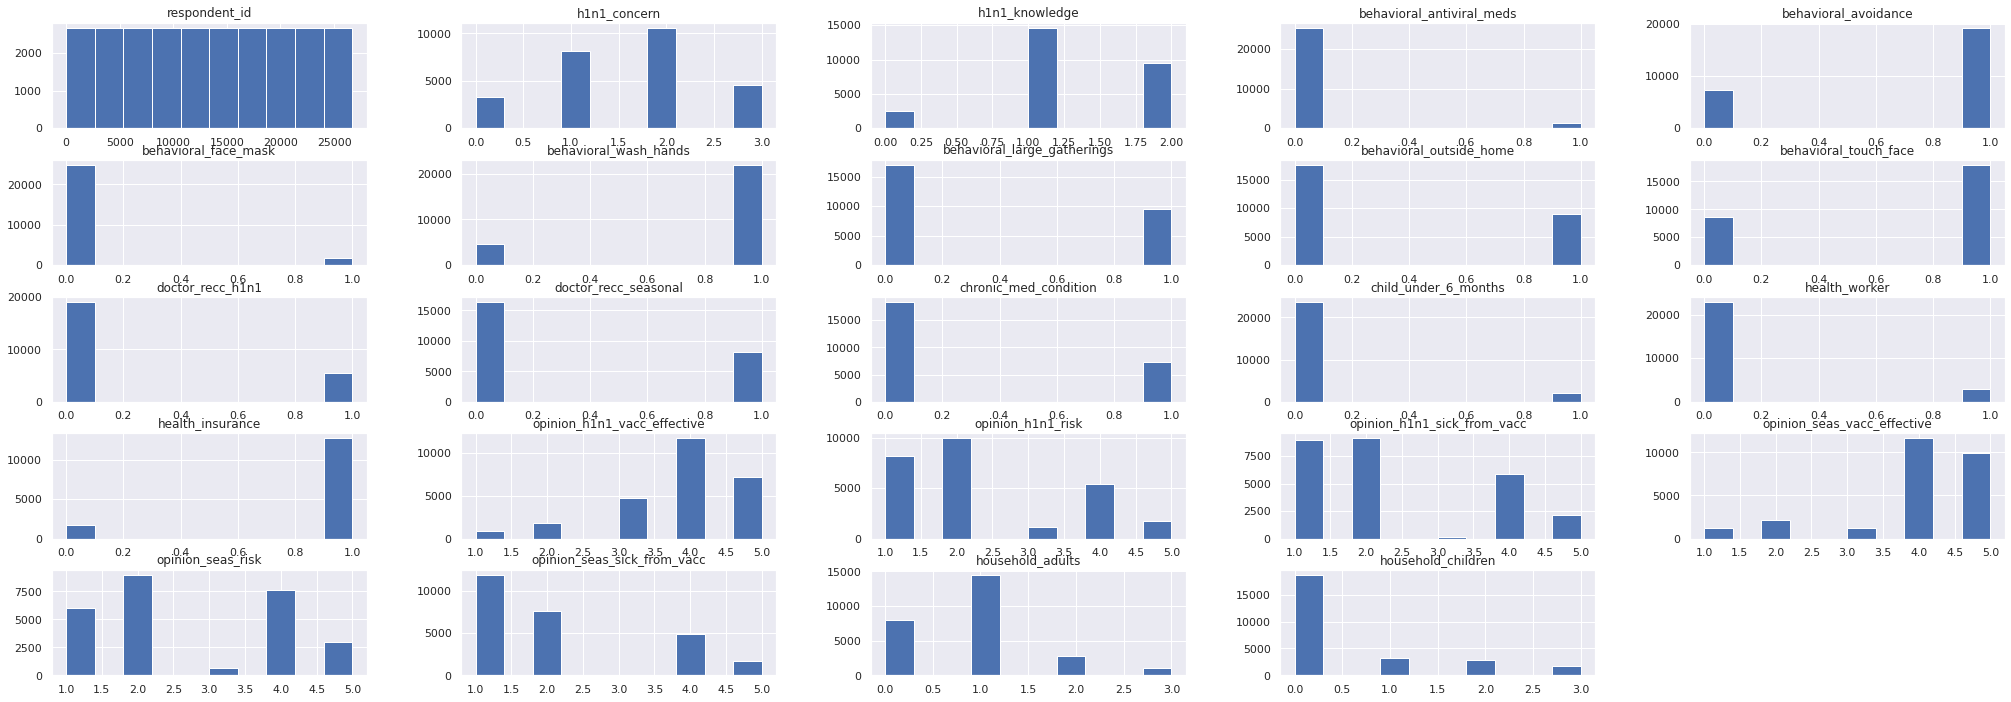

In [21]:
num_analysis(num_attributes)

### Categorical

In [22]:
cat_attributes.head()

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation,h1n1,seasonal
0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,NaN,NaN,0,0
1,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",pxcmvdjn,xgwztkwe,0,1
2,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",rucpziij,xtkaffoo,0,0
3,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",NaN,NaN,0,1
4,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",wxleyezf,emcorrxb,0,0


In [23]:
cat_attributes[['employment_status', 'employment_industry', 'employment_occupation']].sample(20)

,employment_status,employment_industry,employment_occupation
10688,Not in Labor Force,NaN,NaN
25012,Employed,mfikgejo,xtkaffoo
10147,Employed,saaquncn,vlluhbov
23999,Unemployed,NaN,NaN
6137,Not in Labor Force,NaN,NaN
8511,Employed,fcxhlnwr,cmhcxjea
25806,Not in Labor Force,NaN,NaN
21163,Not in Labor Force,NaN,NaN
18303,Employed,mfikgejo,xgwztkwe
15742,Not in Labor Force,NaN,NaN


In [548]:
cat_attributes[['employment_status', 'employment_status', 'employment_occupation']].apply(lambda x: x.unique())

employment_status          [Not in Labor Force, Employed, Unemployed, nan]
employment_status          [Not in Labor Force, Employed, Unemployed, nan]
employment_occupation    [nan, xgwztkwe, xtkaffoo, emcorrxb, vlluhbov, ...
dtype: object

In [549]:
# health_insurance               45.957989
# income_poverty                 16.561201
# employment_industry            49.912008
# employment_occupation          50.436215

In [550]:
cat_attributes.apply(lambda x: x.unique().shape).T

,0
age_group,5
education,5
race,4
sex,2
income_poverty,4
marital_status,3
rent_or_own,3
employment_status,4
hhs_geo_region,10
census_msa,3


In [551]:
(cat_attributes.isna().sum() / df1.shape[0])*100

age_group                 0.000000
education                 5.268282
race                      0.000000
sex                       0.000000
income_poverty           16.561201
marital_status            5.272026
rent_or_own               7.645936
employment_status         5.477965
hhs_geo_region            0.000000
census_msa                0.000000
employment_industry      49.912008
employment_occupation    50.436215
h1n1                      0.000000
seasonal                  0.000000
dtype: float64

<AxesSubplot:xlabel='sex', ylabel='count'>

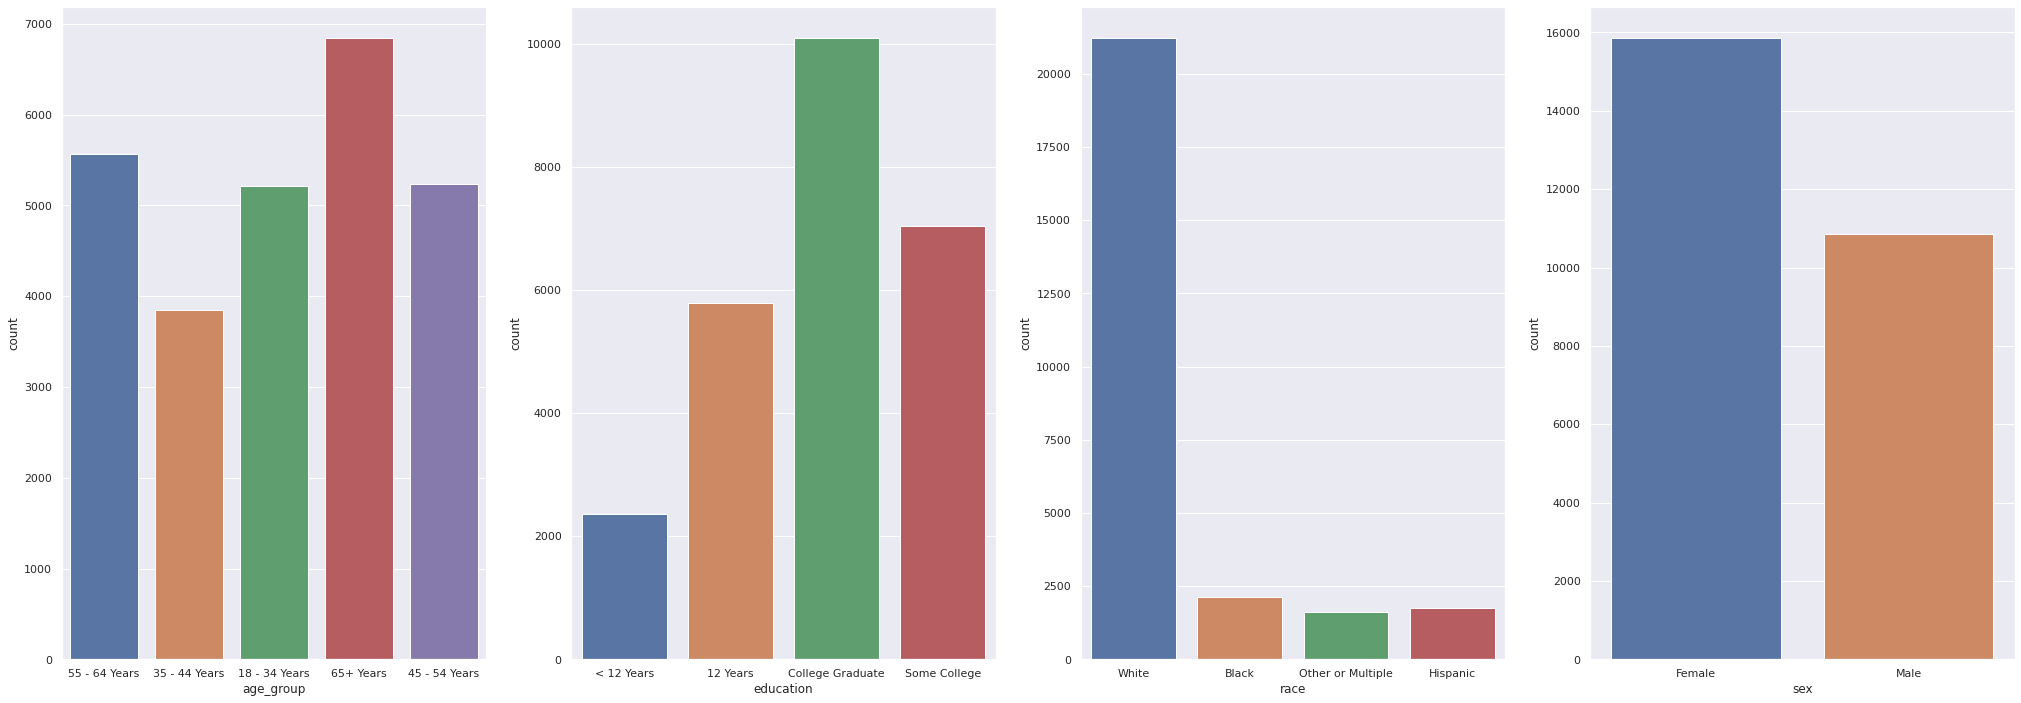

In [552]:
plt.subplot(1,4,1)
sns.countplot(x='age_group',data=cat_attributes)

plt.subplot(1,4,2)
sns.countplot(x='education',data=cat_attributes)

plt.subplot(1,4,3)
sns.countplot(x='race',data=cat_attributes)

plt.subplot(1,4,4)
sns.countplot(x='sex',data=cat_attributes)

<AxesSubplot:xlabel='rent_or_own', ylabel='count'>

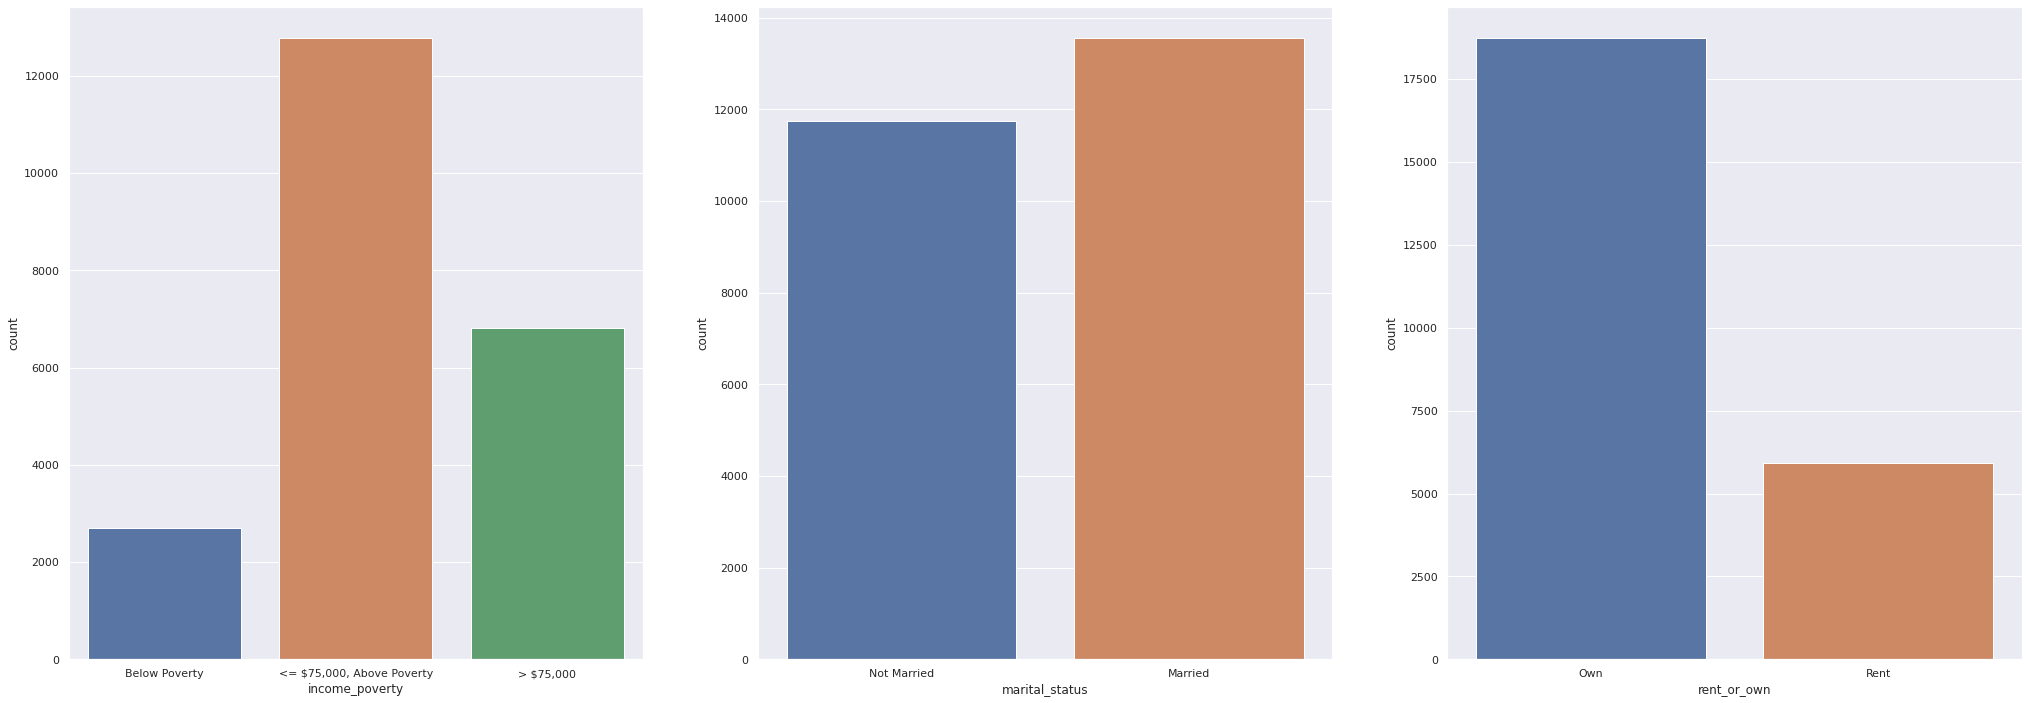

In [29]:
plt.subplot(1,3,1)
sns.countplot(x='income_poverty', data=cat_attributes)

plt.subplot(1,3,2)
sns.countplot(x='marital_status', data=cat_attributes)

plt.subplot(1,3,3)
sns.countplot(x='rent_or_own', data=cat_attributes)

<AxesSubplot:xlabel='census_msa', ylabel='count'>

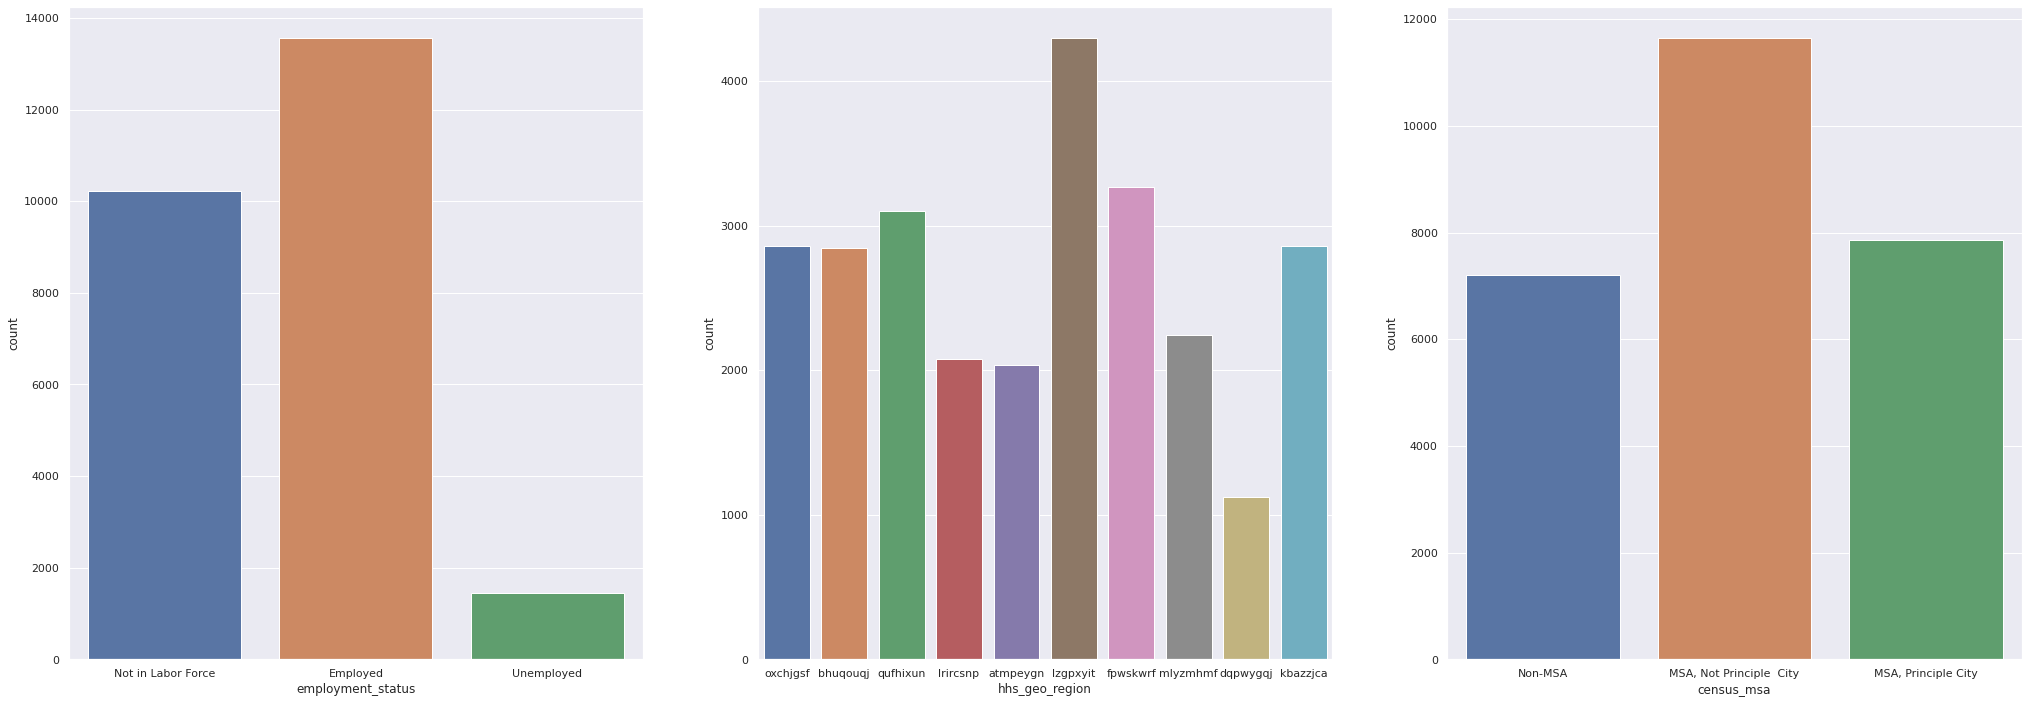

In [30]:
plt.subplot(1,3,1)
sns.countplot(x='employment_status', data=cat_attributes)

plt.subplot(1,3,2)
sns.countplot(x='hhs_geo_region', data=cat_attributes)

plt.subplot(1,3,3)
sns.countplot(x='census_msa', data=cat_attributes)

# 2.0. Feature Engineering

In [598]:
df2 = df1.copy()

### Response Variable

In [599]:
# df2['response'] = df2[['h1n1', 'seasonal']].apply(lambda x: 3 if (x['h1n1'] == 0 & x['seasonal'] == 0) else (4 if (x['h1n1'] == 1 & x['seasonal'] == 1) else 2 if (x['h1n1'] == 1 & x['seasonal'] == 0) else 1), axis=1, raw=False)

# apply and lambda function seem not to work correctly together when the number of conditional arguments is above 3.
# the solution I found for creating the multilabel response variable was to convert to object and bind both features as a string. '00', '01', '10', '11'.
# then I´ll map a function to attribute values from 1 to 4 to each class.

In [600]:
df2['response_aux'] = df2['h1n1'].str.cat(df2['seasonal'])
df2['response'] = df2['h1n1'].str.cat(df2['seasonal'])

# NV --- NO VACCINE
# HV --- VACCINE H1N1
# SV --- SEASONAL VACCINE
# BV --- BOTH VACCINES

dic = {'00': 'NV',
      '01': 'SV',
      '10': 'HV',
      '11': 'BV'}

In [601]:
df2 = df2.replace({'response': dic})
df2

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1,seasonal,response_aux,response
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0,00,NV
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1,01,SV
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0,00,NV
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1,01,SV
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0,00,NV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,1.0,1.0,5.0,2.0,2.0,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN,0,0,00,NV
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,2.0,2.0,5.0,1.0,1.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,0,0,00,NV
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,4.0,2.0,5.0,4.0,2.0,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,1,01,SV
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg,0,0,00,NV


In [602]:
df2['response'].value_counts()

NV    13295
SV     7738
BV     4697
HV      977
Name: response, dtype: int64

### General Behavior

In [558]:
df2.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation', 'h1n1', 'seasonal', 'response_aux',
       'response'],
      dtype='object')

In [559]:
df2[['behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face']]

,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.0,1.0,0.0,1.0,0.0,1.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,0.0,1.0,0.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...
26702,0.0,1.0,0.0,0.0,0.0,1.0,0.0
26703,0.0,1.0,0.0,1.0,0.0,0.0,0.0
26704,0.0,1.0,1.0,1.0,1.0,0.0,1.0
26705,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [560]:
df2['behaviour_general'] = df2['behavioral_antiviral_meds'] + df2['behavioral_avoidance'] + df2['behavioral_face_mask'] + df2['behavioral_wash_hands'] + df2['behavioral_large_gatherings'] + df2['behavioral_outside_home'] + df2['behavioral_touch_face']

<AxesSubplot:xlabel='behaviour_general', ylabel='Count'>

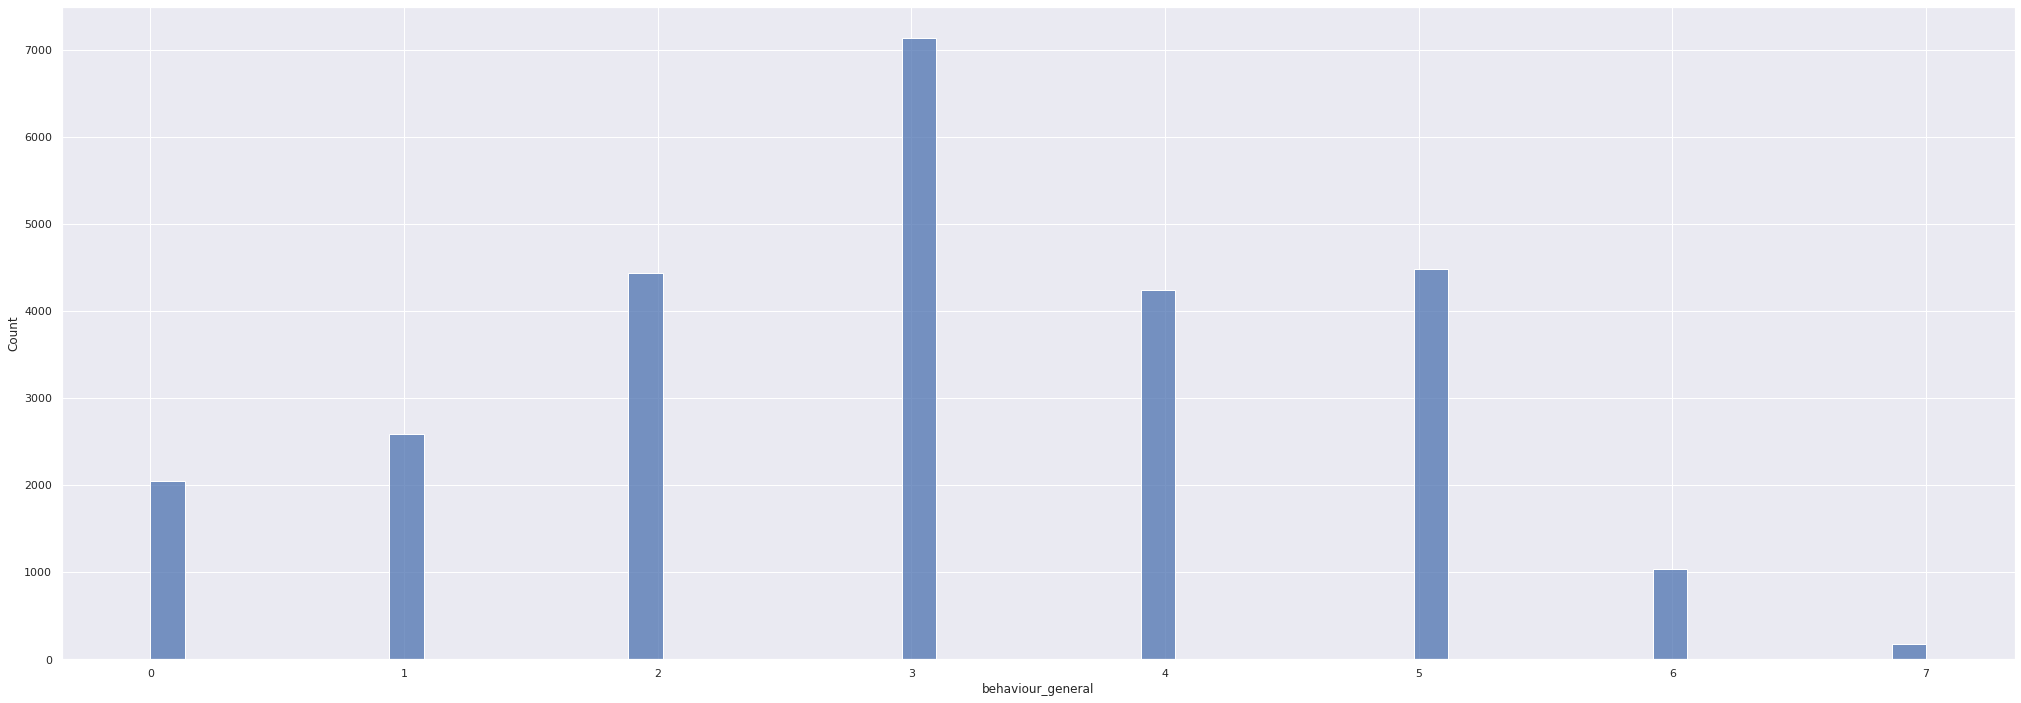

In [561]:
sns.histplot(data = df2['behaviour_general'])

### Employment Status, employment industry, employment ocupation

In [562]:
df2[['employment_status', 'employment_industry', 'employment_occupation']].sample(30)

,employment_status,employment_industry,employment_occupation
7469,Employed,wxleyezf,emcorrxb
26697,Not in Labor Force,NaN,NaN
13738,Employed,nduyfdeo,pvmttkik
20844,Employed,nduyfdeo,xtkaffoo
12889,Not in Labor Force,NaN,NaN
21744,Not in Labor Force,NaN,NaN
26002,Employed,pxcmvdjn,cmhcxjea
9085,Employed,ldnlellj,kldqjyjy
11598,Employed,atmlpfrs,vlluhbov
95,Unemployed,NaN,NaN


## Opinion

In [563]:
df2[['opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc']]

,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc
0,3.0,1.0,2.0,2.0,1.0,2.0
1,5.0,4.0,4.0,4.0,2.0,4.0
2,3.0,1.0,1.0,4.0,1.0,2.0
3,3.0,3.0,5.0,5.0,4.0,1.0
4,3.0,3.0,2.0,3.0,1.0,4.0
...,...,...,...,...,...,...
26702,3.0,1.0,1.0,5.0,2.0,2.0
26703,4.0,2.0,2.0,5.0,1.0,1.0
26704,4.0,4.0,2.0,5.0,4.0,2.0
26705,3.0,1.0,2.0,2.0,1.0,2.0


In [564]:
df2['opinion_general'] = df2['opinion_h1n1_vacc_effective'] + df2['opinion_h1n1_risk'] + df2['opinion_h1n1_sick_from_vacc'] + df2['opinion_seas_vacc_effective'] + df2['opinion_seas_risk'] + df2['opinion_seas_sick_from_vacc']

<AxesSubplot:xlabel='opinion_general', ylabel='Count'>

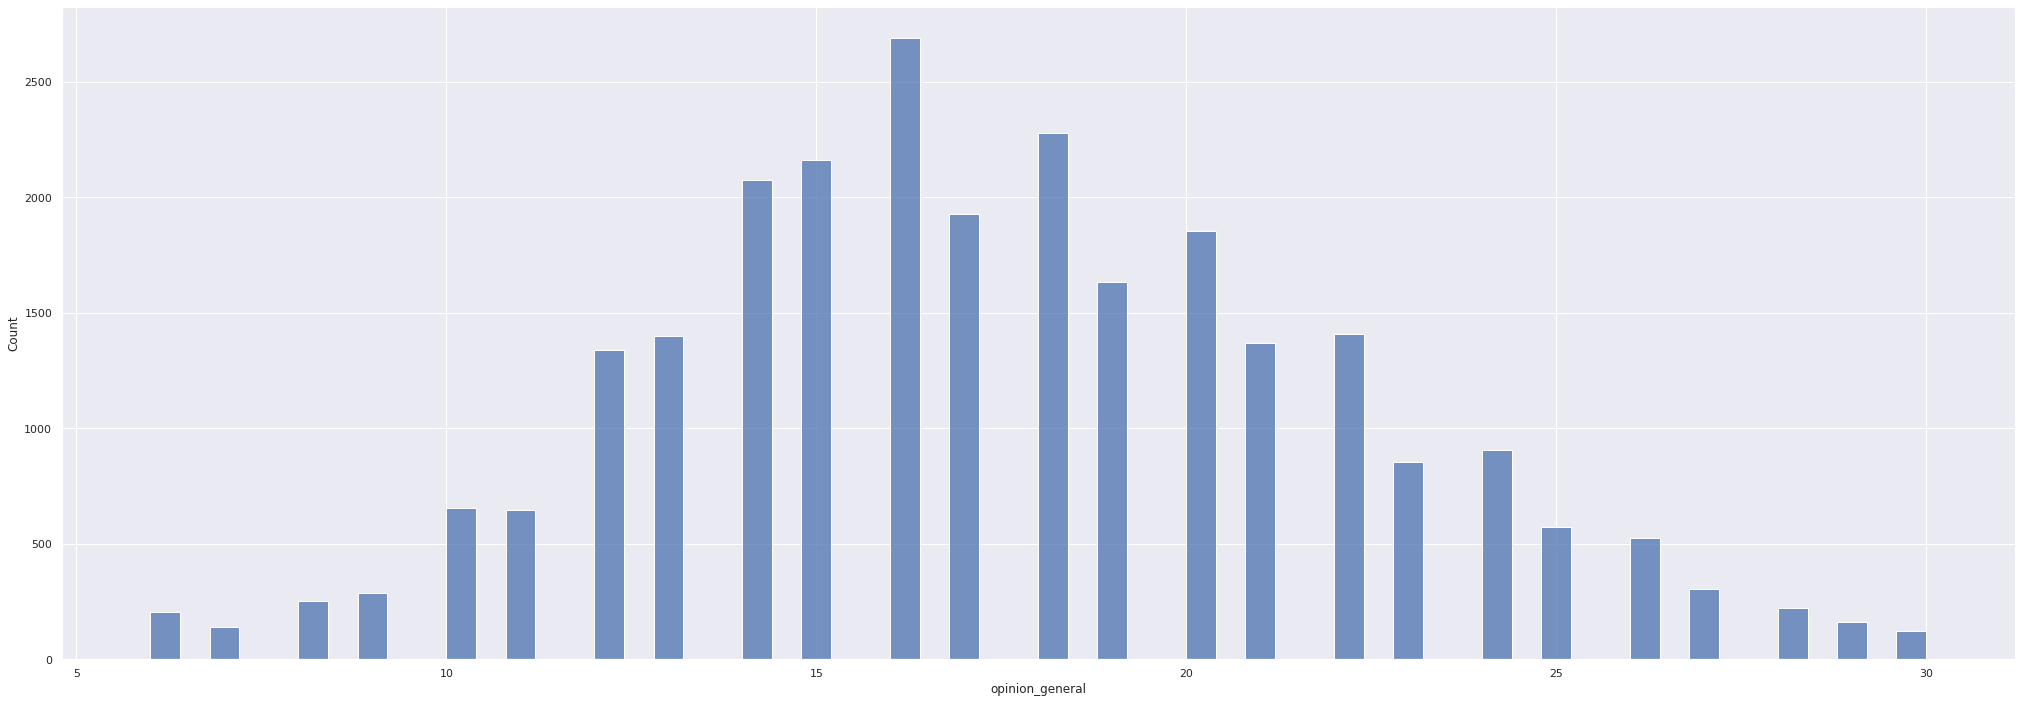

In [565]:
sns.histplot(data = df2['opinion_general'])

# 3.0. Filter

In [566]:
df3 = df2.copy()

# 4.0. Exploratory Data Analysis (EDA)

In [567]:
df4 = df3.copy()

In [568]:
df4.to_csv('../data/interim/df4.csv')

## 4.1. Univariate Analysis

## 4.2. Bivariate Analysis

## 4.3. Multivariate Analysis

## Hypothesis Brainstorm

## Hypothesis Validation

# 5.0. Data Preparation

In [569]:
df5 = df4.copy()

## Rescalling

In [570]:
ss = pp.StandardScaler()
mm = pp.MinMaxScaler()

In [571]:
df5['behaviour_general'] = ss.fit_transform(df5['behaviour_general'].values.reshape(-1,1))
df5['opinion_general'] = ss.fit_transform(df5['opinion_general'].values.reshape(-1,1))

## Encoding

In [572]:
df5 = pd.get_dummies(df5, columns = ['age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'census_msa'])

In [573]:
df5.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'hhs_geo_region',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation', 'h1n1', 'seasonal', 'response_aux', 'response',
       'behaviour_general', 'opinion_general', 'age_group_18 - 34 Years',
       'age_group_35 - 44 Years', 'age_group_45 - 54 Years',
       'age_group_55 - 64 Years', 'age_group_65+ Years', 'education_12 Years',
       'education_< 1

## Transformation

## Balancing Response Variable (oversampling)

In [456]:
# unbalanced ratio
df5['response'].value_counts()

NV    13295
SV     7738
BV     4697
HV      977
Name: response, dtype: int64

In [457]:
df5 = df5.drop(['respondent_id', 'health_insurance', 'hhs_geo_region', 'employment_industry', 'employment_occupation', 'h1n1', 'seasonal', 'response_aux'], axis=1)
df5 = df5.dropna()

In [458]:
# df to train SMOTE (Synthetic Minority Oversampling Technique)
df5_aux = df5.drop([ 'response'], axis=1).copy()

# balanced ratio

ratio ={'NV': 13295, 'SV': 13295, 'BV': 13295, 'HV':  13295}

# sampler
sampler = c.SMOTETomek(sampling_strategy=ratio, random_state=42, n_jobs=-1)

# apply sampler.fit_resamples for x and y, and concatenate them back together
X_smt, y_smt = sampler.fit_resample(df5_aux, df5['response'])

/home/lucas/.pyenv/versions/3.8.7/envs/flu_shot/lib/python3.8/site-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (13295) in class NV will be larger than the number of samples in the majority class (class #NV -> 11117)
  warnings.warn(
/home/lucas/.pyenv/versions/3.8.7/envs/flu_shot/lib/python3.8/site-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (13295) in class SV will be larger than the number of samples in the majority class (class #NV -> 11117)
  warnings.warn(
/home/lucas/.pyenv/versions/3.8.7/envs/flu_shot/lib/python3.8/site-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (13295) in class BV will be larger than the number of samples in the majority class (class #NV -> 11117)
  warnings.warn(
/home/lucas/.pyenv/versions/3.8.7/envs/flu_shot/lib/python3.8/site-packages/imblearn/utils/_validation.py:299: UserWarning: After ove

In [459]:
X_smt

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,behaviour_general,opinion_general,age_group_18 - 34 Years,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,education_12 Years,education_< 12 Years,education_College Graduate,education_Some College,race_Black,race_Hispanic,race_Other or Multiple,race_White,sex_Female,sex_Male,"income_poverty_<= $75,000, Above Poverty","income_poverty_> $75,000",income_poverty_Below Poverty,marital_status_Married,marital_status_Not Married,rent_or_own_Own,rent_or_own_Rent,employment_status_Employed,employment_status_Not in Labor Force,employment_status_Unemployed,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA
0,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.0,3.000000,1.0,2.000000,2.000000,1.000000,2.0,0.000000,0.000000,-0.651688,-1.394223,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,1,1,0,0,1,0,0,0,1
1,3.000000,2.000000,0.0,1.0,0.0,1.0,0.0,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.0,5.000000,4.0,4.000000,4.000000,2.000000,4.0,0.000000,0.000000,0.593810,1.207808,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,1,0,0,1,0,0
2,1.000000,1.000000,0.0,1.0,0.0,1.0,1.0,0.000000,0.000000,0.0,1.000000,1.000000,0.000000,0.0,3.000000,3.0,5.000000,5.000000,4.000000,1.0,0.000000,0.000000,-0.028939,0.774136,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,1,0,1,0,0,1,0
3,2.000000,1.000000,0.0,1.0,0.0,1.0,1.0,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.0,3.000000,3.0,2.000000,3.000000,1.000000,4.0,1.000000,0.000000,0.593810,-0.310043,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0
4,3.000000,1.000000,0.0,1.0,0.0,1.0,0.0,0.000000,1.000000,0.0,1.000000,0.000000,0.000000,0.0,5.000000,2.0,1.000000,5.000000,4.000000,4.0,2.000000,3.000000,-0.028939,0.774136,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,1,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52973,1.000000,1.675355,0.0,0.0,0.0,1.0,0.0,0.000000,0.675355,0.0,0.324645,1.000000,0.000000,1.0,3.324645,2.0,2.000000,4.675355,2.000000,1.0,1.000000,0.000000,-0.853860,-0.526879,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,1,0,1,0,1,0,0,1,0,0
52974,3.000000,1.548939,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,0.0,0.548939,0.000000,0.000000,1.0,1.451061,5.0,4.548939,4.548939,4.548939,5.0,1.097877,0.548939,2.462057,1.662703,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0
52975,1.996489,2.000000,0.0,1.0,0.0,1.0,1.0,0.996489,1.000000,0.0,0.000000,0.000000,0.000000,0.0,4.000000,1.0,1.996489,5.000000,2.000000,1.0,1.000000,0.000000,1.214372,-0.527640,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0
52976,1.000000,2.000000,0.0,1.0,0.0,1.0,1.0,0.959980,1.000000,0.0,1.000000,0.000000,0.000000,0.0,5.000000,2.0,1.040020,5.000000,4.000000,1.0,1.000000,0.959980,1.191637,0.132306,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,1,0,0


In [460]:
df5_balanced = pd.concat([X_smt, y_smt], axis=1)
df5_balanced

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,behaviour_general,opinion_general,age_group_18 - 34 Years,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,education_12 Years,education_< 12 Years,education_College Graduate,education_Some College,race_Black,race_Hispanic,race_Other or Multiple,race_White,sex_Female,sex_Male,"income_poverty_<= $75,000, Above Poverty","income_poverty_> $75,000",income_poverty_Below Poverty,marital_status_Married,marital_status_Not Married,rent_or_own_Own,rent_or_own_Rent,employment_status_Employed,employment_status_Not in Labor Force,employment_status_Unemployed,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA,response
0,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.0,3.000000,1.0,2.000000,2.000000,1.000000,2.0,0.000000,0.000000,-0.651688,-1.394223,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,1,1,0,0,1,0,0,0,1,NV
1,3.000000,2.000000,0.0,1.0,0.0,1.0,0.0,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.0,5.000000,4.0,4.000000,4.000000,2.000000,4.0,0.000000,0.000000,0.593810,1.207808,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,1,0,0,1,0,0,SV
2,1.000000,1.000000,0.0,1.0,0.0,1.0,1.0,0.000000,0.000000,0.0,1.000000,1.000000,0.000000,0.0,3.000000,3.0,5.000000,5.000000,4.000000,1.0,0.000000,0.000000,-0.028939,0.774136,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,1,0,1,0,0,1,0,SV
3,2.000000,1.000000,0.0,1.0,0.0,1.0,1.0,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.0,3.000000,3.0,2.000000,3.000000,1.000000,4.0,1.000000,0.000000,0.593810,-0.310043,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,NV
4,3.000000,1.000000,0.0,1.0,0.0,1.0,0.0,0.000000,1.000000,0.0,1.000000,0.000000,0.000000,0.0,5.000000,2.0,1.000000,5.000000,4.000000,4.0,2.000000,3.000000,-0.028939,0.774136,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,1,0,1,0,1,0,0,0,1,0,NV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52973,1.000000,1.675355,0.0,0.0,0.0,1.0,0.0,0.000000,0.675355,0.0,0.324645,1.000000,0.000000,1.0,3.324645,2.0,2.000000,4.675355,2.000000,1.0,1.000000,0.000000,-0.853860,-0.526879,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,1,0,1,0,1,0,0,1,0,0,SV
52974,3.000000,1.548939,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,0.0,0.548939,0.000000,0.000000,1.0,1.451061,5.0,4.548939,4.548939,4.548939,5.0,1.097877,0.548939,2.462057,1.662703,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0,SV
52975,1.996489,2.000000,0.0,1.0,0.0,1.0,1.0,0.996489,1.000000,0.0,0.000000,0.000000,0.000000,0.0,4.000000,1.0,1.996489,5.000000,2.000000,1.0,1.000000,0.000000,1.214372,-0.527640,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,SV
52976,1.000000,2.000000,0.0,1.0,0.0,1.0,1.0,0.959980,1.000000,0.0,1.000000,0.000000,0.000000,0.0,5.000000,2.0,1.040020,5.000000,4.000000,1.0,1.000000,0.959980,1.191637,0.132306,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,1,0,0,SV


# 6.0. Features Selection

In [608]:
# df6 = df5_balanced.copy()

In [464]:
# df6.shape

(52978, 53)

In [610]:
# df6.to_csv('../data/interim/df6.csv', index=False)
df6 = pd.read_csv('../data/interim/df6.csv')

In [611]:
df6

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,behaviour_general,opinion_general,age_group_18 - 34 Years,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,education_12 Years,education_< 12 Years,education_College Graduate,education_Some College,race_Black,race_Hispanic,race_Other or Multiple,race_White,sex_Female,sex_Male,"income_poverty_<= $75,000, Above Poverty","income_poverty_> $75,000",income_poverty_Below Poverty,marital_status_Married,marital_status_Not Married,rent_or_own_Own,rent_or_own_Rent,employment_status_Employed,employment_status_Not in Labor Force,employment_status_Unemployed,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA,response
0,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.0,3.000000,1.0,2.000000,2.000000,1.000000,2.0,0.000000,0.000000,-0.651688,-1.394223,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,1,1,0,0,1,0,0,0,1,NV
1,3.000000,2.000000,0.0,1.0,0.0,1.0,0.0,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.0,5.000000,4.0,4.000000,4.000000,2.000000,4.0,0.000000,0.000000,0.593810,1.207808,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,1,0,0,1,0,0,SV
2,1.000000,1.000000,0.0,1.0,0.0,1.0,1.0,0.000000,0.000000,0.0,1.000000,1.000000,0.000000,0.0,3.000000,3.0,5.000000,5.000000,4.000000,1.0,0.000000,0.000000,-0.028939,0.774136,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,1,0,1,0,0,1,0,SV
3,2.000000,1.000000,0.0,1.0,0.0,1.0,1.0,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.0,3.000000,3.0,2.000000,3.000000,1.000000,4.0,1.000000,0.000000,0.593810,-0.310043,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,NV
4,3.000000,1.000000,0.0,1.0,0.0,1.0,0.0,0.000000,1.000000,0.0,1.000000,0.000000,0.000000,0.0,5.000000,2.0,1.000000,5.000000,4.000000,4.0,2.000000,3.000000,-0.028939,0.774136,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,1,0,1,0,1,0,0,0,1,0,NV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52973,1.000000,1.675355,0.0,0.0,0.0,1.0,0.0,0.000000,0.675355,0.0,0.324645,1.000000,0.000000,1.0,3.324645,2.0,2.000000,4.675355,2.000000,1.0,1.000000,0.000000,-0.853860,-0.526879,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,1,0,1,0,1,0,0,1,0,0,SV
52974,3.000000,1.548939,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,0.0,0.548939,0.000000,0.000000,1.0,1.451061,5.0,4.548939,4.548939,4.548939,5.0,1.097877,0.548939,2.462057,1.662703,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0,SV
52975,1.996489,2.000000,0.0,1.0,0.0,1.0,1.0,0.996489,1.000000,0.0,0.000000,0.000000,0.000000,0.0,4.000000,1.0,1.996489,5.000000,2.000000,1.0,1.000000,0.000000,1.214372,-0.527640,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,SV
52976,1.000000,2.000000,0.0,1.0,0.0,1.0,1.0,0.959980,1.000000,0.0,1.000000,0.000000,0.000000,0.0,5.000000,2.0,1.040020,5.000000,4.000000,1.0,1.000000,0.959980,1.191637,0.132306,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,1,0,0,SV


In [613]:
# NV --- NO VACCINE
# HV --- VACCINE H1N1
# SV --- SEASONAL VACCINE
# BV --- BOTH VACCINES

dic = {'NV': '00',
      'SV': '01',
      'HV': '10',
      'BV': '11'}

df_aux = df6.replace({'response': dic})
df_aux

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,behaviour_general,opinion_general,age_group_18 - 34 Years,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,education_12 Years,education_< 12 Years,education_College Graduate,education_Some College,race_Black,race_Hispanic,race_Other or Multiple,race_White,sex_Female,sex_Male,"income_poverty_<= $75,000, Above Poverty","income_poverty_> $75,000",income_poverty_Below Poverty,marital_status_Married,marital_status_Not Married,rent_or_own_Own,rent_or_own_Rent,employment_status_Employed,employment_status_Not in Labor Force,employment_status_Unemployed,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA,response
0,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.0,3.000000,1.0,2.000000,2.000000,1.000000,2.0,0.000000,0.000000,-0.651688,-1.394223,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,1,1,0,0,1,0,0,0,1,00
1,3.000000,2.000000,0.0,1.0,0.0,1.0,0.0,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.0,5.000000,4.0,4.000000,4.000000,2.000000,4.0,0.000000,0.000000,0.593810,1.207808,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,1,0,0,1,0,0,01
2,1.000000,1.000000,0.0,1.0,0.0,1.0,1.0,0.000000,0.000000,0.0,1.000000,1.000000,0.000000,0.0,3.000000,3.0,5.000000,5.000000,4.000000,1.0,0.000000,0.000000,-0.028939,0.774136,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,1,0,1,0,0,1,0,01
3,2.000000,1.000000,0.0,1.0,0.0,1.0,1.0,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.0,3.000000,3.0,2.000000,3.000000,1.000000,4.0,1.000000,0.000000,0.593810,-0.310043,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,00
4,3.000000,1.000000,0.0,1.0,0.0,1.0,0.0,0.000000,1.000000,0.0,1.000000,0.000000,0.000000,0.0,5.000000,2.0,1.000000,5.000000,4.000000,4.0,2.000000,3.000000,-0.028939,0.774136,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,1,0,1,0,1,0,0,0,1,0,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52973,1.000000,1.675355,0.0,0.0,0.0,1.0,0.0,0.000000,0.675355,0.0,0.324645,1.000000,0.000000,1.0,3.324645,2.0,2.000000,4.675355,2.000000,1.0,1.000000,0.000000,-0.853860,-0.526879,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,1,0,1,0,1,0,0,1,0,0,01
52974,3.000000,1.548939,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,0.0,0.548939,0.000000,0.000000,1.0,1.451061,5.0,4.548939,4.548939,4.548939,5.0,1.097877,0.548939,2.462057,1.662703,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0,01
52975,1.996489,2.000000,0.0,1.0,0.0,1.0,1.0,0.996489,1.000000,0.0,0.000000,0.000000,0.000000,0.0,4.000000,1.0,1.996489,5.000000,2.000000,1.0,1.000000,0.000000,1.214372,-0.527640,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,01
52976,1.000000,2.000000,0.0,1.0,0.0,1.0,1.0,0.959980,1.000000,0.0,1.000000,0.000000,0.000000,0.0,5.000000,2.0,1.040020,5.000000,4.000000,1.0,1.000000,0.959980,1.191637,0.132306,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,1,0,0,01


In [619]:
df_aux['h1n1'] = df_aux['response'].apply(lambda x: 1 if (x=='10') | (x=='11') else 0)
df_aux['seasonal'] = df_aux['response'].apply(lambda x: 1 if (x=='01') | (x=='11') else 0)

In [620]:
df_aux.sample(30)

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,behaviour_general,opinion_general,age_group_18 - 34 Years,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,education_12 Years,education_< 12 Years,education_College Graduate,education_Some College,race_Black,race_Hispanic,race_Other or Multiple,race_White,sex_Female,sex_Male,"income_poverty_<= $75,000, Above Poverty","income_poverty_> $75,000",income_poverty_Below Poverty,marital_status_Married,marital_status_Not Married,rent_or_own_Own,rent_or_own_Rent,employment_status_Employed,employment_status_Not in Labor Force,employment_status_Unemployed,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA,response,h1n1,seasonal
45322,1.000000,1.000000,0.000000,0.969062,0.0,0.000000,0.030938,0.000000,0.000000,0.000000,0.969062,0.000000,0.000000,0.000000,3.000000,1.000000,2.000000,2.030938,1.969062,2.000000,1.000000,0.000000,-1.274437,-1.177387,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,00,0,0
41083,2.492456,1.000000,0.000000,1.000000,0.0,1.000000,1.000000,0.492456,1.000000,0.507544,0.507544,0.000000,0.000000,0.492456,3.507544,4.000000,5.000000,4.000000,2.000000,1.000000,1.507544,0.000000,0.900486,0.450518,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,1,0,1,0,0,0,0,1,10,1,0
15926,2.000000,2.000000,0.000000,1.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,4.000000,2.000000,5.000000,2.000000,1.000000,2.000000,1.000000,-0.651688,0.340465,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,1,0,1,0,1,0,0,0,1,0,11,1,1
39664,2.825444,1.000000,0.087278,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.087278,0.000000,0.000000,0.912722,0.000000,4.087278,4.912722,2.000000,5.000000,5.000000,4.912722,1.174556,3.000000,1.270911,1.839391,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,1,10,1,0
2350,2.000000,2.000000,0.000000,0.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.593810,-0.743715,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,1,1,0,1,0,0,0,0,1,00,0,0
24308,3.000000,1.000000,0.000000,1.000000,0.0,1.000000,0.000000,0.486372,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.513628,4.000000,1.000000,4.513628,4.000000,1.000000,1.486372,1.513628,0.273949,0.346375,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,11,1,1
34970,1.000000,2.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.090335,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,1.090335,4.909665,1.000000,1.000000,0.000000,0.000000,-1.897186,-0.743715,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,1,0,0,0,1,0,10,1,0
25908,1.322873,2.000000,0.000000,1.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.322873,4.322873,4.000000,2.000000,4.000000,2.000000,1.677127,1.000000,0.000000,-0.651688,0.123629,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,11,1,1
17234,2.000000,2.000000,0.000000,1.000000,0.0,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,5.000000,4.000000,1.000000,5.000000,5.000000,1.000000,0.000000,0.000000,0.593810,0.774136,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0,11,1,1
1295,0.000000,2.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,0.000000,1.000000,-1.897186,-1.177387,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,1,0,1,1,0,0,0,0,1,00,0,0


In [622]:
df6 = df_aux.drop('response', axis=1).copy()

## Train-test Split

In [623]:
x_train_n = df6.drop(['h1n1', 'seasonal'], axis=1)
y_train_n = df6['h1n1'].values

## Feature Importance

In [624]:
# feature importance
forest = en.ExtraTreesClassifier(n_estimators=250, random_state=42, n_jobs=-1)
forest.fit(x_train_n, y_train_n)

ExtraTreesClassifier(n_estimators=250, n_jobs=-1, random_state=42)

In [625]:
forest.feature_importances_

array([0.02497789, 0.02315606, 0.00670621, 0.01582089, 0.00808824,
       0.0113688 , 0.01657885, 0.01567659, 0.01697303, 0.13727747,
       0.0267539 , 0.01839938, 0.01217836, 0.02037641, 0.06352669,
       0.06711258, 0.02572376, 0.02343225, 0.02862244, 0.02406187,
       0.01862274, 0.01786838, 0.02122263, 0.03470211, 0.01043701,
       0.01022374, 0.01176622, 0.01132591, 0.01230541, 0.01299019,
       0.00703704, 0.01394225, 0.01353716, 0.00656977, 0.00464583,
       0.00397174, 0.01350688, 0.01662292, 0.01466805, 0.01592457,
       0.01196739, 0.00611593, 0.01319915, 0.01325004, 0.0130629 ,
       0.00971159, 0.01363408, 0.01319635, 0.00414263, 0.01602413,
       0.01429396, 0.01269968])

In [626]:
# plotting importance results
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]


In [627]:
# print the feature ranking
print('Feature ranking:')
df = pd.DataFrame()
for i, j in zip(x_train_n, forest.feature_importances_):
    aux = pd.DataFrame({'feature': i, 'importance': j}, index=[0])
    df= pd.concat([df, aux], axis=0)
    
df.sort_values('importance', ascending=False).reset_index()

Feature ranking:


,index,feature,importance
0,0,doctor_recc_h1n1,0.137277
1,0,opinion_h1n1_risk,0.067113
2,0,opinion_h1n1_vacc_effective,0.063527
3,0,opinion_general,0.034702
4,0,opinion_seas_risk,0.028622
5,0,doctor_recc_seasonal,0.026754
6,0,opinion_h1n1_sick_from_vacc,0.025724
7,0,h1n1_concern,0.024978
8,0,opinion_seas_sick_from_vacc,0.024062
9,0,opinion_seas_vacc_effective,0.023432


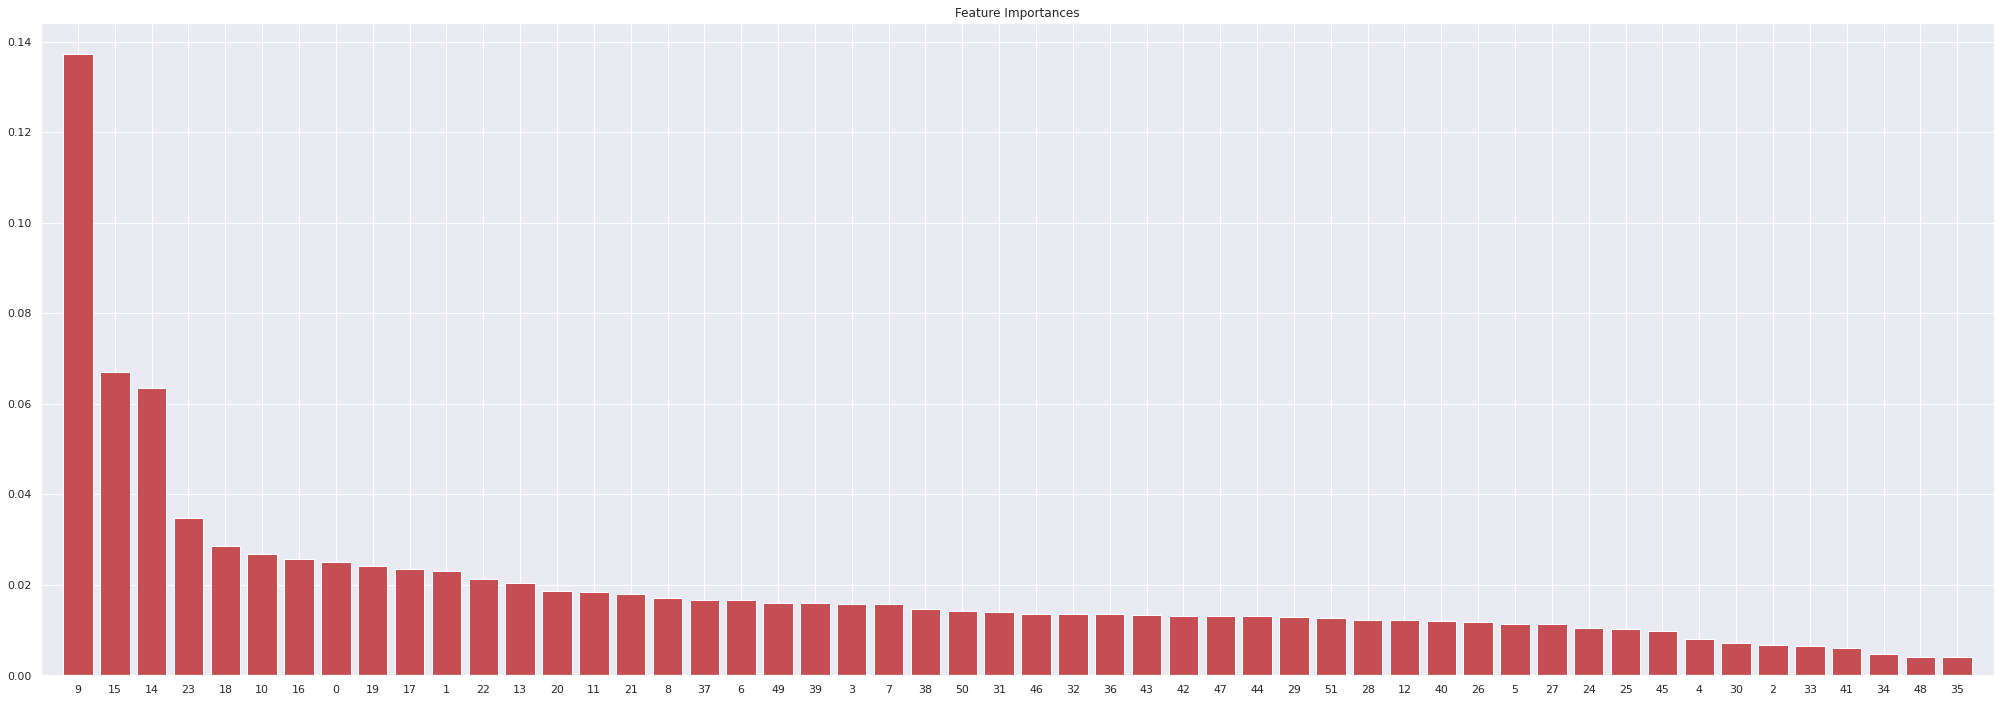

In [628]:
# plot the impurity-base feature importance of the forest
plt.figure()
plt.title('Feature Importances')
plt.bar(range(x_train_n.shape[1]), importances[indices], color='r', align='center')
plt.xticks(range(x_train_n.shape[1]), indices)
plt.xlim([-1, x_train_n.shape[1]])
plt.show()

In [629]:
# results for h1n1
cols_imp = df.sort_values('importance', ascending=False).reset_index().loc[:12,:]['feature'].values
cols_imp

array(['doctor_recc_h1n1', 'opinion_h1n1_risk',
       'opinion_h1n1_vacc_effective', 'opinion_general',
       'opinion_seas_risk', 'doctor_recc_seasonal',
       'opinion_h1n1_sick_from_vacc', 'h1n1_concern',
       'opinion_seas_sick_from_vacc', 'opinion_seas_vacc_effective',
       'h1n1_knowledge', 'behaviour_general', 'health_worker'],
      dtype=object)

In [382]:
# cols_importance = list(set(cols_h1n1) | set(cols_seasonal))
# cols_importance

## Boruta

In [475]:
# define model
et = en.ExtraTreesClassifier(n_jobs=-1)

# define Boruta
boruta = bt.BorutaPy(et, n_estimators='auto', verbose=2, random_state=42).fit(x_train_n.values, y_train_n)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	52
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	52
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	52
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	52
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	52
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	52
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	52
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	40
Tentative: 	2
Rejected: 	10
Iteration: 	9 / 100
Confirmed: 	40
Tentative: 	2
Rejected: 	10
Iteration: 	10 / 100
Confirmed: 	40
Tentative: 	2
Rejected: 	10
Iteration: 	11 / 100
Confirmed: 	40
Tentative: 	2
Rejected: 	10
Iteration: 	12 / 100
Confirmed: 	40
Tentative: 	2
Rejected: 	10
Iteration: 	13 / 100
Confirmed: 	40
Tentative: 	2
Rejected: 	10
Iteration: 	14 / 100
Confirmed: 	40
Tentative: 	2
Rejected: 	10
Iteration: 	15 / 100
Confirmed: 	40
Tentative: 	2
Rejected: 	10
Iteration: 	16 / 100
Confirmed: 	40
Tentative: 	2
Reject

In [476]:
boruta.ranking_

array([ 1,  1,  7,  1,  6,  2,  1,  1,  1,  1,  1,  1,  3,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  5,  1,  1,  1,  1, 10,  1,  1,  9,
       11, 13,  1,  1,  1,  1,  1,  8,  1,  1,  1,  4,  1,  1, 12,  1,  1,
        1])

In [477]:
cols_bor = boruta.support_.tolist()

In [478]:
cols_boruta = x_train_n.iloc[:, cols_bor].columns
cols_boruta

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_avoidance',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'health_worker', 'opinion_h1n1_vacc_effective',
       'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc',
       'opinion_seas_vacc_effective', 'opinion_seas_risk',
       'opinion_seas_sick_from_vacc', 'household_adults', 'household_children',
       'behaviour_general', 'opinion_general', 'age_group_18 - 34 Years',
       'age_group_45 - 54 Years', 'age_group_55 - 64 Years',
       'age_group_65+ Years', 'education_12 Years',
       'education_College Graduate', 'education_Some College', 'race_White',
       'sex_Female', 'sex_Male', 'income_poverty_<= $75,000, Above Poverty',
       'income_poverty_> $75,000', 'marital_status_Married',
       'marital_status_Not Married', 'rent_or_own_Own',
       'employment_status_Employed', 'employment_status_No

## Manual Selection

In [479]:
cols_boruta.tolist()

['h1n1_concern',
 'h1n1_knowledge',
 'behavioral_avoidance',
 'behavioral_large_gatherings',
 'behavioral_outside_home',
 'behavioral_touch_face',
 'doctor_recc_h1n1',
 'doctor_recc_seasonal',
 'chronic_med_condition',
 'health_worker',
 'opinion_h1n1_vacc_effective',
 'opinion_h1n1_risk',
 'opinion_h1n1_sick_from_vacc',
 'opinion_seas_vacc_effective',
 'opinion_seas_risk',
 'opinion_seas_sick_from_vacc',
 'household_adults',
 'household_children',
 'behaviour_general',
 'opinion_general',
 'age_group_18 - 34 Years',
 'age_group_45 - 54 Years',
 'age_group_55 - 64 Years',
 'age_group_65+ Years',
 'education_12 Years',
 'education_College Graduate',
 'education_Some College',
 'race_White',
 'sex_Female',
 'sex_Male',
 'income_poverty_<= $75,000, Above Poverty',
 'income_poverty_> $75,000',
 'marital_status_Married',
 'marital_status_Not Married',
 'rent_or_own_Own',
 'employment_status_Employed',
 'employment_status_Not in Labor Force',
 'census_msa_MSA, Not Principle  City',
 'census_

In [480]:
cols_imp.tolist()

['doctor_recc_h1n1',
 'doctor_recc_seasonal',
 'opinion_seas_risk',
 'opinion_h1n1_risk',
 'opinion_seas_vacc_effective',
 'opinion_h1n1_vacc_effective',
 'opinion_general',
 'opinion_h1n1_sick_from_vacc',
 'opinion_seas_sick_from_vacc',
 'h1n1_concern',
 'h1n1_knowledge',
 'behaviour_general',
 'household_children',
 'household_adults']

# 7. Modeling

In [1016]:
df7 = df6[['h1n1_concern',
 'h1n1_knowledge',
 'behavioral_avoidance',
 'behavioral_large_gatherings',
 'behavioral_outside_home',
 'behavioral_touch_face',
 'doctor_recc_h1n1',
 'doctor_recc_seasonal',
 'chronic_med_condition',
 'health_worker',
 'opinion_h1n1_vacc_effective',
 'opinion_h1n1_risk',
 'opinion_h1n1_sick_from_vacc',
 'opinion_seas_vacc_effective',
 'opinion_seas_risk',
 'opinion_seas_sick_from_vacc',
 'household_adults',
 'household_children',
 'behaviour_general',
 'opinion_general',
 'age_group_18 - 34 Years',
 'age_group_45 - 54 Years',
 'age_group_55 - 64 Years',
 'age_group_65+ Years',
 'education_12 Years',
 'education_College Graduate',
 'education_Some College',
 'race_White',
 'sex_Female',
 'sex_Male',
 'income_poverty_<= $75,000, Above Poverty',
 'income_poverty_> $75,000',
 'marital_status_Married',
 'marital_status_Not Married',
 'rent_or_own_Own',
 'employment_status_Employed',
 'employment_status_Not in Labor Force',
 'census_msa_MSA, Not Principle  City',
 'census_msa_MSA, Principle City',
 'census_msa_Non-MSA', 'h1n1', 'seasonal']].copy()

### Cross Validation

In [894]:
df7.columns = ['h1n1_concern',
 'h1n1_knowledge',
 'behavioral_avoidance',
 'behavioral_large_gatherings',
 'behavioral_outside_home',
 'behavioral_touch_face',
 'doctor_recc_h1n1',
 'doctor_recc_seasonal',
 'chronic_med_condition',
 'health_worker',
 'opinion_h1n1_vacc_effective',
 'opinion_h1n1_risk',
 'opinion_h1n1_sick_from_vacc',
 'opinion_seas_vacc_effective',
 'opinion_seas_risk',
 'opinion_seas_sick_from_vacc',
 'household_adults',
 'household_children',
 'behaviour_general',
 'opinion_general',
 'age_group_18 - 34 Years',
 'age_group_45 - 54 Years',
 'age_group_55 - 64 Years',
 'age_group_65+ Years',
 'education_12 Years',
 'education_College Graduate',
 'education_Some College',
 'race_White',
 'sex_Female',
 'sex_Male',
 'income_poverty_= $75,000, Above Poverty',
 'income_poverty_ $75,000',
 'marital_status_Married',
 'marital_status_Not Married',
 'rent_or_own_Own',
 'employment_status_Employed',
 'employment_status_Not in Labor Force',
 'census_msa_MSA, Not Principle  City',
 'census_msa_MSA, Principle City',
 'census_msa_Non-MSA',
 'h1n1', 'seasonal']

## 7.1. For 'h1n1' Target Variable

In [677]:
X = df7.drop(['h1n1', 'seasonal'], axis=1)
y = df7['h1n1'].values

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## XGBoost

* With cols_boruta ROC AUC score is 0.9436463473678455

In [501]:
# model
xgb = XGBClassifier(eval_metric='mlogloss')

# train
xgb.fit(X_train, y_train)

# predict
y_hat = xgb.predict(X_test)

# performance
print(m.confusion_matrix(y_test, y_hat))
print(m.classification_report(y_test, y_hat))
print(m.roc_auc_score(y_test,xgb.predict_proba(X_test), multi_class='ovr'))

[[2073  133  175  295]
 [  40 2465   90   25]
 [ 180  109 2084  308]
 [ 349   81  387 1802]]
              precision    recall  f1-score   support

          BV       0.78      0.77      0.78      2676
          HV       0.88      0.94      0.91      2620
          NV       0.76      0.78      0.77      2681
          SV       0.74      0.69      0.71      2619

    accuracy                           0.80     10596
   macro avg       0.79      0.80      0.79     10596
weighted avg       0.79      0.80      0.79     10596

0.9436463473678455


In [919]:
cross_validation(df7.drop(['h1n1', 'seasonal'], axis=1).values, df7['h1n1'].values, XGBClassifier(eval_metric='mlogloss'), 'XGBoost Classifier', verbose=True)

KFold Number: 1


/home/lucas/.pyenv/versions/3.8.7/envs/flu_shot/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


KFold Number: 2


/home/lucas/.pyenv/versions/3.8.7/envs/flu_shot/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


KFold Number: 3


/home/lucas/.pyenv/versions/3.8.7/envs/flu_shot/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


KFold Number: 4


/home/lucas/.pyenv/versions/3.8.7/envs/flu_shot/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


KFold Number: 5


/home/lucas/.pyenv/versions/3.8.7/envs/flu_shot/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


KFold Number: 6


/home/lucas/.pyenv/versions/3.8.7/envs/flu_shot/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


KFold Number: 7


/home/lucas/.pyenv/versions/3.8.7/envs/flu_shot/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


KFold Number: 8


/home/lucas/.pyenv/versions/3.8.7/envs/flu_shot/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


KFold Number: 9


/home/lucas/.pyenv/versions/3.8.7/envs/flu_shot/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


KFold Number: 10


/home/lucas/.pyenv/versions/3.8.7/envs/flu_shot/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


,Model Name,ROC AUC Score
0,XGBoost Classifier,0.9492+/-0.0426


## CatBoost

* With cols_boruta ROC AUC score is 0.9469340966526655

In [503]:
# model
cat = CatBoostClassifier()

# train
cat.fit(X_train, y_train)

# predict
y_hat = cat.predict(X_test)

# performance
print(m.confusion_matrix(y_test, y_hat))
print(m.classification_report(y_test, y_hat))
print(m.roc_auc_score(y_test,cat.predict_proba(X_test), multi_class='ovr'))

Learning rate set to 0.095788
0:	learn: 1.3160378	total: 92.2ms	remaining: 1m 32s
1:	learn: 1.2605167	total: 150ms	remaining: 1m 14s
2:	learn: 1.2172237	total: 195ms	remaining: 1m 4s
3:	learn: 1.1805408	total: 240ms	remaining: 59.8s
4:	learn: 1.1507392	total: 280ms	remaining: 55.8s
5:	learn: 1.1249093	total: 326ms	remaining: 54s
6:	learn: 1.1025368	total: 375ms	remaining: 53.1s
7:	learn: 1.0820374	total: 421ms	remaining: 52.2s
8:	learn: 1.0647337	total: 459ms	remaining: 50.6s
9:	learn: 1.0498139	total: 500ms	remaining: 49.5s
10:	learn: 1.0370963	total: 540ms	remaining: 48.5s
11:	learn: 1.0254391	total: 596ms	remaining: 49s
12:	learn: 1.0142066	total: 676ms	remaining: 51.3s
13:	learn: 1.0039861	total: 734ms	remaining: 51.7s
14:	learn: 0.9943196	total: 774ms	remaining: 50.8s
15:	learn: 0.9851447	total: 828ms	remaining: 50.9s
16:	learn: 0.9773551	total: 893ms	remaining: 51.6s
17:	learn: 0.9699063	total: 964ms	remaining: 52.6s
18:	learn: 0.9625496	total: 1.01s	remaining: 52s
19:	learn: 0.9

164:	learn: 0.6813362	total: 9.67s	remaining: 48.9s
165:	learn: 0.6804835	total: 9.71s	remaining: 48.8s
166:	learn: 0.6794834	total: 9.75s	remaining: 48.6s
167:	learn: 0.6785273	total: 9.79s	remaining: 48.5s
168:	learn: 0.6776884	total: 9.83s	remaining: 48.3s
169:	learn: 0.6771712	total: 9.86s	remaining: 48.1s
170:	learn: 0.6765218	total: 9.91s	remaining: 48.1s
171:	learn: 0.6758704	total: 9.96s	remaining: 47.9s
172:	learn: 0.6751646	total: 10s	remaining: 47.9s
173:	learn: 0.6742557	total: 10.1s	remaining: 47.9s
174:	learn: 0.6732268	total: 10.1s	remaining: 47.8s
175:	learn: 0.6725592	total: 10.2s	remaining: 47.7s
176:	learn: 0.6718322	total: 10.3s	remaining: 47.7s
177:	learn: 0.6713965	total: 10.4s	remaining: 47.8s
178:	learn: 0.6706609	total: 10.4s	remaining: 47.8s
179:	learn: 0.6700628	total: 10.5s	remaining: 47.7s
180:	learn: 0.6691241	total: 10.5s	remaining: 47.6s
181:	learn: 0.6686727	total: 10.6s	remaining: 47.5s
182:	learn: 0.6680253	total: 10.7s	remaining: 47.6s
183:	learn: 0.

327:	learn: 0.5816281	total: 18.8s	remaining: 38.5s
328:	learn: 0.5810991	total: 18.9s	remaining: 38.5s
329:	learn: 0.5808874	total: 18.9s	remaining: 38.4s
330:	learn: 0.5805582	total: 18.9s	remaining: 38.3s
331:	learn: 0.5801295	total: 19s	remaining: 38.2s
332:	learn: 0.5794923	total: 19.1s	remaining: 38.2s
333:	learn: 0.5790616	total: 19.1s	remaining: 38.2s
334:	learn: 0.5787740	total: 19.2s	remaining: 38.1s
335:	learn: 0.5780534	total: 19.3s	remaining: 38.1s
336:	learn: 0.5776527	total: 19.3s	remaining: 38.1s
337:	learn: 0.5772141	total: 19.4s	remaining: 38.1s
338:	learn: 0.5767202	total: 19.5s	remaining: 38s
339:	learn: 0.5762543	total: 19.6s	remaining: 38.1s
340:	learn: 0.5759919	total: 19.7s	remaining: 38.1s
341:	learn: 0.5756070	total: 19.8s	remaining: 38s
342:	learn: 0.5749927	total: 19.8s	remaining: 38s
343:	learn: 0.5743520	total: 19.9s	remaining: 37.9s
344:	learn: 0.5739187	total: 19.9s	remaining: 37.8s
345:	learn: 0.5733150	total: 20s	remaining: 37.8s
346:	learn: 0.5729429	

489:	learn: 0.5176536	total: 28.4s	remaining: 29.6s
490:	learn: 0.5173149	total: 28.5s	remaining: 29.5s
491:	learn: 0.5168215	total: 28.5s	remaining: 29.5s
492:	learn: 0.5165580	total: 28.6s	remaining: 29.4s
493:	learn: 0.5161662	total: 28.6s	remaining: 29.3s
494:	learn: 0.5157533	total: 28.7s	remaining: 29.2s
495:	learn: 0.5155680	total: 28.7s	remaining: 29.2s
496:	learn: 0.5152011	total: 28.7s	remaining: 29.1s
497:	learn: 0.5146819	total: 28.8s	remaining: 29s
498:	learn: 0.5143741	total: 28.8s	remaining: 28.9s
499:	learn: 0.5141143	total: 28.9s	remaining: 28.9s
500:	learn: 0.5135784	total: 28.9s	remaining: 28.8s
501:	learn: 0.5133402	total: 29s	remaining: 28.7s
502:	learn: 0.5130491	total: 29s	remaining: 28.7s
503:	learn: 0.5127433	total: 29.1s	remaining: 28.6s
504:	learn: 0.5125899	total: 29.1s	remaining: 28.6s
505:	learn: 0.5124758	total: 29.2s	remaining: 28.5s
506:	learn: 0.5120578	total: 29.3s	remaining: 28.4s
507:	learn: 0.5117588	total: 29.3s	remaining: 28.4s
508:	learn: 0.5115

651:	learn: 0.4680054	total: 37.2s	remaining: 19.8s
652:	learn: 0.4677659	total: 37.3s	remaining: 19.8s
653:	learn: 0.4676028	total: 37.3s	remaining: 19.7s
654:	learn: 0.4673604	total: 37.3s	remaining: 19.7s
655:	learn: 0.4670646	total: 37.4s	remaining: 19.6s
656:	learn: 0.4667365	total: 37.4s	remaining: 19.5s
657:	learn: 0.4665432	total: 37.5s	remaining: 19.5s
658:	learn: 0.4662274	total: 37.5s	remaining: 19.4s
659:	learn: 0.4659556	total: 37.6s	remaining: 19.3s
660:	learn: 0.4657175	total: 37.6s	remaining: 19.3s
661:	learn: 0.4653417	total: 37.7s	remaining: 19.2s
662:	learn: 0.4651348	total: 37.7s	remaining: 19.2s
663:	learn: 0.4647800	total: 37.8s	remaining: 19.1s
664:	learn: 0.4643012	total: 37.9s	remaining: 19.1s
665:	learn: 0.4639835	total: 37.9s	remaining: 19s
666:	learn: 0.4636849	total: 38s	remaining: 19s
667:	learn: 0.4634561	total: 38s	remaining: 18.9s
668:	learn: 0.4632882	total: 38.1s	remaining: 18.8s
669:	learn: 0.4630012	total: 38.1s	remaining: 18.8s
670:	learn: 0.462833

811:	learn: 0.4277848	total: 46.6s	remaining: 10.8s
812:	learn: 0.4275464	total: 46.6s	remaining: 10.7s
813:	learn: 0.4273750	total: 46.7s	remaining: 10.7s
814:	learn: 0.4271035	total: 46.7s	remaining: 10.6s
815:	learn: 0.4268780	total: 46.8s	remaining: 10.6s
816:	learn: 0.4265622	total: 46.9s	remaining: 10.5s
817:	learn: 0.4264087	total: 46.9s	remaining: 10.4s
818:	learn: 0.4261740	total: 46.9s	remaining: 10.4s
819:	learn: 0.4258148	total: 47s	remaining: 10.3s
820:	learn: 0.4256887	total: 47.1s	remaining: 10.3s
821:	learn: 0.4254511	total: 47.2s	remaining: 10.2s
822:	learn: 0.4251644	total: 47.2s	remaining: 10.2s
823:	learn: 0.4248733	total: 47.3s	remaining: 10.1s
824:	learn: 0.4246882	total: 47.3s	remaining: 10s
825:	learn: 0.4245320	total: 47.4s	remaining: 9.98s
826:	learn: 0.4243828	total: 47.4s	remaining: 9.93s
827:	learn: 0.4241361	total: 47.5s	remaining: 9.88s
828:	learn: 0.4239799	total: 47.6s	remaining: 9.82s
829:	learn: 0.4237427	total: 47.7s	remaining: 9.77s
830:	learn: 0.42

970:	learn: 0.3933946	total: 55s	remaining: 1.64s
971:	learn: 0.3931454	total: 55.1s	remaining: 1.58s
972:	learn: 0.3930025	total: 55.1s	remaining: 1.53s
973:	learn: 0.3928360	total: 55.2s	remaining: 1.47s
974:	learn: 0.3926694	total: 55.3s	remaining: 1.42s
975:	learn: 0.3925407	total: 55.3s	remaining: 1.36s
976:	learn: 0.3923777	total: 55.4s	remaining: 1.3s
977:	learn: 0.3922557	total: 55.4s	remaining: 1.25s
978:	learn: 0.3920150	total: 55.4s	remaining: 1.19s
979:	learn: 0.3918578	total: 55.5s	remaining: 1.13s
980:	learn: 0.3916231	total: 55.5s	remaining: 1.07s
981:	learn: 0.3914548	total: 55.6s	remaining: 1.02s
982:	learn: 0.3912382	total: 55.6s	remaining: 962ms
983:	learn: 0.3910133	total: 55.7s	remaining: 905ms
984:	learn: 0.3908287	total: 55.7s	remaining: 848ms
985:	learn: 0.3905540	total: 55.8s	remaining: 792ms
986:	learn: 0.3903176	total: 55.8s	remaining: 735ms
987:	learn: 0.3899736	total: 55.8s	remaining: 678ms
988:	learn: 0.3897127	total: 55.9s	remaining: 622ms
989:	learn: 0.3

In [918]:
cross_validation(df7.drop(['h1n1', 'seasonal'], axis=1).values, df7['h1n1'].values, CatBoostClassifier(), 'CatBoost Classifier', verbose=True)

KFold Number: 1
Learning rate set to 0.053652
0:	learn: 0.6656034	total: 136ms	remaining: 2m 16s
1:	learn: 0.6417392	total: 162ms	remaining: 1m 20s
2:	learn: 0.6215441	total: 183ms	remaining: 1m
3:	learn: 0.6032278	total: 210ms	remaining: 52.3s
4:	learn: 0.5866135	total: 250ms	remaining: 49.7s
5:	learn: 0.5730562	total: 283ms	remaining: 46.9s
6:	learn: 0.5599245	total: 317ms	remaining: 45s
7:	learn: 0.5480586	total: 361ms	remaining: 44.7s
8:	learn: 0.5378302	total: 387ms	remaining: 42.6s
9:	learn: 0.5286329	total: 405ms	remaining: 40.1s
10:	learn: 0.5205569	total: 425ms	remaining: 38.2s
11:	learn: 0.5132747	total: 485ms	remaining: 39.9s
12:	learn: 0.5069416	total: 515ms	remaining: 39.1s
13:	learn: 0.5006043	total: 547ms	remaining: 38.6s
14:	learn: 0.4949507	total: 608ms	remaining: 39.9s
15:	learn: 0.4896475	total: 641ms	remaining: 39.4s
16:	learn: 0.4852336	total: 660ms	remaining: 38.1s
17:	learn: 0.4803928	total: 678ms	remaining: 37s
18:	learn: 0.4762924	total: 697ms	remaining: 36s
19

165:	learn: 0.3428383	total: 4.6s	remaining: 23.1s
166:	learn: 0.3425668	total: 4.63s	remaining: 23.1s
167:	learn: 0.3421595	total: 4.65s	remaining: 23s
168:	learn: 0.3419393	total: 4.67s	remaining: 22.9s
169:	learn: 0.3415547	total: 4.68s	remaining: 22.9s
170:	learn: 0.3412875	total: 4.7s	remaining: 22.8s
171:	learn: 0.3410287	total: 4.72s	remaining: 22.7s
172:	learn: 0.3406541	total: 4.75s	remaining: 22.7s
173:	learn: 0.3403606	total: 4.79s	remaining: 22.7s
174:	learn: 0.3401017	total: 4.83s	remaining: 22.8s
175:	learn: 0.3397986	total: 4.86s	remaining: 22.8s
176:	learn: 0.3394095	total: 4.88s	remaining: 22.7s
177:	learn: 0.3391137	total: 4.9s	remaining: 22.6s
178:	learn: 0.3387853	total: 4.92s	remaining: 22.5s
179:	learn: 0.3384898	total: 4.93s	remaining: 22.5s
180:	learn: 0.3382041	total: 4.95s	remaining: 22.4s
181:	learn: 0.3379331	total: 4.97s	remaining: 22.4s
182:	learn: 0.3377278	total: 5s	remaining: 22.3s
183:	learn: 0.3374054	total: 5.02s	remaining: 22.3s
184:	learn: 0.337204

328:	learn: 0.3006400	total: 8.66s	remaining: 17.7s
329:	learn: 0.3003870	total: 8.71s	remaining: 17.7s
330:	learn: 0.3001758	total: 8.73s	remaining: 17.7s
331:	learn: 0.2999993	total: 8.76s	remaining: 17.6s
332:	learn: 0.2997931	total: 8.79s	remaining: 17.6s
333:	learn: 0.2995361	total: 8.81s	remaining: 17.6s
334:	learn: 0.2993062	total: 8.83s	remaining: 17.5s
335:	learn: 0.2991045	total: 8.85s	remaining: 17.5s
336:	learn: 0.2989299	total: 8.87s	remaining: 17.5s
337:	learn: 0.2987430	total: 8.95s	remaining: 17.5s
338:	learn: 0.2985651	total: 9.02s	remaining: 17.6s
339:	learn: 0.2983588	total: 9.06s	remaining: 17.6s
340:	learn: 0.2981054	total: 9.1s	remaining: 17.6s
341:	learn: 0.2979552	total: 9.13s	remaining: 17.6s
342:	learn: 0.2977247	total: 9.15s	remaining: 17.5s
343:	learn: 0.2975642	total: 9.17s	remaining: 17.5s
344:	learn: 0.2973550	total: 9.2s	remaining: 17.5s
345:	learn: 0.2971480	total: 9.21s	remaining: 17.4s
346:	learn: 0.2969744	total: 9.23s	remaining: 17.4s
347:	learn: 0.

489:	learn: 0.2724322	total: 13.6s	remaining: 14.1s
490:	learn: 0.2722780	total: 13.6s	remaining: 14.1s
491:	learn: 0.2721584	total: 13.6s	remaining: 14.1s
492:	learn: 0.2719642	total: 13.6s	remaining: 14s
493:	learn: 0.2717512	total: 13.7s	remaining: 14s
494:	learn: 0.2716468	total: 13.7s	remaining: 14s
495:	learn: 0.2714782	total: 13.7s	remaining: 13.9s
496:	learn: 0.2713286	total: 13.7s	remaining: 13.9s
497:	learn: 0.2711703	total: 13.7s	remaining: 13.8s
498:	learn: 0.2710278	total: 13.8s	remaining: 13.8s
499:	learn: 0.2708374	total: 13.8s	remaining: 13.8s
500:	learn: 0.2707418	total: 13.8s	remaining: 13.8s
501:	learn: 0.2706349	total: 13.8s	remaining: 13.7s
502:	learn: 0.2704675	total: 13.8s	remaining: 13.7s
503:	learn: 0.2702982	total: 13.9s	remaining: 13.6s
504:	learn: 0.2701107	total: 13.9s	remaining: 13.6s
505:	learn: 0.2700050	total: 13.9s	remaining: 13.6s
506:	learn: 0.2698023	total: 13.9s	remaining: 13.5s
507:	learn: 0.2696491	total: 13.9s	remaining: 13.5s
508:	learn: 0.2694

652:	learn: 0.2504612	total: 18.6s	remaining: 9.88s
653:	learn: 0.2503979	total: 18.6s	remaining: 9.85s
654:	learn: 0.2503279	total: 18.6s	remaining: 9.82s
655:	learn: 0.2502135	total: 18.7s	remaining: 9.79s
656:	learn: 0.2501190	total: 18.7s	remaining: 9.76s
657:	learn: 0.2500278	total: 18.7s	remaining: 9.72s
658:	learn: 0.2499111	total: 18.7s	remaining: 9.7s
659:	learn: 0.2497669	total: 18.8s	remaining: 9.67s
660:	learn: 0.2496549	total: 18.8s	remaining: 9.63s
661:	learn: 0.2495574	total: 18.8s	remaining: 9.6s
662:	learn: 0.2494046	total: 18.8s	remaining: 9.57s
663:	learn: 0.2492932	total: 18.8s	remaining: 9.54s
664:	learn: 0.2491706	total: 18.9s	remaining: 9.5s
665:	learn: 0.2490376	total: 18.9s	remaining: 9.47s
666:	learn: 0.2489249	total: 18.9s	remaining: 9.46s
667:	learn: 0.2488046	total: 19s	remaining: 9.43s
668:	learn: 0.2487132	total: 19s	remaining: 9.41s
669:	learn: 0.2485872	total: 19s	remaining: 9.38s
670:	learn: 0.2484074	total: 19.1s	remaining: 9.35s
671:	learn: 0.2482686

815:	learn: 0.2329021	total: 22.7s	remaining: 5.11s
816:	learn: 0.2328377	total: 22.7s	remaining: 5.09s
817:	learn: 0.2327642	total: 22.7s	remaining: 5.06s
818:	learn: 0.2326792	total: 22.7s	remaining: 5.03s
819:	learn: 0.2325339	total: 22.8s	remaining: 5s
820:	learn: 0.2324153	total: 22.8s	remaining: 4.97s
821:	learn: 0.2322985	total: 22.8s	remaining: 4.94s
822:	learn: 0.2321887	total: 22.8s	remaining: 4.91s
823:	learn: 0.2320717	total: 22.8s	remaining: 4.88s
824:	learn: 0.2320034	total: 22.9s	remaining: 4.85s
825:	learn: 0.2319202	total: 22.9s	remaining: 4.82s
826:	learn: 0.2318132	total: 22.9s	remaining: 4.8s
827:	learn: 0.2317020	total: 23s	remaining: 4.77s
828:	learn: 0.2316371	total: 23s	remaining: 4.75s
829:	learn: 0.2314864	total: 23.1s	remaining: 4.72s
830:	learn: 0.2313813	total: 23.1s	remaining: 4.69s
831:	learn: 0.2313182	total: 23.1s	remaining: 4.67s
832:	learn: 0.2311855	total: 23.1s	remaining: 4.64s
833:	learn: 0.2310897	total: 23.1s	remaining: 4.61s
834:	learn: 0.230950

983:	learn: 0.2161057	total: 26.7s	remaining: 434ms
984:	learn: 0.2160369	total: 26.8s	remaining: 408ms
985:	learn: 0.2159671	total: 26.8s	remaining: 380ms
986:	learn: 0.2159161	total: 26.8s	remaining: 353ms
987:	learn: 0.2158585	total: 26.8s	remaining: 326ms
988:	learn: 0.2158093	total: 26.9s	remaining: 299ms
989:	learn: 0.2157063	total: 26.9s	remaining: 272ms
990:	learn: 0.2156245	total: 26.9s	remaining: 244ms
991:	learn: 0.2155361	total: 26.9s	remaining: 217ms
992:	learn: 0.2154559	total: 26.9s	remaining: 190ms
993:	learn: 0.2153779	total: 27s	remaining: 163ms
994:	learn: 0.2152869	total: 27s	remaining: 136ms
995:	learn: 0.2151921	total: 27s	remaining: 108ms
996:	learn: 0.2150934	total: 27s	remaining: 81.3ms
997:	learn: 0.2150507	total: 27s	remaining: 54.2ms
998:	learn: 0.2149522	total: 27.1s	remaining: 27.1ms
999:	learn: 0.2148746	total: 27.1s	remaining: 0us
KFold Number: 2
Learning rate set to 0.053652
0:	learn: 0.6654656	total: 39.8ms	remaining: 39.8s
1:	learn: 0.6414313	total: 5

146:	learn: 0.3511762	total: 3.25s	remaining: 18.9s
147:	learn: 0.3507900	total: 3.32s	remaining: 19.1s
148:	learn: 0.3504794	total: 3.34s	remaining: 19.1s
149:	learn: 0.3501858	total: 3.35s	remaining: 19s
150:	learn: 0.3497098	total: 3.37s	remaining: 19s
151:	learn: 0.3493948	total: 3.39s	remaining: 18.9s
152:	learn: 0.3489609	total: 3.41s	remaining: 18.9s
153:	learn: 0.3486387	total: 3.42s	remaining: 18.8s
154:	learn: 0.3482759	total: 3.44s	remaining: 18.8s
155:	learn: 0.3479023	total: 3.47s	remaining: 18.8s
156:	learn: 0.3475224	total: 3.49s	remaining: 18.7s
157:	learn: 0.3471284	total: 3.5s	remaining: 18.7s
158:	learn: 0.3468033	total: 3.52s	remaining: 18.6s
159:	learn: 0.3464939	total: 3.54s	remaining: 18.6s
160:	learn: 0.3461927	total: 3.56s	remaining: 18.6s
161:	learn: 0.3458749	total: 3.58s	remaining: 18.5s
162:	learn: 0.3456210	total: 3.59s	remaining: 18.5s
163:	learn: 0.3452797	total: 3.62s	remaining: 18.4s
164:	learn: 0.3450267	total: 3.65s	remaining: 18.5s
165:	learn: 0.344

312:	learn: 0.3058121	total: 7.06s	remaining: 15.5s
313:	learn: 0.3056015	total: 7.1s	remaining: 15.5s
314:	learn: 0.3053800	total: 7.13s	remaining: 15.5s
315:	learn: 0.3051683	total: 7.17s	remaining: 15.5s
316:	learn: 0.3049620	total: 7.22s	remaining: 15.6s
317:	learn: 0.3047913	total: 7.24s	remaining: 15.5s
318:	learn: 0.3045495	total: 7.26s	remaining: 15.5s
319:	learn: 0.3042949	total: 7.29s	remaining: 15.5s
320:	learn: 0.3040858	total: 7.3s	remaining: 15.4s
321:	learn: 0.3038396	total: 7.32s	remaining: 15.4s
322:	learn: 0.3035983	total: 7.34s	remaining: 15.4s
323:	learn: 0.3034214	total: 7.36s	remaining: 15.3s
324:	learn: 0.3032143	total: 7.38s	remaining: 15.3s
325:	learn: 0.3029772	total: 7.39s	remaining: 15.3s
326:	learn: 0.3027901	total: 7.41s	remaining: 15.2s
327:	learn: 0.3026111	total: 7.42s	remaining: 15.2s
328:	learn: 0.3024491	total: 7.44s	remaining: 15.2s
329:	learn: 0.3022888	total: 7.47s	remaining: 15.2s
330:	learn: 0.3020671	total: 7.49s	remaining: 15.1s
331:	learn: 0.

476:	learn: 0.2763678	total: 11.1s	remaining: 12.1s
477:	learn: 0.2762131	total: 11.1s	remaining: 12.1s
478:	learn: 0.2760204	total: 11.2s	remaining: 12.1s
479:	learn: 0.2758269	total: 11.2s	remaining: 12.1s
480:	learn: 0.2756420	total: 11.2s	remaining: 12.1s
481:	learn: 0.2754980	total: 11.2s	remaining: 12.1s
482:	learn: 0.2753232	total: 11.2s	remaining: 12s
483:	learn: 0.2752093	total: 11.2s	remaining: 12s
484:	learn: 0.2750151	total: 11.3s	remaining: 12s
485:	learn: 0.2748538	total: 11.3s	remaining: 12s
486:	learn: 0.2747412	total: 11.3s	remaining: 11.9s
487:	learn: 0.2745966	total: 11.4s	remaining: 11.9s
488:	learn: 0.2744415	total: 11.4s	remaining: 11.9s
489:	learn: 0.2742320	total: 11.4s	remaining: 11.9s
490:	learn: 0.2740437	total: 11.5s	remaining: 11.9s
491:	learn: 0.2738984	total: 11.5s	remaining: 11.9s
492:	learn: 0.2737207	total: 11.5s	remaining: 11.8s
493:	learn: 0.2735381	total: 11.5s	remaining: 11.8s
494:	learn: 0.2734152	total: 11.6s	remaining: 11.8s
495:	learn: 0.273269

638:	learn: 0.2543111	total: 14.8s	remaining: 8.38s
639:	learn: 0.2541910	total: 14.9s	remaining: 8.36s
640:	learn: 0.2540672	total: 14.9s	remaining: 8.34s
641:	learn: 0.2539441	total: 14.9s	remaining: 8.32s
642:	learn: 0.2537819	total: 15s	remaining: 8.31s
643:	learn: 0.2536548	total: 15s	remaining: 8.3s
644:	learn: 0.2535770	total: 15s	remaining: 8.27s
645:	learn: 0.2534448	total: 15.1s	remaining: 8.25s
646:	learn: 0.2533311	total: 15.1s	remaining: 8.22s
647:	learn: 0.2532557	total: 15.1s	remaining: 8.2s
648:	learn: 0.2531593	total: 15.1s	remaining: 8.17s
649:	learn: 0.2530135	total: 15.1s	remaining: 8.14s
650:	learn: 0.2528786	total: 15.1s	remaining: 8.12s
651:	learn: 0.2527194	total: 15.2s	remaining: 8.09s
652:	learn: 0.2525050	total: 15.2s	remaining: 8.07s
653:	learn: 0.2523816	total: 15.2s	remaining: 8.04s
654:	learn: 0.2522859	total: 15.2s	remaining: 8.02s
655:	learn: 0.2521619	total: 15.2s	remaining: 7.99s
656:	learn: 0.2520617	total: 15.3s	remaining: 7.97s
657:	learn: 0.251931

804:	learn: 0.2361951	total: 18.5s	remaining: 4.48s
805:	learn: 0.2361031	total: 18.6s	remaining: 4.47s
806:	learn: 0.2360135	total: 18.6s	remaining: 4.45s
807:	learn: 0.2358886	total: 18.6s	remaining: 4.43s
808:	learn: 0.2358064	total: 18.7s	remaining: 4.41s
809:	learn: 0.2356901	total: 18.7s	remaining: 4.38s
810:	learn: 0.2356079	total: 18.7s	remaining: 4.36s
811:	learn: 0.2355100	total: 18.7s	remaining: 4.33s
812:	learn: 0.2354027	total: 18.7s	remaining: 4.31s
813:	learn: 0.2353003	total: 18.8s	remaining: 4.29s
814:	learn: 0.2351953	total: 18.8s	remaining: 4.26s
815:	learn: 0.2351093	total: 18.8s	remaining: 4.24s
816:	learn: 0.2350024	total: 18.8s	remaining: 4.21s
817:	learn: 0.2349262	total: 18.8s	remaining: 4.19s
818:	learn: 0.2348016	total: 18.9s	remaining: 4.17s
819:	learn: 0.2346785	total: 18.9s	remaining: 4.14s
820:	learn: 0.2345366	total: 18.9s	remaining: 4.12s
821:	learn: 0.2344213	total: 18.9s	remaining: 4.1s
822:	learn: 0.2342963	total: 18.9s	remaining: 4.08s
823:	learn: 0

968:	learn: 0.2209616	total: 22s	remaining: 703ms
969:	learn: 0.2208939	total: 22s	remaining: 681ms
970:	learn: 0.2208112	total: 22s	remaining: 658ms
971:	learn: 0.2207021	total: 22.1s	remaining: 636ms
972:	learn: 0.2205832	total: 22.1s	remaining: 613ms
973:	learn: 0.2205236	total: 22.1s	remaining: 591ms
974:	learn: 0.2204654	total: 22.2s	remaining: 568ms
975:	learn: 0.2203864	total: 22.2s	remaining: 546ms
976:	learn: 0.2203209	total: 22.2s	remaining: 523ms
977:	learn: 0.2202317	total: 22.2s	remaining: 500ms
978:	learn: 0.2201303	total: 22.3s	remaining: 478ms
979:	learn: 0.2200720	total: 22.3s	remaining: 455ms
980:	learn: 0.2200450	total: 22.3s	remaining: 432ms
981:	learn: 0.2199916	total: 22.3s	remaining: 409ms
982:	learn: 0.2199328	total: 22.3s	remaining: 386ms
983:	learn: 0.2198563	total: 22.3s	remaining: 363ms
984:	learn: 0.2197798	total: 22.4s	remaining: 341ms
985:	learn: 0.2196760	total: 22.4s	remaining: 318ms
986:	learn: 0.2196097	total: 22.4s	remaining: 295ms
987:	learn: 0.2195

132:	learn: 0.3930777	total: 3.63s	remaining: 23.7s
133:	learn: 0.3927243	total: 3.65s	remaining: 23.6s
134:	learn: 0.3923312	total: 3.7s	remaining: 23.7s
135:	learn: 0.3919186	total: 3.75s	remaining: 23.8s
136:	learn: 0.3915205	total: 3.82s	remaining: 24s
137:	learn: 0.3911485	total: 3.83s	remaining: 24s
138:	learn: 0.3908018	total: 3.85s	remaining: 23.9s
139:	learn: 0.3904350	total: 3.87s	remaining: 23.8s
140:	learn: 0.3902426	total: 3.89s	remaining: 23.7s
141:	learn: 0.3899444	total: 3.9s	remaining: 23.6s
142:	learn: 0.3896237	total: 3.92s	remaining: 23.5s
143:	learn: 0.3893803	total: 3.96s	remaining: 23.5s
144:	learn: 0.3890963	total: 3.97s	remaining: 23.4s
145:	learn: 0.3887454	total: 4s	remaining: 23.4s
146:	learn: 0.3883925	total: 4.02s	remaining: 23.3s
147:	learn: 0.3880080	total: 4.04s	remaining: 23.3s
148:	learn: 0.3877097	total: 4.06s	remaining: 23.2s
149:	learn: 0.3874531	total: 4.08s	remaining: 23.1s
150:	learn: 0.3870970	total: 4.09s	remaining: 23s
151:	learn: 0.3867875	t

297:	learn: 0.3475036	total: 7.44s	remaining: 17.5s
298:	learn: 0.3472153	total: 7.47s	remaining: 17.5s
299:	learn: 0.3469164	total: 7.49s	remaining: 17.5s
300:	learn: 0.3467251	total: 7.51s	remaining: 17.4s
301:	learn: 0.3464869	total: 7.53s	remaining: 17.4s
302:	learn: 0.3462624	total: 7.55s	remaining: 17.4s
303:	learn: 0.3460570	total: 7.56s	remaining: 17.3s
304:	learn: 0.3458753	total: 7.58s	remaining: 17.3s
305:	learn: 0.3456645	total: 7.6s	remaining: 17.2s
306:	learn: 0.3454420	total: 7.62s	remaining: 17.2s
307:	learn: 0.3451918	total: 7.65s	remaining: 17.2s
308:	learn: 0.3448875	total: 7.67s	remaining: 17.1s
309:	learn: 0.3447098	total: 7.7s	remaining: 17.1s
310:	learn: 0.3445200	total: 7.73s	remaining: 17.1s
311:	learn: 0.3442274	total: 7.76s	remaining: 17.1s
312:	learn: 0.3440642	total: 7.79s	remaining: 17.1s
313:	learn: 0.3438425	total: 7.83s	remaining: 17.1s
314:	learn: 0.3435606	total: 7.85s	remaining: 17.1s
315:	learn: 0.3433406	total: 7.87s	remaining: 17s
316:	learn: 0.34

462:	learn: 0.3162482	total: 11.4s	remaining: 13.3s
463:	learn: 0.3161055	total: 11.5s	remaining: 13.3s
464:	learn: 0.3159079	total: 11.5s	remaining: 13.2s
465:	learn: 0.3157641	total: 11.5s	remaining: 13.2s
466:	learn: 0.3155727	total: 11.5s	remaining: 13.2s
467:	learn: 0.3154356	total: 11.6s	remaining: 13.1s
468:	learn: 0.3152954	total: 11.6s	remaining: 13.1s
469:	learn: 0.3150688	total: 11.6s	remaining: 13.1s
470:	learn: 0.3149152	total: 11.7s	remaining: 13.1s
471:	learn: 0.3147859	total: 11.7s	remaining: 13.1s
472:	learn: 0.3146181	total: 11.7s	remaining: 13.1s
473:	learn: 0.3144478	total: 11.7s	remaining: 13s
474:	learn: 0.3143275	total: 11.7s	remaining: 13s
475:	learn: 0.3141801	total: 11.8s	remaining: 13s
476:	learn: 0.3140272	total: 11.8s	remaining: 12.9s
477:	learn: 0.3138829	total: 11.8s	remaining: 12.9s
478:	learn: 0.3137521	total: 11.8s	remaining: 12.9s
479:	learn: 0.3135433	total: 11.9s	remaining: 12.8s
480:	learn: 0.3133870	total: 11.9s	remaining: 12.8s
481:	learn: 0.3132

628:	learn: 0.2928684	total: 15.5s	remaining: 9.13s
629:	learn: 0.2927573	total: 15.5s	remaining: 9.13s
630:	learn: 0.2926809	total: 15.6s	remaining: 9.13s
631:	learn: 0.2925692	total: 15.6s	remaining: 9.11s
632:	learn: 0.2923961	total: 15.7s	remaining: 9.08s
633:	learn: 0.2922688	total: 15.7s	remaining: 9.05s
634:	learn: 0.2921110	total: 15.7s	remaining: 9.03s
635:	learn: 0.2919880	total: 15.7s	remaining: 9s
636:	learn: 0.2918856	total: 15.7s	remaining: 8.97s
637:	learn: 0.2917540	total: 15.8s	remaining: 8.95s
638:	learn: 0.2915789	total: 15.8s	remaining: 8.92s
639:	learn: 0.2914765	total: 15.8s	remaining: 8.89s
640:	learn: 0.2913690	total: 15.8s	remaining: 8.86s
641:	learn: 0.2912283	total: 15.8s	remaining: 8.83s
642:	learn: 0.2911167	total: 15.9s	remaining: 8.8s
643:	learn: 0.2910316	total: 15.9s	remaining: 8.78s
644:	learn: 0.2909094	total: 15.9s	remaining: 8.75s
645:	learn: 0.2907760	total: 15.9s	remaining: 8.73s
646:	learn: 0.2906012	total: 16s	remaining: 8.7s
647:	learn: 0.29045

791:	learn: 0.2741363	total: 19.5s	remaining: 5.13s
792:	learn: 0.2740434	total: 19.6s	remaining: 5.12s
793:	learn: 0.2739014	total: 19.7s	remaining: 5.1s
794:	learn: 0.2738147	total: 19.7s	remaining: 5.07s
795:	learn: 0.2737001	total: 19.7s	remaining: 5.05s
796:	learn: 0.2735709	total: 19.7s	remaining: 5.02s
797:	learn: 0.2734869	total: 19.7s	remaining: 4.99s
798:	learn: 0.2733687	total: 19.8s	remaining: 4.97s
799:	learn: 0.2732347	total: 19.8s	remaining: 4.94s
800:	learn: 0.2731622	total: 19.8s	remaining: 4.92s
801:	learn: 0.2730543	total: 19.8s	remaining: 4.89s
802:	learn: 0.2729662	total: 19.8s	remaining: 4.86s
803:	learn: 0.2728813	total: 19.8s	remaining: 4.84s
804:	learn: 0.2727959	total: 19.9s	remaining: 4.81s
805:	learn: 0.2726238	total: 19.9s	remaining: 4.78s
806:	learn: 0.2725336	total: 19.9s	remaining: 4.76s
807:	learn: 0.2724457	total: 19.9s	remaining: 4.73s
808:	learn: 0.2723520	total: 19.9s	remaining: 4.71s
809:	learn: 0.2722911	total: 20s	remaining: 4.69s
810:	learn: 0.2

956:	learn: 0.2573446	total: 23.4s	remaining: 1.05s
957:	learn: 0.2572810	total: 23.4s	remaining: 1.03s
958:	learn: 0.2572129	total: 23.5s	remaining: 1s
959:	learn: 0.2571043	total: 23.5s	remaining: 979ms
960:	learn: 0.2569644	total: 23.5s	remaining: 954ms
961:	learn: 0.2568279	total: 23.5s	remaining: 930ms
962:	learn: 0.2567362	total: 23.6s	remaining: 905ms
963:	learn: 0.2566236	total: 23.6s	remaining: 881ms
964:	learn: 0.2565411	total: 23.6s	remaining: 856ms
965:	learn: 0.2563912	total: 23.6s	remaining: 831ms
966:	learn: 0.2562957	total: 23.6s	remaining: 807ms
967:	learn: 0.2561802	total: 23.7s	remaining: 782ms
968:	learn: 0.2560762	total: 23.7s	remaining: 757ms
969:	learn: 0.2559675	total: 23.7s	remaining: 733ms
970:	learn: 0.2558829	total: 23.7s	remaining: 708ms
971:	learn: 0.2558143	total: 23.7s	remaining: 684ms
972:	learn: 0.2556872	total: 23.7s	remaining: 659ms
973:	learn: 0.2556153	total: 23.8s	remaining: 634ms
974:	learn: 0.2554981	total: 23.8s	remaining: 610ms
975:	learn: 0.2

124:	learn: 0.3949037	total: 2.98s	remaining: 20.9s
125:	learn: 0.3945427	total: 3.03s	remaining: 21s
126:	learn: 0.3942084	total: 3.06s	remaining: 21s
127:	learn: 0.3938450	total: 3.07s	remaining: 20.9s
128:	learn: 0.3934287	total: 3.09s	remaining: 20.9s
129:	learn: 0.3930932	total: 3.11s	remaining: 20.8s
130:	learn: 0.3927891	total: 3.12s	remaining: 20.7s
131:	learn: 0.3923818	total: 3.14s	remaining: 20.7s
132:	learn: 0.3919251	total: 3.16s	remaining: 20.6s
133:	learn: 0.3915528	total: 3.19s	remaining: 20.6s
134:	learn: 0.3912754	total: 3.2s	remaining: 20.5s
135:	learn: 0.3909356	total: 3.22s	remaining: 20.5s
136:	learn: 0.3905106	total: 3.24s	remaining: 20.4s
137:	learn: 0.3901617	total: 3.26s	remaining: 20.4s
138:	learn: 0.3898600	total: 3.28s	remaining: 20.3s
139:	learn: 0.3895549	total: 3.31s	remaining: 20.3s
140:	learn: 0.3891514	total: 3.38s	remaining: 20.6s
141:	learn: 0.3888725	total: 3.42s	remaining: 20.7s
142:	learn: 0.3885309	total: 3.44s	remaining: 20.6s
143:	learn: 0.388

283:	learn: 0.3497880	total: 6.77s	remaining: 17.1s
284:	learn: 0.3495141	total: 6.82s	remaining: 17.1s
285:	learn: 0.3492847	total: 6.86s	remaining: 17.1s
286:	learn: 0.3490679	total: 6.88s	remaining: 17.1s
287:	learn: 0.3488622	total: 6.9s	remaining: 17.1s
288:	learn: 0.3486078	total: 6.93s	remaining: 17s
289:	learn: 0.3483527	total: 6.95s	remaining: 17s
290:	learn: 0.3480624	total: 6.98s	remaining: 17s
291:	learn: 0.3478122	total: 7.01s	remaining: 17s
292:	learn: 0.3475181	total: 7.03s	remaining: 17s
293:	learn: 0.3473195	total: 7.06s	remaining: 16.9s
294:	learn: 0.3471120	total: 7.08s	remaining: 16.9s
295:	learn: 0.3469121	total: 7.1s	remaining: 16.9s
296:	learn: 0.3466318	total: 7.14s	remaining: 16.9s
297:	learn: 0.3463951	total: 7.18s	remaining: 16.9s
298:	learn: 0.3461621	total: 7.21s	remaining: 16.9s
299:	learn: 0.3460023	total: 7.25s	remaining: 16.9s
300:	learn: 0.3458200	total: 7.27s	remaining: 16.9s
301:	learn: 0.3456049	total: 7.29s	remaining: 16.9s
302:	learn: 0.3453370	to

446:	learn: 0.3187490	total: 10.9s	remaining: 13.5s
447:	learn: 0.3185632	total: 11s	remaining: 13.5s
448:	learn: 0.3184195	total: 11s	remaining: 13.5s
449:	learn: 0.3182511	total: 11s	remaining: 13.5s
450:	learn: 0.3180540	total: 11s	remaining: 13.4s
451:	learn: 0.3179162	total: 11.1s	remaining: 13.4s
452:	learn: 0.3177596	total: 11.1s	remaining: 13.4s
453:	learn: 0.3176130	total: 11.2s	remaining: 13.4s
454:	learn: 0.3173965	total: 11.2s	remaining: 13.4s
455:	learn: 0.3172740	total: 11.2s	remaining: 13.4s
456:	learn: 0.3170896	total: 11.2s	remaining: 13.4s
457:	learn: 0.3169232	total: 11.3s	remaining: 13.3s
458:	learn: 0.3168195	total: 11.3s	remaining: 13.3s
459:	learn: 0.3166974	total: 11.3s	remaining: 13.3s
460:	learn: 0.3165818	total: 11.3s	remaining: 13.2s
461:	learn: 0.3164248	total: 11.3s	remaining: 13.2s
462:	learn: 0.3162361	total: 11.4s	remaining: 13.2s
463:	learn: 0.3161367	total: 11.4s	remaining: 13.1s
464:	learn: 0.3159294	total: 11.4s	remaining: 13.1s
465:	learn: 0.315734

611:	learn: 0.2951589	total: 15s	remaining: 9.52s
612:	learn: 0.2950200	total: 15.1s	remaining: 9.5s
613:	learn: 0.2948864	total: 15.1s	remaining: 9.47s
614:	learn: 0.2948043	total: 15.1s	remaining: 9.45s
615:	learn: 0.2946728	total: 15.1s	remaining: 9.42s
616:	learn: 0.2945780	total: 15.1s	remaining: 9.39s
617:	learn: 0.2944494	total: 15.1s	remaining: 9.36s
618:	learn: 0.2942856	total: 15.2s	remaining: 9.33s
619:	learn: 0.2941485	total: 15.2s	remaining: 9.3s
620:	learn: 0.2939921	total: 15.2s	remaining: 9.27s
621:	learn: 0.2938829	total: 15.2s	remaining: 9.25s
622:	learn: 0.2937800	total: 15.3s	remaining: 9.23s
623:	learn: 0.2937185	total: 15.3s	remaining: 9.21s
624:	learn: 0.2935987	total: 15.3s	remaining: 9.19s
625:	learn: 0.2935070	total: 15.3s	remaining: 9.17s
626:	learn: 0.2934148	total: 15.4s	remaining: 9.14s
627:	learn: 0.2932539	total: 15.4s	remaining: 9.12s
628:	learn: 0.2931246	total: 15.4s	remaining: 9.09s
629:	learn: 0.2930053	total: 15.4s	remaining: 9.06s
630:	learn: 0.29

778:	learn: 0.2760919	total: 19s	remaining: 5.38s
779:	learn: 0.2760107	total: 19s	remaining: 5.35s
780:	learn: 0.2759174	total: 19s	remaining: 5.33s
781:	learn: 0.2758423	total: 19s	remaining: 5.3s
782:	learn: 0.2757317	total: 19.1s	remaining: 5.28s
783:	learn: 0.2756148	total: 19.1s	remaining: 5.26s
784:	learn: 0.2755053	total: 19.1s	remaining: 5.24s
785:	learn: 0.2754018	total: 19.2s	remaining: 5.22s
786:	learn: 0.2753154	total: 19.2s	remaining: 5.2s
787:	learn: 0.2752189	total: 19.2s	remaining: 5.17s
788:	learn: 0.2750674	total: 19.2s	remaining: 5.14s
789:	learn: 0.2749700	total: 19.3s	remaining: 5.12s
790:	learn: 0.2748277	total: 19.3s	remaining: 5.09s
791:	learn: 0.2747298	total: 19.3s	remaining: 5.07s
792:	learn: 0.2745766	total: 19.3s	remaining: 5.04s
793:	learn: 0.2744500	total: 19.3s	remaining: 5.01s
794:	learn: 0.2743472	total: 19.3s	remaining: 4.99s
795:	learn: 0.2742313	total: 19.4s	remaining: 4.96s
796:	learn: 0.2740457	total: 19.4s	remaining: 4.94s
797:	learn: 0.2739232	

943:	learn: 0.2588984	total: 22.8s	remaining: 1.35s
944:	learn: 0.2587814	total: 22.8s	remaining: 1.33s
945:	learn: 0.2586751	total: 22.8s	remaining: 1.3s
946:	learn: 0.2585791	total: 22.8s	remaining: 1.28s
947:	learn: 0.2584551	total: 22.8s	remaining: 1.25s
948:	learn: 0.2583697	total: 22.9s	remaining: 1.23s
949:	learn: 0.2583097	total: 22.9s	remaining: 1.2s
950:	learn: 0.2582581	total: 22.9s	remaining: 1.18s
951:	learn: 0.2581848	total: 22.9s	remaining: 1.16s
952:	learn: 0.2581233	total: 22.9s	remaining: 1.13s
953:	learn: 0.2580164	total: 23s	remaining: 1.11s
954:	learn: 0.2579124	total: 23s	remaining: 1.08s
955:	learn: 0.2578010	total: 23s	remaining: 1.06s
956:	learn: 0.2577320	total: 23s	remaining: 1.03s
957:	learn: 0.2576127	total: 23s	remaining: 1.01s
958:	learn: 0.2575344	total: 23s	remaining: 985ms
959:	learn: 0.2574143	total: 23.1s	remaining: 961ms
960:	learn: 0.2572752	total: 23.1s	remaining: 937ms
961:	learn: 0.2572020	total: 23.1s	remaining: 912ms
962:	learn: 0.2571280	tota

108:	learn: 0.4025148	total: 2.41s	remaining: 19.7s
109:	learn: 0.4021018	total: 2.43s	remaining: 19.7s
110:	learn: 0.4016924	total: 2.46s	remaining: 19.7s
111:	learn: 0.4013079	total: 2.48s	remaining: 19.6s
112:	learn: 0.4008335	total: 2.49s	remaining: 19.6s
113:	learn: 0.4004217	total: 2.51s	remaining: 19.5s
114:	learn: 0.4000406	total: 2.53s	remaining: 19.5s
115:	learn: 0.3995782	total: 2.55s	remaining: 19.4s
116:	learn: 0.3991201	total: 2.57s	remaining: 19.4s
117:	learn: 0.3987944	total: 2.59s	remaining: 19.4s
118:	learn: 0.3984717	total: 2.62s	remaining: 19.4s
119:	learn: 0.3980017	total: 2.64s	remaining: 19.4s
120:	learn: 0.3975479	total: 2.66s	remaining: 19.3s
121:	learn: 0.3971613	total: 2.68s	remaining: 19.3s
122:	learn: 0.3967864	total: 2.69s	remaining: 19.2s
123:	learn: 0.3964678	total: 2.71s	remaining: 19.1s
124:	learn: 0.3959994	total: 2.73s	remaining: 19.1s
125:	learn: 0.3955907	total: 2.75s	remaining: 19s
126:	learn: 0.3952341	total: 2.76s	remaining: 19s
127:	learn: 0.39

269:	learn: 0.3542747	total: 7.15s	remaining: 19.3s
270:	learn: 0.3540207	total: 7.19s	remaining: 19.3s
271:	learn: 0.3538524	total: 7.23s	remaining: 19.4s
272:	learn: 0.3535787	total: 7.32s	remaining: 19.5s
273:	learn: 0.3533175	total: 7.35s	remaining: 19.5s
274:	learn: 0.3531073	total: 7.37s	remaining: 19.4s
275:	learn: 0.3528539	total: 7.4s	remaining: 19.4s
276:	learn: 0.3526199	total: 7.42s	remaining: 19.4s
277:	learn: 0.3524553	total: 7.45s	remaining: 19.3s
278:	learn: 0.3522269	total: 7.47s	remaining: 19.3s
279:	learn: 0.3520478	total: 7.54s	remaining: 19.4s
280:	learn: 0.3517701	total: 7.59s	remaining: 19.4s
281:	learn: 0.3515471	total: 7.64s	remaining: 19.4s
282:	learn: 0.3512799	total: 7.69s	remaining: 19.5s
283:	learn: 0.3509978	total: 7.76s	remaining: 19.6s
284:	learn: 0.3507181	total: 7.8s	remaining: 19.6s
285:	learn: 0.3505105	total: 7.84s	remaining: 19.6s
286:	learn: 0.3502985	total: 7.89s	remaining: 19.6s
287:	learn: 0.3501036	total: 7.93s	remaining: 19.6s
288:	learn: 0.

433:	learn: 0.3216085	total: 12.6s	remaining: 16.4s
434:	learn: 0.3214226	total: 12.6s	remaining: 16.4s
435:	learn: 0.3212592	total: 12.6s	remaining: 16.3s
436:	learn: 0.3210610	total: 12.6s	remaining: 16.3s
437:	learn: 0.3208990	total: 12.7s	remaining: 16.3s
438:	learn: 0.3207884	total: 12.7s	remaining: 16.2s
439:	learn: 0.3205752	total: 12.7s	remaining: 16.2s
440:	learn: 0.3204179	total: 12.7s	remaining: 16.2s
441:	learn: 0.3202707	total: 12.8s	remaining: 16.1s
442:	learn: 0.3200843	total: 12.8s	remaining: 16.1s
443:	learn: 0.3199228	total: 12.9s	remaining: 16.1s
444:	learn: 0.3197413	total: 12.9s	remaining: 16.1s
445:	learn: 0.3195755	total: 12.9s	remaining: 16s
446:	learn: 0.3193913	total: 12.9s	remaining: 16s
447:	learn: 0.3192630	total: 13s	remaining: 16s
448:	learn: 0.3190533	total: 13s	remaining: 15.9s
449:	learn: 0.3189334	total: 13s	remaining: 15.9s
450:	learn: 0.3187722	total: 13s	remaining: 15.9s
451:	learn: 0.3185622	total: 13s	remaining: 15.8s
452:	learn: 0.3184021	total:

595:	learn: 0.2979719	total: 16.6s	remaining: 11.3s
596:	learn: 0.2978560	total: 16.6s	remaining: 11.2s
597:	learn: 0.2976919	total: 16.7s	remaining: 11.2s
598:	learn: 0.2975699	total: 16.7s	remaining: 11.2s
599:	learn: 0.2974563	total: 16.7s	remaining: 11.1s
600:	learn: 0.2973284	total: 16.7s	remaining: 11.1s
601:	learn: 0.2971552	total: 16.8s	remaining: 11.1s
602:	learn: 0.2970271	total: 16.9s	remaining: 11.1s
603:	learn: 0.2968982	total: 16.9s	remaining: 11.1s
604:	learn: 0.2967425	total: 16.9s	remaining: 11s
605:	learn: 0.2966324	total: 16.9s	remaining: 11s
606:	learn: 0.2965695	total: 16.9s	remaining: 11s
607:	learn: 0.2965014	total: 17s	remaining: 10.9s
608:	learn: 0.2963220	total: 17s	remaining: 10.9s
609:	learn: 0.2961996	total: 17s	remaining: 10.9s
610:	learn: 0.2960407	total: 17s	remaining: 10.8s
611:	learn: 0.2958858	total: 17s	remaining: 10.8s
612:	learn: 0.2957224	total: 17s	remaining: 10.8s
613:	learn: 0.2956063	total: 17.1s	remaining: 10.7s
614:	learn: 0.2955035	total: 1

760:	learn: 0.2785176	total: 20.5s	remaining: 6.44s
761:	learn: 0.2784126	total: 20.5s	remaining: 6.41s
762:	learn: 0.2782686	total: 20.6s	remaining: 6.38s
763:	learn: 0.2781754	total: 20.6s	remaining: 6.36s
764:	learn: 0.2780399	total: 20.6s	remaining: 6.33s
765:	learn: 0.2779231	total: 20.6s	remaining: 6.3s
766:	learn: 0.2778280	total: 20.6s	remaining: 6.27s
767:	learn: 0.2777368	total: 20.6s	remaining: 6.24s
768:	learn: 0.2776416	total: 20.7s	remaining: 6.21s
769:	learn: 0.2775581	total: 20.7s	remaining: 6.18s
770:	learn: 0.2774271	total: 20.7s	remaining: 6.15s
771:	learn: 0.2772837	total: 20.8s	remaining: 6.13s
772:	learn: 0.2771394	total: 20.8s	remaining: 6.11s
773:	learn: 0.2770014	total: 20.8s	remaining: 6.08s
774:	learn: 0.2769181	total: 20.8s	remaining: 6.05s
775:	learn: 0.2768039	total: 20.9s	remaining: 6.02s
776:	learn: 0.2767058	total: 20.9s	remaining: 5.99s
777:	learn: 0.2766059	total: 20.9s	remaining: 5.96s
778:	learn: 0.2764853	total: 20.9s	remaining: 5.94s
779:	learn: 0

924:	learn: 0.2617903	total: 24.1s	remaining: 1.95s
925:	learn: 0.2617154	total: 24.1s	remaining: 1.92s
926:	learn: 0.2616200	total: 24.1s	remaining: 1.9s
927:	learn: 0.2614949	total: 24.1s	remaining: 1.87s
928:	learn: 0.2613796	total: 24.1s	remaining: 1.84s
929:	learn: 0.2613072	total: 24.2s	remaining: 1.82s
930:	learn: 0.2611460	total: 24.2s	remaining: 1.79s
931:	learn: 0.2610291	total: 24.2s	remaining: 1.76s
932:	learn: 0.2608998	total: 24.2s	remaining: 1.74s
933:	learn: 0.2607939	total: 24.2s	remaining: 1.71s
934:	learn: 0.2607122	total: 24.3s	remaining: 1.69s
935:	learn: 0.2605987	total: 24.3s	remaining: 1.66s
936:	learn: 0.2604736	total: 24.3s	remaining: 1.63s
937:	learn: 0.2604268	total: 24.3s	remaining: 1.61s
938:	learn: 0.2603361	total: 24.3s	remaining: 1.58s
939:	learn: 0.2602831	total: 24.3s	remaining: 1.55s
940:	learn: 0.2602159	total: 24.4s	remaining: 1.53s
941:	learn: 0.2600987	total: 24.4s	remaining: 1.5s
942:	learn: 0.2599892	total: 24.4s	remaining: 1.47s
943:	learn: 0.

91:	learn: 0.4148602	total: 1.95s	remaining: 19.2s
92:	learn: 0.4143734	total: 1.98s	remaining: 19.3s
93:	learn: 0.4138354	total: 2s	remaining: 19.3s
94:	learn: 0.4133191	total: 2.02s	remaining: 19.2s
95:	learn: 0.4129000	total: 2.04s	remaining: 19.2s
96:	learn: 0.4124780	total: 2.06s	remaining: 19.2s
97:	learn: 0.4121187	total: 2.08s	remaining: 19.1s
98:	learn: 0.4117349	total: 2.09s	remaining: 19.1s
99:	learn: 0.4112336	total: 2.11s	remaining: 19s
100:	learn: 0.4108874	total: 2.13s	remaining: 19s
101:	learn: 0.4103504	total: 2.15s	remaining: 19s
102:	learn: 0.4099839	total: 2.17s	remaining: 18.9s
103:	learn: 0.4095921	total: 2.19s	remaining: 18.9s
104:	learn: 0.4091242	total: 2.22s	remaining: 18.9s
105:	learn: 0.4088149	total: 2.25s	remaining: 19s
106:	learn: 0.4083980	total: 2.29s	remaining: 19.1s
107:	learn: 0.4079957	total: 2.33s	remaining: 19.2s
108:	learn: 0.4075945	total: 2.37s	remaining: 19.4s
109:	learn: 0.4072464	total: 2.4s	remaining: 19.4s
110:	learn: 0.4069430	total: 2.44

256:	learn: 0.3644661	total: 6.37s	remaining: 18.4s
257:	learn: 0.3642551	total: 6.4s	remaining: 18.4s
258:	learn: 0.3639854	total: 6.42s	remaining: 18.4s
259:	learn: 0.3638067	total: 6.44s	remaining: 18.3s
260:	learn: 0.3636493	total: 6.46s	remaining: 18.3s
261:	learn: 0.3633913	total: 6.47s	remaining: 18.2s
262:	learn: 0.3631615	total: 6.49s	remaining: 18.2s
263:	learn: 0.3629051	total: 6.51s	remaining: 18.1s
264:	learn: 0.3626307	total: 6.53s	remaining: 18.1s
265:	learn: 0.3624640	total: 6.55s	remaining: 18.1s
266:	learn: 0.3622532	total: 6.57s	remaining: 18s
267:	learn: 0.3620410	total: 6.62s	remaining: 18.1s
268:	learn: 0.3618560	total: 6.65s	remaining: 18.1s
269:	learn: 0.3616728	total: 6.68s	remaining: 18.1s
270:	learn: 0.3614122	total: 6.72s	remaining: 18.1s
271:	learn: 0.3612083	total: 6.74s	remaining: 18s
272:	learn: 0.3609997	total: 6.76s	remaining: 18s
273:	learn: 0.3607215	total: 6.78s	remaining: 18s
274:	learn: 0.3604891	total: 6.8s	remaining: 17.9s
275:	learn: 0.3602747	

420:	learn: 0.3323204	total: 10.1s	remaining: 13.9s
421:	learn: 0.3321328	total: 10.1s	remaining: 13.8s
422:	learn: 0.3319364	total: 10.1s	remaining: 13.8s
423:	learn: 0.3317812	total: 10.1s	remaining: 13.8s
424:	learn: 0.3316215	total: 10.2s	remaining: 13.7s
425:	learn: 0.3314028	total: 10.2s	remaining: 13.7s
426:	learn: 0.3312233	total: 10.2s	remaining: 13.7s
427:	learn: 0.3310969	total: 10.2s	remaining: 13.6s
428:	learn: 0.3309154	total: 10.2s	remaining: 13.6s
429:	learn: 0.3307511	total: 10.2s	remaining: 13.6s
430:	learn: 0.3305606	total: 10.3s	remaining: 13.5s
431:	learn: 0.3303318	total: 10.3s	remaining: 13.5s
432:	learn: 0.3301382	total: 10.3s	remaining: 13.5s
433:	learn: 0.3299346	total: 10.3s	remaining: 13.5s
434:	learn: 0.3297779	total: 10.3s	remaining: 13.4s
435:	learn: 0.3296038	total: 10.4s	remaining: 13.4s
436:	learn: 0.3294085	total: 10.4s	remaining: 13.4s
437:	learn: 0.3291824	total: 10.4s	remaining: 13.3s
438:	learn: 0.3290610	total: 10.4s	remaining: 13.3s
439:	learn: 

579:	learn: 0.3083815	total: 13.9s	remaining: 10.1s
580:	learn: 0.3082107	total: 13.9s	remaining: 10.1s
581:	learn: 0.3080706	total: 14s	remaining: 10s
582:	learn: 0.3079141	total: 14s	remaining: 10s
583:	learn: 0.3078313	total: 14s	remaining: 9.97s
584:	learn: 0.3077077	total: 14s	remaining: 9.94s
585:	learn: 0.3075331	total: 14s	remaining: 9.91s
586:	learn: 0.3074133	total: 14.1s	remaining: 9.88s
587:	learn: 0.3072747	total: 14.1s	remaining: 9.86s
588:	learn: 0.3071796	total: 14.1s	remaining: 9.83s
589:	learn: 0.3070868	total: 14.1s	remaining: 9.8s
590:	learn: 0.3069079	total: 14.1s	remaining: 9.78s
591:	learn: 0.3067336	total: 14.2s	remaining: 9.75s
592:	learn: 0.3065495	total: 14.2s	remaining: 9.72s
593:	learn: 0.3064564	total: 14.2s	remaining: 9.7s
594:	learn: 0.3063485	total: 14.2s	remaining: 9.67s
595:	learn: 0.3062658	total: 14.2s	remaining: 9.64s
596:	learn: 0.3061354	total: 14.2s	remaining: 9.61s
597:	learn: 0.3060124	total: 14.3s	remaining: 9.58s
598:	learn: 0.3058600	total:

742:	learn: 0.2881273	total: 17.8s	remaining: 6.17s
743:	learn: 0.2880506	total: 17.8s	remaining: 6.14s
744:	learn: 0.2878978	total: 17.9s	remaining: 6.12s
745:	learn: 0.2877597	total: 17.9s	remaining: 6.09s
746:	learn: 0.2876458	total: 17.9s	remaining: 6.07s
747:	learn: 0.2875111	total: 18s	remaining: 6.05s
748:	learn: 0.2873997	total: 18s	remaining: 6.04s
749:	learn: 0.2872565	total: 18.1s	remaining: 6.03s
750:	learn: 0.2871524	total: 18.1s	remaining: 6s
751:	learn: 0.2870056	total: 18.1s	remaining: 5.97s
752:	learn: 0.2868885	total: 18.1s	remaining: 5.95s
753:	learn: 0.2867705	total: 18.1s	remaining: 5.92s
754:	learn: 0.2866207	total: 18.2s	remaining: 5.89s
755:	learn: 0.2865035	total: 18.2s	remaining: 5.87s
756:	learn: 0.2863983	total: 18.2s	remaining: 5.84s
757:	learn: 0.2863004	total: 18.2s	remaining: 5.82s
758:	learn: 0.2862047	total: 18.3s	remaining: 5.79s
759:	learn: 0.2860632	total: 18.3s	remaining: 5.77s
760:	learn: 0.2859783	total: 18.3s	remaining: 5.74s
761:	learn: 0.28583

901:	learn: 0.2712497	total: 21.5s	remaining: 2.34s
902:	learn: 0.2711589	total: 21.6s	remaining: 2.32s
903:	learn: 0.2710848	total: 21.6s	remaining: 2.29s
904:	learn: 0.2709682	total: 21.6s	remaining: 2.27s
905:	learn: 0.2708802	total: 21.6s	remaining: 2.24s
906:	learn: 0.2707365	total: 21.6s	remaining: 2.22s
907:	learn: 0.2706671	total: 21.7s	remaining: 2.19s
908:	learn: 0.2705583	total: 21.7s	remaining: 2.17s
909:	learn: 0.2704513	total: 21.7s	remaining: 2.15s
910:	learn: 0.2703867	total: 21.7s	remaining: 2.12s
911:	learn: 0.2702778	total: 21.7s	remaining: 2.1s
912:	learn: 0.2701866	total: 21.8s	remaining: 2.07s
913:	learn: 0.2701147	total: 21.8s	remaining: 2.05s
914:	learn: 0.2700140	total: 21.8s	remaining: 2.02s
915:	learn: 0.2699027	total: 21.8s	remaining: 2s
916:	learn: 0.2698109	total: 21.8s	remaining: 1.98s
917:	learn: 0.2697288	total: 21.9s	remaining: 1.95s
918:	learn: 0.2696384	total: 21.9s	remaining: 1.93s
919:	learn: 0.2695208	total: 21.9s	remaining: 1.9s
920:	learn: 0.269

68:	learn: 0.4200016	total: 1.56s	remaining: 21.1s
69:	learn: 0.4193546	total: 1.65s	remaining: 21.9s
70:	learn: 0.4185052	total: 1.68s	remaining: 21.9s
71:	learn: 0.4179886	total: 1.69s	remaining: 21.8s
72:	learn: 0.4172934	total: 1.71s	remaining: 21.7s
73:	learn: 0.4167748	total: 1.73s	remaining: 21.6s
74:	learn: 0.4162162	total: 1.75s	remaining: 21.6s
75:	learn: 0.4155751	total: 1.77s	remaining: 21.6s
76:	learn: 0.4149326	total: 1.8s	remaining: 21.6s
77:	learn: 0.4143334	total: 1.82s	remaining: 21.5s
78:	learn: 0.4137834	total: 1.83s	remaining: 21.4s
79:	learn: 0.4132652	total: 1.85s	remaining: 21.3s
80:	learn: 0.4127252	total: 1.87s	remaining: 21.2s
81:	learn: 0.4121459	total: 1.89s	remaining: 21.1s
82:	learn: 0.4117306	total: 1.91s	remaining: 21.1s
83:	learn: 0.4110109	total: 1.92s	remaining: 21s
84:	learn: 0.4103966	total: 1.94s	remaining: 20.9s
85:	learn: 0.4098027	total: 1.96s	remaining: 20.8s
86:	learn: 0.4091730	total: 1.98s	remaining: 20.8s
87:	learn: 0.4086316	total: 2s	rem

231:	learn: 0.3633390	total: 5.36s	remaining: 17.7s
232:	learn: 0.3630307	total: 5.4s	remaining: 17.8s
233:	learn: 0.3627338	total: 5.42s	remaining: 17.7s
234:	learn: 0.3624809	total: 5.43s	remaining: 17.7s
235:	learn: 0.3622946	total: 5.45s	remaining: 17.7s
236:	learn: 0.3620002	total: 5.47s	remaining: 17.6s
237:	learn: 0.3617593	total: 5.49s	remaining: 17.6s
238:	learn: 0.3614604	total: 5.51s	remaining: 17.5s
239:	learn: 0.3612067	total: 5.53s	remaining: 17.5s
240:	learn: 0.3609659	total: 5.54s	remaining: 17.5s
241:	learn: 0.3607753	total: 5.58s	remaining: 17.5s
242:	learn: 0.3605339	total: 5.61s	remaining: 17.5s
243:	learn: 0.3603130	total: 5.64s	remaining: 17.5s
244:	learn: 0.3600259	total: 5.67s	remaining: 17.5s
245:	learn: 0.3597743	total: 5.7s	remaining: 17.5s
246:	learn: 0.3595810	total: 5.72s	remaining: 17.4s
247:	learn: 0.3593903	total: 5.75s	remaining: 17.4s
248:	learn: 0.3591516	total: 5.77s	remaining: 17.4s
249:	learn: 0.3589317	total: 5.79s	remaining: 17.4s
250:	learn: 0.

391:	learn: 0.3306902	total: 10.7s	remaining: 16.5s
392:	learn: 0.3305214	total: 10.7s	remaining: 16.6s
393:	learn: 0.3303265	total: 10.8s	remaining: 16.6s
394:	learn: 0.3301318	total: 10.9s	remaining: 16.7s
395:	learn: 0.3299303	total: 11s	remaining: 16.7s
396:	learn: 0.3298080	total: 11s	remaining: 16.7s
397:	learn: 0.3296445	total: 11.1s	remaining: 16.8s
398:	learn: 0.3294645	total: 11.1s	remaining: 16.8s
399:	learn: 0.3293151	total: 11.2s	remaining: 16.8s
400:	learn: 0.3291772	total: 11.2s	remaining: 16.8s
401:	learn: 0.3290425	total: 11.2s	remaining: 16.7s
402:	learn: 0.3288304	total: 11.3s	remaining: 16.7s
403:	learn: 0.3287021	total: 11.3s	remaining: 16.6s
404:	learn: 0.3285730	total: 11.3s	remaining: 16.6s
405:	learn: 0.3283810	total: 11.3s	remaining: 16.5s
406:	learn: 0.3282053	total: 11.3s	remaining: 16.5s
407:	learn: 0.3280766	total: 11.4s	remaining: 16.5s
408:	learn: 0.3278957	total: 11.4s	remaining: 16.4s
409:	learn: 0.3277695	total: 11.4s	remaining: 16.4s
410:	learn: 0.32

550:	learn: 0.3077736	total: 16.7s	remaining: 13.6s
551:	learn: 0.3076329	total: 16.7s	remaining: 13.6s
552:	learn: 0.3075462	total: 16.7s	remaining: 13.5s
553:	learn: 0.3074324	total: 16.7s	remaining: 13.5s
554:	learn: 0.3073271	total: 16.8s	remaining: 13.4s
555:	learn: 0.3071633	total: 16.8s	remaining: 13.4s
556:	learn: 0.3070231	total: 16.8s	remaining: 13.4s
557:	learn: 0.3068462	total: 16.8s	remaining: 13.3s
558:	learn: 0.3067212	total: 16.8s	remaining: 13.3s
559:	learn: 0.3065754	total: 16.9s	remaining: 13.3s
560:	learn: 0.3064007	total: 16.9s	remaining: 13.2s
561:	learn: 0.3062785	total: 16.9s	remaining: 13.2s
562:	learn: 0.3061478	total: 17s	remaining: 13.2s
563:	learn: 0.3059673	total: 17s	remaining: 13.1s
564:	learn: 0.3058150	total: 17s	remaining: 13.1s
565:	learn: 0.3056400	total: 17s	remaining: 13.1s
566:	learn: 0.3055409	total: 17.1s	remaining: 13s
567:	learn: 0.3054413	total: 17.1s	remaining: 13s
568:	learn: 0.3053475	total: 17.1s	remaining: 13s
569:	learn: 0.3052470	tota

709:	learn: 0.2890785	total: 20.6s	remaining: 8.41s
710:	learn: 0.2889547	total: 20.6s	remaining: 8.38s
711:	learn: 0.2888004	total: 20.6s	remaining: 8.35s
712:	learn: 0.2887129	total: 20.7s	remaining: 8.32s
713:	learn: 0.2886206	total: 20.7s	remaining: 8.28s
714:	learn: 0.2885049	total: 20.7s	remaining: 8.25s
715:	learn: 0.2883945	total: 20.8s	remaining: 8.24s
716:	learn: 0.2882547	total: 20.8s	remaining: 8.22s
717:	learn: 0.2881347	total: 20.9s	remaining: 8.19s
718:	learn: 0.2880097	total: 20.9s	remaining: 8.16s
719:	learn: 0.2879112	total: 20.9s	remaining: 8.12s
720:	learn: 0.2877504	total: 20.9s	remaining: 8.09s
721:	learn: 0.2876813	total: 20.9s	remaining: 8.06s
722:	learn: 0.2875667	total: 20.9s	remaining: 8.02s
723:	learn: 0.2874531	total: 21s	remaining: 7.99s
724:	learn: 0.2873546	total: 21s	remaining: 7.96s
725:	learn: 0.2872389	total: 21s	remaining: 7.92s
726:	learn: 0.2871188	total: 21s	remaining: 7.89s
727:	learn: 0.2869741	total: 21.1s	remaining: 7.87s
728:	learn: 0.286833

868:	learn: 0.2723524	total: 24.4s	remaining: 3.67s
869:	learn: 0.2722028	total: 24.4s	remaining: 3.64s
870:	learn: 0.2720782	total: 24.4s	remaining: 3.62s
871:	learn: 0.2719660	total: 24.4s	remaining: 3.58s
872:	learn: 0.2718467	total: 24.4s	remaining: 3.56s
873:	learn: 0.2717801	total: 24.5s	remaining: 3.53s
874:	learn: 0.2716733	total: 24.5s	remaining: 3.5s
875:	learn: 0.2715461	total: 24.5s	remaining: 3.47s
876:	learn: 0.2714725	total: 24.5s	remaining: 3.44s
877:	learn: 0.2713793	total: 24.6s	remaining: 3.42s
878:	learn: 0.2713126	total: 24.6s	remaining: 3.39s
879:	learn: 0.2712463	total: 24.7s	remaining: 3.36s
880:	learn: 0.2711585	total: 24.7s	remaining: 3.33s
881:	learn: 0.2710716	total: 24.7s	remaining: 3.3s
882:	learn: 0.2709951	total: 24.7s	remaining: 3.27s
883:	learn: 0.2709422	total: 24.7s	remaining: 3.25s
884:	learn: 0.2708145	total: 24.8s	remaining: 3.22s
885:	learn: 0.2707389	total: 24.8s	remaining: 3.19s
886:	learn: 0.2706662	total: 24.8s	remaining: 3.16s
887:	learn: 0.

34:	learn: 0.4412268	total: 764ms	remaining: 21.1s
35:	learn: 0.4397929	total: 788ms	remaining: 21.1s
36:	learn: 0.4384291	total: 805ms	remaining: 21s
37:	learn: 0.4367224	total: 823ms	remaining: 20.8s
38:	learn: 0.4349833	total: 841ms	remaining: 20.7s
39:	learn: 0.4335773	total: 858ms	remaining: 20.6s
40:	learn: 0.4320112	total: 876ms	remaining: 20.5s
41:	learn: 0.4308440	total: 893ms	remaining: 20.4s
42:	learn: 0.4291123	total: 911ms	remaining: 20.3s
43:	learn: 0.4278648	total: 932ms	remaining: 20.2s
44:	learn: 0.4269186	total: 992ms	remaining: 21.1s
45:	learn: 0.4258542	total: 1.02s	remaining: 21.2s
46:	learn: 0.4246046	total: 1.07s	remaining: 21.7s
47:	learn: 0.4235051	total: 1.09s	remaining: 21.6s
48:	learn: 0.4223948	total: 1.1s	remaining: 21.4s
49:	learn: 0.4207624	total: 1.12s	remaining: 21.3s
50:	learn: 0.4197500	total: 1.14s	remaining: 21.2s
51:	learn: 0.4188189	total: 1.16s	remaining: 21.1s
52:	learn: 0.4177871	total: 1.18s	remaining: 21s
53:	learn: 0.4166983	total: 1.2s	rem

201:	learn: 0.3537139	total: 4.64s	remaining: 18.3s
202:	learn: 0.3534694	total: 4.67s	remaining: 18.3s
203:	learn: 0.3532986	total: 4.69s	remaining: 18.3s
204:	learn: 0.3531132	total: 4.71s	remaining: 18.3s
205:	learn: 0.3529357	total: 4.73s	remaining: 18.2s
206:	learn: 0.3526829	total: 4.74s	remaining: 18.2s
207:	learn: 0.3525212	total: 4.76s	remaining: 18.1s
208:	learn: 0.3522285	total: 4.79s	remaining: 18.1s
209:	learn: 0.3519632	total: 4.82s	remaining: 18.1s
210:	learn: 0.3516292	total: 4.88s	remaining: 18.3s
211:	learn: 0.3514649	total: 4.91s	remaining: 18.3s
212:	learn: 0.3512957	total: 4.93s	remaining: 18.2s
213:	learn: 0.3511315	total: 4.95s	remaining: 18.2s
214:	learn: 0.3509573	total: 4.96s	remaining: 18.1s
215:	learn: 0.3506716	total: 4.98s	remaining: 18.1s
216:	learn: 0.3504287	total: 5s	remaining: 18s
217:	learn: 0.3502137	total: 5.02s	remaining: 18s
218:	learn: 0.3499824	total: 5.04s	remaining: 18s
219:	learn: 0.3497674	total: 5.05s	remaining: 17.9s
220:	learn: 0.3495015

368:	learn: 0.3196837	total: 8.54s	remaining: 14.6s
369:	learn: 0.3195532	total: 8.58s	remaining: 14.6s
370:	learn: 0.3194355	total: 8.62s	remaining: 14.6s
371:	learn: 0.3191990	total: 8.66s	remaining: 14.6s
372:	learn: 0.3190172	total: 8.7s	remaining: 14.6s
373:	learn: 0.3188502	total: 8.73s	remaining: 14.6s
374:	learn: 0.3187482	total: 8.76s	remaining: 14.6s
375:	learn: 0.3185680	total: 8.78s	remaining: 14.6s
376:	learn: 0.3184033	total: 8.8s	remaining: 14.5s
377:	learn: 0.3182545	total: 8.82s	remaining: 14.5s
378:	learn: 0.3180993	total: 8.83s	remaining: 14.5s
379:	learn: 0.3179442	total: 8.85s	remaining: 14.4s
380:	learn: 0.3177721	total: 8.87s	remaining: 14.4s
381:	learn: 0.3175993	total: 8.89s	remaining: 14.4s
382:	learn: 0.3174342	total: 8.9s	remaining: 14.3s
383:	learn: 0.3172297	total: 8.92s	remaining: 14.3s
384:	learn: 0.3171009	total: 8.94s	remaining: 14.3s
385:	learn: 0.3169976	total: 8.97s	remaining: 14.3s
386:	learn: 0.3167667	total: 8.99s	remaining: 14.2s
387:	learn: 0.3

529:	learn: 0.2958311	total: 13.4s	remaining: 11.8s
530:	learn: 0.2957158	total: 13.4s	remaining: 11.8s
531:	learn: 0.2955844	total: 13.4s	remaining: 11.8s
532:	learn: 0.2954354	total: 13.4s	remaining: 11.8s
533:	learn: 0.2953094	total: 13.5s	remaining: 11.7s
534:	learn: 0.2952265	total: 13.5s	remaining: 11.7s
535:	learn: 0.2950956	total: 13.5s	remaining: 11.7s
536:	learn: 0.2949936	total: 13.5s	remaining: 11.6s
537:	learn: 0.2948809	total: 13.5s	remaining: 11.6s
538:	learn: 0.2947820	total: 13.5s	remaining: 11.6s
539:	learn: 0.2946571	total: 13.6s	remaining: 11.6s
540:	learn: 0.2945511	total: 13.6s	remaining: 11.5s
541:	learn: 0.2944580	total: 13.6s	remaining: 11.5s
542:	learn: 0.2943677	total: 13.7s	remaining: 11.5s
543:	learn: 0.2942597	total: 13.7s	remaining: 11.5s
544:	learn: 0.2940807	total: 13.8s	remaining: 11.5s
545:	learn: 0.2939866	total: 13.8s	remaining: 11.5s
546:	learn: 0.2938501	total: 13.8s	remaining: 11.4s
547:	learn: 0.2937657	total: 13.8s	remaining: 11.4s
548:	learn: 

691:	learn: 0.2778866	total: 17.3s	remaining: 7.7s
692:	learn: 0.2778200	total: 17.3s	remaining: 7.67s
693:	learn: 0.2777632	total: 17.4s	remaining: 7.65s
694:	learn: 0.2776473	total: 17.4s	remaining: 7.62s
695:	learn: 0.2774982	total: 17.4s	remaining: 7.59s
696:	learn: 0.2773831	total: 17.4s	remaining: 7.57s
697:	learn: 0.2772140	total: 17.4s	remaining: 7.54s
698:	learn: 0.2771435	total: 17.4s	remaining: 7.51s
699:	learn: 0.2770303	total: 17.5s	remaining: 7.48s
700:	learn: 0.2768946	total: 17.5s	remaining: 7.45s
701:	learn: 0.2767817	total: 17.5s	remaining: 7.43s
702:	learn: 0.2766748	total: 17.6s	remaining: 7.42s
703:	learn: 0.2765982	total: 17.6s	remaining: 7.39s
704:	learn: 0.2764634	total: 17.6s	remaining: 7.38s
705:	learn: 0.2763387	total: 17.7s	remaining: 7.36s
706:	learn: 0.2762609	total: 17.7s	remaining: 7.33s
707:	learn: 0.2761610	total: 17.7s	remaining: 7.31s
708:	learn: 0.2760923	total: 17.7s	remaining: 7.28s
709:	learn: 0.2759635	total: 17.8s	remaining: 7.25s
710:	learn: 0

851:	learn: 0.2620970	total: 21.1s	remaining: 3.66s
852:	learn: 0.2620198	total: 21.1s	remaining: 3.64s
853:	learn: 0.2618988	total: 21.1s	remaining: 3.61s
854:	learn: 0.2617940	total: 21.2s	remaining: 3.59s
855:	learn: 0.2617362	total: 21.3s	remaining: 3.58s
856:	learn: 0.2616102	total: 21.3s	remaining: 3.55s
857:	learn: 0.2614891	total: 21.3s	remaining: 3.53s
858:	learn: 0.2613654	total: 21.3s	remaining: 3.5s
859:	learn: 0.2612816	total: 21.4s	remaining: 3.48s
860:	learn: 0.2612114	total: 21.4s	remaining: 3.45s
861:	learn: 0.2611278	total: 21.4s	remaining: 3.42s
862:	learn: 0.2610406	total: 21.4s	remaining: 3.4s
863:	learn: 0.2609301	total: 21.4s	remaining: 3.37s
864:	learn: 0.2608156	total: 21.4s	remaining: 3.35s
865:	learn: 0.2607298	total: 21.5s	remaining: 3.32s
866:	learn: 0.2606673	total: 21.5s	remaining: 3.29s
867:	learn: 0.2605622	total: 21.5s	remaining: 3.27s
868:	learn: 0.2605009	total: 21.5s	remaining: 3.24s
869:	learn: 0.2604358	total: 21.5s	remaining: 3.22s
870:	learn: 0.

9:	learn: 0.5295373	total: 260ms	remaining: 25.8s
10:	learn: 0.5216206	total: 284ms	remaining: 25.6s
11:	learn: 0.5140737	total: 306ms	remaining: 25.2s
12:	learn: 0.5071830	total: 332ms	remaining: 25.2s
13:	learn: 0.5011293	total: 355ms	remaining: 25s
14:	learn: 0.4961545	total: 376ms	remaining: 24.7s
15:	learn: 0.4911997	total: 398ms	remaining: 24.5s
16:	learn: 0.4866161	total: 420ms	remaining: 24.3s
17:	learn: 0.4816424	total: 443ms	remaining: 24.2s
18:	learn: 0.4776876	total: 464ms	remaining: 24s
19:	learn: 0.4738435	total: 486ms	remaining: 23.8s
20:	learn: 0.4704928	total: 510ms	remaining: 23.8s
21:	learn: 0.4672500	total: 532ms	remaining: 23.7s
22:	learn: 0.4641948	total: 555ms	remaining: 23.6s
23:	learn: 0.4613260	total: 609ms	remaining: 24.8s
24:	learn: 0.4586986	total: 663ms	remaining: 25.9s
25:	learn: 0.4564951	total: 708ms	remaining: 26.5s
26:	learn: 0.4545555	total: 731ms	remaining: 26.3s
27:	learn: 0.4522931	total: 754ms	remaining: 26.2s
28:	learn: 0.4502090	total: 777ms	re

173:	learn: 0.3606267	total: 4.39s	remaining: 20.8s
174:	learn: 0.3602667	total: 4.46s	remaining: 21s
175:	learn: 0.3600360	total: 4.51s	remaining: 21.1s
176:	learn: 0.3598379	total: 4.54s	remaining: 21.1s
177:	learn: 0.3596198	total: 4.57s	remaining: 21.1s
178:	learn: 0.3593896	total: 4.62s	remaining: 21.2s
179:	learn: 0.3591375	total: 4.67s	remaining: 21.3s
180:	learn: 0.3589151	total: 4.76s	remaining: 21.5s
181:	learn: 0.3586790	total: 4.82s	remaining: 21.7s
182:	learn: 0.3584313	total: 4.86s	remaining: 21.7s
183:	learn: 0.3581998	total: 4.88s	remaining: 21.6s
184:	learn: 0.3579601	total: 4.89s	remaining: 21.6s
185:	learn: 0.3576813	total: 4.91s	remaining: 21.5s
186:	learn: 0.3573762	total: 4.93s	remaining: 21.4s
187:	learn: 0.3571673	total: 4.95s	remaining: 21.4s
188:	learn: 0.3569268	total: 4.97s	remaining: 21.3s
189:	learn: 0.3567210	total: 4.99s	remaining: 21.3s
190:	learn: 0.3564170	total: 5.01s	remaining: 21.2s
191:	learn: 0.3561794	total: 5.03s	remaining: 21.2s
192:	learn: 0.

338:	learn: 0.3252020	total: 8.71s	remaining: 17s
339:	learn: 0.3250818	total: 8.76s	remaining: 17s
340:	learn: 0.3249054	total: 8.79s	remaining: 17s
341:	learn: 0.3247514	total: 8.81s	remaining: 17s
342:	learn: 0.3245761	total: 8.83s	remaining: 16.9s
343:	learn: 0.3243983	total: 8.85s	remaining: 16.9s
344:	learn: 0.3242456	total: 8.87s	remaining: 16.8s
345:	learn: 0.3240508	total: 8.88s	remaining: 16.8s
346:	learn: 0.3238701	total: 8.91s	remaining: 16.8s
347:	learn: 0.3237026	total: 8.93s	remaining: 16.7s
348:	learn: 0.3235354	total: 8.95s	remaining: 16.7s
349:	learn: 0.3233374	total: 8.97s	remaining: 16.7s
350:	learn: 0.3231820	total: 8.99s	remaining: 16.6s
351:	learn: 0.3229996	total: 9s	remaining: 16.6s
352:	learn: 0.3228262	total: 9.02s	remaining: 16.5s
353:	learn: 0.3226334	total: 9.04s	remaining: 16.5s
354:	learn: 0.3224562	total: 9.05s	remaining: 16.4s
355:	learn: 0.3223401	total: 9.07s	remaining: 16.4s
356:	learn: 0.3222187	total: 9.09s	remaining: 16.4s
357:	learn: 0.3220759	t

499:	learn: 0.3009884	total: 12.3s	remaining: 12.3s
500:	learn: 0.3008917	total: 12.3s	remaining: 12.3s
501:	learn: 0.3007294	total: 12.4s	remaining: 12.3s
502:	learn: 0.3005670	total: 12.4s	remaining: 12.2s
503:	learn: 0.3004143	total: 12.4s	remaining: 12.2s
504:	learn: 0.3002910	total: 12.4s	remaining: 12.2s
505:	learn: 0.3001673	total: 12.4s	remaining: 12.1s
506:	learn: 0.3000330	total: 12.4s	remaining: 12.1s
507:	learn: 0.2998902	total: 12.5s	remaining: 12.1s
508:	learn: 0.2997166	total: 12.5s	remaining: 12s
509:	learn: 0.2995720	total: 12.5s	remaining: 12s
510:	learn: 0.2994909	total: 12.5s	remaining: 12s
511:	learn: 0.2993551	total: 12.5s	remaining: 12s
512:	learn: 0.2992053	total: 12.6s	remaining: 11.9s
513:	learn: 0.2990670	total: 12.6s	remaining: 11.9s
514:	learn: 0.2989619	total: 12.6s	remaining: 11.9s
515:	learn: 0.2988495	total: 12.6s	remaining: 11.8s
516:	learn: 0.2986805	total: 12.6s	remaining: 11.8s
517:	learn: 0.2985041	total: 12.6s	remaining: 11.8s
518:	learn: 0.298396

666:	learn: 0.2809413	total: 16.2s	remaining: 8.08s
667:	learn: 0.2808537	total: 16.2s	remaining: 8.06s
668:	learn: 0.2807379	total: 16.2s	remaining: 8.03s
669:	learn: 0.2806611	total: 16.3s	remaining: 8.01s
670:	learn: 0.2805560	total: 16.3s	remaining: 7.98s
671:	learn: 0.2804589	total: 16.3s	remaining: 7.95s
672:	learn: 0.2803632	total: 16.3s	remaining: 7.92s
673:	learn: 0.2802829	total: 16.3s	remaining: 7.89s
674:	learn: 0.2801484	total: 16.3s	remaining: 7.87s
675:	learn: 0.2800086	total: 16.4s	remaining: 7.84s
676:	learn: 0.2798776	total: 16.4s	remaining: 7.81s
677:	learn: 0.2797518	total: 16.4s	remaining: 7.8s
678:	learn: 0.2796001	total: 16.5s	remaining: 7.79s
679:	learn: 0.2794628	total: 16.5s	remaining: 7.77s
680:	learn: 0.2793901	total: 16.5s	remaining: 7.75s
681:	learn: 0.2793145	total: 16.6s	remaining: 7.72s
682:	learn: 0.2791618	total: 16.6s	remaining: 7.7s
683:	learn: 0.2790696	total: 16.6s	remaining: 7.67s
684:	learn: 0.2789653	total: 16.6s	remaining: 7.64s
685:	learn: 0.

832:	learn: 0.2638009	total: 20.3s	remaining: 4.06s
833:	learn: 0.2637108	total: 20.3s	remaining: 4.04s
834:	learn: 0.2636449	total: 20.3s	remaining: 4.01s
835:	learn: 0.2635281	total: 20.3s	remaining: 3.98s
836:	learn: 0.2634691	total: 20.3s	remaining: 3.96s
837:	learn: 0.2633854	total: 20.4s	remaining: 3.93s
838:	learn: 0.2632696	total: 20.4s	remaining: 3.91s
839:	learn: 0.2631516	total: 20.4s	remaining: 3.88s
840:	learn: 0.2630598	total: 20.4s	remaining: 3.86s
841:	learn: 0.2629498	total: 20.4s	remaining: 3.83s
842:	learn: 0.2628813	total: 20.5s	remaining: 3.81s
843:	learn: 0.2627912	total: 20.5s	remaining: 3.79s
844:	learn: 0.2627346	total: 20.6s	remaining: 3.77s
845:	learn: 0.2626731	total: 20.6s	remaining: 3.75s
846:	learn: 0.2625527	total: 20.6s	remaining: 3.72s
847:	learn: 0.2624381	total: 20.6s	remaining: 3.69s
848:	learn: 0.2623273	total: 20.6s	remaining: 3.67s
849:	learn: 0.2622144	total: 20.7s	remaining: 3.65s
850:	learn: 0.2620979	total: 20.7s	remaining: 3.62s
851:	learn: 

996:	learn: 0.2491208	total: 24.5s	remaining: 73.6ms
997:	learn: 0.2490055	total: 24.5s	remaining: 49.1ms
998:	learn: 0.2489177	total: 24.6s	remaining: 24.6ms
999:	learn: 0.2488642	total: 24.6s	remaining: 0us
KFold Number: 10
Learning rate set to 0.053652
0:	learn: 0.6658922	total: 21.7ms	remaining: 21.6s
1:	learn: 0.6419902	total: 48.4ms	remaining: 24.1s
2:	learn: 0.6210268	total: 116ms	remaining: 38.6s
3:	learn: 0.6019262	total: 204ms	remaining: 50.9s
4:	learn: 0.5856699	total: 254ms	remaining: 50.6s
5:	learn: 0.5709168	total: 273ms	remaining: 45.2s
6:	learn: 0.5586860	total: 290ms	remaining: 41.2s
7:	learn: 0.5475603	total: 308ms	remaining: 38.2s
8:	learn: 0.5377579	total: 327ms	remaining: 36s
9:	learn: 0.5290738	total: 344ms	remaining: 34s
10:	learn: 0.5210898	total: 361ms	remaining: 32.4s
11:	learn: 0.5141489	total: 381ms	remaining: 31.4s
12:	learn: 0.5075810	total: 406ms	remaining: 30.8s
13:	learn: 0.5024769	total: 445ms	remaining: 31.3s
14:	learn: 0.4971145	total: 463ms	remainin

162:	learn: 0.3631338	total: 4.28s	remaining: 22s
163:	learn: 0.3629245	total: 4.33s	remaining: 22.1s
164:	learn: 0.3627560	total: 4.34s	remaining: 22s
165:	learn: 0.3624962	total: 4.36s	remaining: 21.9s
166:	learn: 0.3622802	total: 4.38s	remaining: 21.8s
167:	learn: 0.3620125	total: 4.4s	remaining: 21.8s
168:	learn: 0.3616927	total: 4.42s	remaining: 21.7s
169:	learn: 0.3614410	total: 4.43s	remaining: 21.6s
170:	learn: 0.3611995	total: 4.45s	remaining: 21.6s
171:	learn: 0.3609583	total: 4.47s	remaining: 21.5s
172:	learn: 0.3607755	total: 4.49s	remaining: 21.5s
173:	learn: 0.3605469	total: 4.51s	remaining: 21.4s
174:	learn: 0.3602203	total: 4.53s	remaining: 21.4s
175:	learn: 0.3600300	total: 4.55s	remaining: 21.3s
176:	learn: 0.3597441	total: 4.57s	remaining: 21.2s
177:	learn: 0.3594996	total: 4.58s	remaining: 21.2s
178:	learn: 0.3592345	total: 4.6s	remaining: 21.1s
179:	learn: 0.3590466	total: 4.62s	remaining: 21s
180:	learn: 0.3587579	total: 4.64s	remaining: 21s
181:	learn: 0.3584648	

325:	learn: 0.3277536	total: 8.32s	remaining: 17.2s
326:	learn: 0.3275222	total: 8.35s	remaining: 17.2s
327:	learn: 0.3273065	total: 8.37s	remaining: 17.2s
328:	learn: 0.3271402	total: 8.39s	remaining: 17.1s
329:	learn: 0.3269911	total: 8.41s	remaining: 17.1s
330:	learn: 0.3267890	total: 8.43s	remaining: 17s
331:	learn: 0.3266178	total: 8.45s	remaining: 17s
332:	learn: 0.3264181	total: 8.46s	remaining: 17s
333:	learn: 0.3262584	total: 8.48s	remaining: 16.9s
334:	learn: 0.3260256	total: 8.5s	remaining: 16.9s
335:	learn: 0.3257685	total: 8.52s	remaining: 16.8s
336:	learn: 0.3255794	total: 8.55s	remaining: 16.8s
337:	learn: 0.3253737	total: 8.57s	remaining: 16.8s
338:	learn: 0.3251755	total: 8.59s	remaining: 16.7s
339:	learn: 0.3250127	total: 8.61s	remaining: 16.7s
340:	learn: 0.3248264	total: 8.63s	remaining: 16.7s
341:	learn: 0.3246173	total: 8.65s	remaining: 16.6s
342:	learn: 0.3244862	total: 8.66s	remaining: 16.6s
343:	learn: 0.3242953	total: 8.68s	remaining: 16.6s
344:	learn: 0.32413

486:	learn: 0.3023627	total: 12.5s	remaining: 13.1s
487:	learn: 0.3022406	total: 12.5s	remaining: 13.1s
488:	learn: 0.3021342	total: 12.5s	remaining: 13.1s
489:	learn: 0.3019687	total: 12.6s	remaining: 13.1s
490:	learn: 0.3018440	total: 12.6s	remaining: 13.1s
491:	learn: 0.3017270	total: 12.7s	remaining: 13.1s
492:	learn: 0.3015939	total: 12.7s	remaining: 13.1s
493:	learn: 0.3014242	total: 12.7s	remaining: 13.1s
494:	learn: 0.3012764	total: 12.8s	remaining: 13s
495:	learn: 0.3011333	total: 12.8s	remaining: 13s
496:	learn: 0.3009962	total: 12.8s	remaining: 13s
497:	learn: 0.3008924	total: 12.9s	remaining: 13s
498:	learn: 0.3008067	total: 12.9s	remaining: 13s
499:	learn: 0.3006863	total: 13s	remaining: 13s
500:	learn: 0.3005429	total: 13s	remaining: 13s
501:	learn: 0.3004122	total: 13.1s	remaining: 13s
502:	learn: 0.3002961	total: 13.2s	remaining: 13s
503:	learn: 0.3001404	total: 13.2s	remaining: 13s
504:	learn: 0.3000132	total: 13.2s	remaining: 13s
505:	learn: 0.2998469	total: 13.3s	rem

645:	learn: 0.2833206	total: 18.7s	remaining: 10.3s
646:	learn: 0.2831681	total: 18.8s	remaining: 10.3s
647:	learn: 0.2830360	total: 18.9s	remaining: 10.2s
648:	learn: 0.2829634	total: 18.9s	remaining: 10.2s
649:	learn: 0.2828428	total: 18.9s	remaining: 10.2s
650:	learn: 0.2827062	total: 19s	remaining: 10.2s
651:	learn: 0.2826068	total: 19.1s	remaining: 10.2s
652:	learn: 0.2825199	total: 19.2s	remaining: 10.2s
653:	learn: 0.2823754	total: 19.2s	remaining: 10.2s
654:	learn: 0.2823187	total: 19.3s	remaining: 10.1s
655:	learn: 0.2822525	total: 19.3s	remaining: 10.1s
656:	learn: 0.2821700	total: 19.3s	remaining: 10.1s
657:	learn: 0.2820355	total: 19.4s	remaining: 10.1s
658:	learn: 0.2819009	total: 19.5s	remaining: 10.1s
659:	learn: 0.2817846	total: 19.5s	remaining: 10.1s
660:	learn: 0.2816850	total: 19.6s	remaining: 10s
661:	learn: 0.2815813	total: 19.6s	remaining: 10s
662:	learn: 0.2814531	total: 19.6s	remaining: 9.96s
663:	learn: 0.2813262	total: 19.6s	remaining: 9.92s
664:	learn: 0.2812

808:	learn: 0.2668505	total: 24.2s	remaining: 5.72s
809:	learn: 0.2667962	total: 24.3s	remaining: 5.7s
810:	learn: 0.2666949	total: 24.3s	remaining: 5.67s
811:	learn: 0.2666085	total: 24.4s	remaining: 5.65s
812:	learn: 0.2664925	total: 24.4s	remaining: 5.62s
813:	learn: 0.2664067	total: 24.5s	remaining: 5.59s
814:	learn: 0.2663256	total: 24.5s	remaining: 5.56s
815:	learn: 0.2662427	total: 24.5s	remaining: 5.53s
816:	learn: 0.2661972	total: 24.6s	remaining: 5.5s
817:	learn: 0.2660723	total: 24.6s	remaining: 5.47s
818:	learn: 0.2659753	total: 24.7s	remaining: 5.45s
819:	learn: 0.2658848	total: 24.7s	remaining: 5.42s
820:	learn: 0.2658436	total: 24.7s	remaining: 5.39s
821:	learn: 0.2657251	total: 24.8s	remaining: 5.36s
822:	learn: 0.2655921	total: 24.8s	remaining: 5.33s
823:	learn: 0.2654710	total: 24.8s	remaining: 5.3s
824:	learn: 0.2653555	total: 24.9s	remaining: 5.27s
825:	learn: 0.2652672	total: 24.9s	remaining: 5.24s
826:	learn: 0.2651508	total: 24.9s	remaining: 5.21s
827:	learn: 0.2

971:	learn: 0.2519480	total: 31.5s	remaining: 908ms
972:	learn: 0.2518842	total: 31.6s	remaining: 876ms
973:	learn: 0.2518099	total: 31.6s	remaining: 844ms
974:	learn: 0.2517280	total: 31.6s	remaining: 811ms
975:	learn: 0.2516633	total: 31.7s	remaining: 779ms
976:	learn: 0.2515930	total: 31.7s	remaining: 747ms
977:	learn: 0.2514743	total: 31.8s	remaining: 715ms
978:	learn: 0.2513791	total: 31.8s	remaining: 683ms
979:	learn: 0.2512762	total: 31.9s	remaining: 651ms
980:	learn: 0.2511919	total: 31.9s	remaining: 618ms
981:	learn: 0.2511447	total: 32s	remaining: 586ms
982:	learn: 0.2510833	total: 32s	remaining: 553ms
983:	learn: 0.2510031	total: 32.1s	remaining: 521ms
984:	learn: 0.2509119	total: 32.2s	remaining: 490ms
985:	learn: 0.2508174	total: 32.2s	remaining: 457ms
986:	learn: 0.2507412	total: 32.4s	remaining: 427ms
987:	learn: 0.2506563	total: 32.4s	remaining: 394ms
988:	learn: 0.2505315	total: 32.5s	remaining: 362ms
989:	learn: 0.2504414	total: 32.6s	remaining: 329ms
990:	learn: 0.25

,Model Name,ROC AUC Score
0,CatBoost Classifier,0.9515+/-0.0424


## Random Forest

* With cols_boruta ROC AUC score is 0.9629287470053814

In [923]:
# model
rf = en.RandomForestClassifier(random_state=42, n_jobs=-1)

# train
rf.fit(X_train, y_train)

# predict
y_hat = rf.predict(X_test)

# performance
print(m.confusion_matrix(y_test, y_hat))
print(m.classification_report(y_test, y_hat))
print(m.roc_auc_score(y_test,rf.predict_proba(X_test)[:,1], multi_class='ovr'))

[[4742  559]
 [ 588 4707]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      5301
           1       0.89      0.89      0.89      5295

    accuracy                           0.89     10596
   macro avg       0.89      0.89      0.89     10596
weighted avg       0.89      0.89      0.89     10596

0.9585447469333829


In [917]:
cross_validation(df7.drop(['h1n1', 'seasonal'], axis=1).values, df7['h1n1'].values, en.RandomForestClassifier(random_state=42, n_jobs=-1), 'Random Forest Classifier', verbose=True)

KFold Number: 1
KFold Number: 2
KFold Number: 3
KFold Number: 4
KFold Number: 5
KFold Number: 6
KFold Number: 7
KFold Number: 8
KFold Number: 9
KFold Number: 10


,Model Name,ROC AUC Score
0,Random Forest Classifier,0.9719+/-0.0353


In [582]:
# NV --- NO VACCINE
# HV --- VACCINE H1N1
# SV --- SEASONAL VACCINE
# BV --- BOTH VACCINES

rf.predict_proba(X_test)

array([[0.1 , 0.2 , 0.56, 0.14],
       [0.14, 0.82, 0.01, 0.03],
       [0.2 , 0.05, 0.15, 0.6 ],
       ...,
       [0.01, 0.93, 0.  , 0.06],
       [0.02, 0.  , 0.69, 0.29],
       [0.12, 0.08, 0.43, 0.37]])

## 7.2. For 'seasonal' Target Variable

In [676]:
X = df7.drop(['h1n1', 'seasonal'], axis=1)
y = df7['seasonal'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## XGBoost

* With cols_boruta ROC AUC score is 0.9436463473678455

In [666]:
# model
xgb = XGBClassifier(eval_metric='mlogloss')

# train
xgb.fit(X_train, y_train)

# predict
y_hat = xgb.predict(X_test)

# performance
print(m.confusion_matrix(y_test, y_hat))
print(m.classification_report(y_test, y_hat))
print(m.roc_auc_score(y_test,xgb.predict_proba(X_test)[:,1], multi_class='ovr'))

/home/lucas/.pyenv/versions/3.8.7/envs/flu_shot/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[[4621  680]
 [ 764 4531]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      5301
           1       0.87      0.86      0.86      5295

    accuracy                           0.86     10596
   macro avg       0.86      0.86      0.86     10596
weighted avg       0.86      0.86      0.86     10596

0.9334513647628978


In [922]:
cross_validation(df7.drop(['h1n1', 'seasonal'], axis=1).values, df7['seasonal'].values, XGBClassifier(eval_metric='mlogloss'), 'XGBoost Classifier', verbose=True)

KFold Number: 1


/home/lucas/.pyenv/versions/3.8.7/envs/flu_shot/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


KFold Number: 2


/home/lucas/.pyenv/versions/3.8.7/envs/flu_shot/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


KFold Number: 3


/home/lucas/.pyenv/versions/3.8.7/envs/flu_shot/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


KFold Number: 4


/home/lucas/.pyenv/versions/3.8.7/envs/flu_shot/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


KFold Number: 5


/home/lucas/.pyenv/versions/3.8.7/envs/flu_shot/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


KFold Number: 6


/home/lucas/.pyenv/versions/3.8.7/envs/flu_shot/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


KFold Number: 7


/home/lucas/.pyenv/versions/3.8.7/envs/flu_shot/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


KFold Number: 8


/home/lucas/.pyenv/versions/3.8.7/envs/flu_shot/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


KFold Number: 9


/home/lucas/.pyenv/versions/3.8.7/envs/flu_shot/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


KFold Number: 10


/home/lucas/.pyenv/versions/3.8.7/envs/flu_shot/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


,Model Name,ROC AUC Score
0,XGBoost Classifier,0.9264+/-0.0469


## CatBoost

* With cols_boruta ROC AUC score is 0.9469340966526655

In [668]:
# model
cat = CatBoostClassifier()

# train
cat.fit(X_train, y_train)

# predict
y_hat = cat.predict(X_test)

# performance
print(m.confusion_matrix(y_test, y_hat))
print(m.classification_report(y_test, y_hat))
print(m.roc_auc_score(y_test,cat.predict_proba(X_test)[:,1], multi_class='ovr'))

Learning rate set to 0.05102
0:	learn: 0.6738250	total: 135ms	remaining: 2m 15s
1:	learn: 0.6564339	total: 158ms	remaining: 1m 19s
2:	learn: 0.6417175	total: 179ms	remaining: 59.5s
3:	learn: 0.6266782	total: 197ms	remaining: 48.9s
4:	learn: 0.6131412	total: 223ms	remaining: 44.4s
5:	learn: 0.6016963	total: 248ms	remaining: 41s
6:	learn: 0.5901674	total: 270ms	remaining: 38.3s
7:	learn: 0.5811289	total: 330ms	remaining: 41s
8:	learn: 0.5725907	total: 386ms	remaining: 42.5s
9:	learn: 0.5645881	total: 428ms	remaining: 42.4s
10:	learn: 0.5576694	total: 444ms	remaining: 39.9s
11:	learn: 0.5508954	total: 476ms	remaining: 39.2s
12:	learn: 0.5449413	total: 507ms	remaining: 38.5s
13:	learn: 0.5394829	total: 531ms	remaining: 37.4s
14:	learn: 0.5345411	total: 605ms	remaining: 39.8s
15:	learn: 0.5306502	total: 651ms	remaining: 40s
16:	learn: 0.5264790	total: 727ms	remaining: 42s
17:	learn: 0.5222022	total: 754ms	remaining: 41.1s
18:	learn: 0.5187127	total: 789ms	remaining: 40.7s
19:	learn: 0.51527

169:	learn: 0.4108767	total: 5.37s	remaining: 26.2s
170:	learn: 0.4105887	total: 5.39s	remaining: 26.1s
171:	learn: 0.4101537	total: 5.43s	remaining: 26.1s
172:	learn: 0.4099216	total: 5.47s	remaining: 26.1s
173:	learn: 0.4095592	total: 5.49s	remaining: 26.1s
174:	learn: 0.4093016	total: 5.5s	remaining: 26s
175:	learn: 0.4090147	total: 5.52s	remaining: 25.9s
176:	learn: 0.4087142	total: 5.54s	remaining: 25.8s
177:	learn: 0.4084576	total: 5.56s	remaining: 25.7s
178:	learn: 0.4079881	total: 5.6s	remaining: 25.7s
179:	learn: 0.4076435	total: 5.62s	remaining: 25.6s
180:	learn: 0.4074624	total: 5.64s	remaining: 25.5s
181:	learn: 0.4071449	total: 5.66s	remaining: 25.5s
182:	learn: 0.4068978	total: 5.68s	remaining: 25.4s
183:	learn: 0.4066547	total: 5.7s	remaining: 25.3s
184:	learn: 0.4063236	total: 5.72s	remaining: 25.2s
185:	learn: 0.4060129	total: 5.75s	remaining: 25.2s
186:	learn: 0.4057290	total: 5.78s	remaining: 25.1s
187:	learn: 0.4053787	total: 5.8s	remaining: 25s
188:	learn: 0.405161

331:	learn: 0.3691186	total: 9.63s	remaining: 19.4s
332:	learn: 0.3689344	total: 9.65s	remaining: 19.3s
333:	learn: 0.3687429	total: 9.68s	remaining: 19.3s
334:	learn: 0.3684510	total: 9.71s	remaining: 19.3s
335:	learn: 0.3683177	total: 9.73s	remaining: 19.2s
336:	learn: 0.3680501	total: 9.75s	remaining: 19.2s
337:	learn: 0.3678414	total: 9.77s	remaining: 19.1s
338:	learn: 0.3675943	total: 9.8s	remaining: 19.1s
339:	learn: 0.3673024	total: 9.82s	remaining: 19.1s
340:	learn: 0.3670721	total: 9.85s	remaining: 19s
341:	learn: 0.3668634	total: 9.86s	remaining: 19s
342:	learn: 0.3666446	total: 9.88s	remaining: 18.9s
343:	learn: 0.3664543	total: 9.9s	remaining: 18.9s
344:	learn: 0.3662317	total: 9.92s	remaining: 18.8s
345:	learn: 0.3660782	total: 9.99s	remaining: 18.9s
346:	learn: 0.3659528	total: 10.1s	remaining: 19s
347:	learn: 0.3656603	total: 10.1s	remaining: 19s
348:	learn: 0.3654112	total: 10.2s	remaining: 19s
349:	learn: 0.3651441	total: 10.2s	remaining: 18.9s
350:	learn: 0.3650268	to

494:	learn: 0.3386524	total: 14.1s	remaining: 14.3s
495:	learn: 0.3384431	total: 14.1s	remaining: 14.3s
496:	learn: 0.3382875	total: 14.1s	remaining: 14.3s
497:	learn: 0.3381668	total: 14.1s	remaining: 14.2s
498:	learn: 0.3380736	total: 14.1s	remaining: 14.2s
499:	learn: 0.3379330	total: 14.1s	remaining: 14.1s
500:	learn: 0.3377557	total: 14.2s	remaining: 14.1s
501:	learn: 0.3375917	total: 14.2s	remaining: 14.1s
502:	learn: 0.3374247	total: 14.2s	remaining: 14s
503:	learn: 0.3372464	total: 14.3s	remaining: 14s
504:	learn: 0.3371362	total: 14.3s	remaining: 14s
505:	learn: 0.3369951	total: 14.4s	remaining: 14.1s
506:	learn: 0.3369193	total: 14.4s	remaining: 14s
507:	learn: 0.3367340	total: 14.4s	remaining: 14s
508:	learn: 0.3365181	total: 14.4s	remaining: 13.9s
509:	learn: 0.3363704	total: 14.5s	remaining: 13.9s
510:	learn: 0.3362308	total: 14.5s	remaining: 13.9s
511:	learn: 0.3360939	total: 14.5s	remaining: 13.8s
512:	learn: 0.3358756	total: 14.6s	remaining: 13.8s
513:	learn: 0.3357694	

655:	learn: 0.3142514	total: 18.3s	remaining: 9.61s
656:	learn: 0.3141228	total: 18.4s	remaining: 9.58s
657:	learn: 0.3139588	total: 18.4s	remaining: 9.56s
658:	learn: 0.3137860	total: 18.4s	remaining: 9.54s
659:	learn: 0.3136295	total: 18.5s	remaining: 9.51s
660:	learn: 0.3135084	total: 18.5s	remaining: 9.48s
661:	learn: 0.3133940	total: 18.5s	remaining: 9.45s
662:	learn: 0.3132752	total: 18.5s	remaining: 9.42s
663:	learn: 0.3131795	total: 18.6s	remaining: 9.39s
664:	learn: 0.3130334	total: 18.6s	remaining: 9.35s
665:	learn: 0.3129668	total: 18.6s	remaining: 9.32s
666:	learn: 0.3127849	total: 18.6s	remaining: 9.29s
667:	learn: 0.3126336	total: 18.6s	remaining: 9.25s
668:	learn: 0.3124235	total: 18.6s	remaining: 9.22s
669:	learn: 0.3122885	total: 18.7s	remaining: 9.19s
670:	learn: 0.3121383	total: 18.7s	remaining: 9.15s
671:	learn: 0.3119687	total: 18.7s	remaining: 9.12s
672:	learn: 0.3118657	total: 18.7s	remaining: 9.09s
673:	learn: 0.3117508	total: 18.7s	remaining: 9.06s
674:	learn: 

816:	learn: 0.2947234	total: 22.1s	remaining: 4.95s
817:	learn: 0.2946254	total: 22.1s	remaining: 4.92s
818:	learn: 0.2945497	total: 22.1s	remaining: 4.89s
819:	learn: 0.2944154	total: 22.2s	remaining: 4.87s
820:	learn: 0.2943478	total: 22.2s	remaining: 4.85s
821:	learn: 0.2942545	total: 22.3s	remaining: 4.83s
822:	learn: 0.2941751	total: 22.3s	remaining: 4.8s
823:	learn: 0.2940763	total: 22.3s	remaining: 4.77s
824:	learn: 0.2939637	total: 22.3s	remaining: 4.74s
825:	learn: 0.2938156	total: 22.4s	remaining: 4.71s
826:	learn: 0.2937353	total: 22.4s	remaining: 4.68s
827:	learn: 0.2936520	total: 22.4s	remaining: 4.65s
828:	learn: 0.2935560	total: 22.4s	remaining: 4.62s
829:	learn: 0.2934325	total: 22.4s	remaining: 4.59s
830:	learn: 0.2932947	total: 22.4s	remaining: 4.57s
831:	learn: 0.2931690	total: 22.5s	remaining: 4.54s
832:	learn: 0.2930902	total: 22.5s	remaining: 4.51s
833:	learn: 0.2929514	total: 22.5s	remaining: 4.48s
834:	learn: 0.2928061	total: 22.5s	remaining: 4.45s
835:	learn: 0

978:	learn: 0.2774180	total: 25.4s	remaining: 546ms
979:	learn: 0.2773144	total: 25.5s	remaining: 520ms
980:	learn: 0.2772271	total: 25.5s	remaining: 495ms
981:	learn: 0.2771698	total: 25.6s	remaining: 469ms
982:	learn: 0.2770486	total: 25.6s	remaining: 442ms
983:	learn: 0.2769540	total: 25.6s	remaining: 416ms
984:	learn: 0.2768621	total: 25.6s	remaining: 390ms
985:	learn: 0.2767779	total: 25.6s	remaining: 364ms
986:	learn: 0.2766922	total: 25.7s	remaining: 338ms
987:	learn: 0.2766006	total: 25.7s	remaining: 312ms
988:	learn: 0.2765292	total: 25.7s	remaining: 286ms
989:	learn: 0.2764221	total: 25.7s	remaining: 260ms
990:	learn: 0.2763201	total: 25.7s	remaining: 234ms
991:	learn: 0.2762135	total: 25.8s	remaining: 208ms
992:	learn: 0.2761147	total: 25.8s	remaining: 182ms
993:	learn: 0.2759778	total: 25.8s	remaining: 156ms
994:	learn: 0.2758772	total: 25.8s	remaining: 130ms
995:	learn: 0.2757717	total: 25.8s	remaining: 104ms
996:	learn: 0.2756993	total: 25.9s	remaining: 77.8ms
997:	learn:

In [921]:
cross_validation(df7.drop(['h1n1', 'seasonal'], axis=1).values, df7['seasonal'].values, CatBoostClassifier(), 'CatBoost Classifier', verbose=True)

KFold Number: 1
Learning rate set to 0.053652
0:	learn: 0.6726226	total: 17.1ms	remaining: 17s
1:	learn: 0.6538329	total: 39.3ms	remaining: 19.6s
2:	learn: 0.6384023	total: 60.5ms	remaining: 20.1s
3:	learn: 0.6222475	total: 75.1ms	remaining: 18.7s
4:	learn: 0.6082860	total: 90.4ms	remaining: 18s
5:	learn: 0.5960836	total: 106ms	remaining: 17.6s
6:	learn: 0.5852959	total: 122ms	remaining: 17.3s
7:	learn: 0.5759114	total: 137ms	remaining: 17s
8:	learn: 0.5666611	total: 163ms	remaining: 17.9s
9:	learn: 0.5586264	total: 191ms	remaining: 18.9s
10:	learn: 0.5510200	total: 214ms	remaining: 19.2s
11:	learn: 0.5439705	total: 248ms	remaining: 20.4s
12:	learn: 0.5379780	total: 302ms	remaining: 22.9s
13:	learn: 0.5323309	total: 327ms	remaining: 23s
14:	learn: 0.5275624	total: 363ms	remaining: 23.8s
15:	learn: 0.5231544	total: 396ms	remaining: 24.4s
16:	learn: 0.5188003	total: 421ms	remaining: 24.3s
17:	learn: 0.5141369	total: 474ms	remaining: 25.9s
18:	learn: 0.5105263	total: 504ms	remaining: 26s


164:	learn: 0.3996101	total: 6.01s	remaining: 30.4s
165:	learn: 0.3993574	total: 6.05s	remaining: 30.4s
166:	learn: 0.3990594	total: 6.1s	remaining: 30.5s
167:	learn: 0.3987148	total: 6.15s	remaining: 30.4s
168:	learn: 0.3984450	total: 6.18s	remaining: 30.4s
169:	learn: 0.3980940	total: 6.23s	remaining: 30.4s
170:	learn: 0.3978165	total: 6.27s	remaining: 30.4s
171:	learn: 0.3975700	total: 6.33s	remaining: 30.5s
172:	learn: 0.3971409	total: 6.39s	remaining: 30.6s
173:	learn: 0.3967713	total: 6.43s	remaining: 30.5s
174:	learn: 0.3964327	total: 6.51s	remaining: 30.7s
175:	learn: 0.3960472	total: 6.53s	remaining: 30.6s
176:	learn: 0.3958486	total: 6.54s	remaining: 30.4s
177:	learn: 0.3954665	total: 6.56s	remaining: 30.3s
178:	learn: 0.3951525	total: 6.58s	remaining: 30.2s
179:	learn: 0.3949042	total: 6.59s	remaining: 30s
180:	learn: 0.3946586	total: 6.61s	remaining: 29.9s
181:	learn: 0.3943265	total: 6.63s	remaining: 29.8s
182:	learn: 0.3940694	total: 6.65s	remaining: 29.7s
183:	learn: 0.3

327:	learn: 0.3540983	total: 10.3s	remaining: 21.1s
328:	learn: 0.3539020	total: 10.3s	remaining: 21.1s
329:	learn: 0.3537221	total: 10.4s	remaining: 21.1s
330:	learn: 0.3535017	total: 10.4s	remaining: 21.1s
331:	learn: 0.3533554	total: 10.5s	remaining: 21.1s
332:	learn: 0.3531561	total: 10.5s	remaining: 21s
333:	learn: 0.3528515	total: 10.5s	remaining: 21s
334:	learn: 0.3526624	total: 10.6s	remaining: 21s
335:	learn: 0.3523492	total: 10.6s	remaining: 21s
336:	learn: 0.3521366	total: 10.7s	remaining: 21s
337:	learn: 0.3518393	total: 10.7s	remaining: 21s
338:	learn: 0.3516733	total: 10.8s	remaining: 21s
339:	learn: 0.3514417	total: 10.8s	remaining: 20.9s
340:	learn: 0.3512186	total: 10.8s	remaining: 20.9s
341:	learn: 0.3510083	total: 10.8s	remaining: 20.9s
342:	learn: 0.3507665	total: 10.9s	remaining: 20.8s
343:	learn: 0.3505470	total: 10.9s	remaining: 20.8s
344:	learn: 0.3503404	total: 10.9s	remaining: 20.7s
345:	learn: 0.3501850	total: 10.9s	remaining: 20.7s
346:	learn: 0.3499346	tota

488:	learn: 0.3222426	total: 14.4s	remaining: 15s
489:	learn: 0.3220604	total: 14.5s	remaining: 15.1s
490:	learn: 0.3219113	total: 14.5s	remaining: 15.1s
491:	learn: 0.3217418	total: 14.6s	remaining: 15s
492:	learn: 0.3216069	total: 14.6s	remaining: 15s
493:	learn: 0.3214539	total: 14.7s	remaining: 15s
494:	learn: 0.3213372	total: 14.8s	remaining: 15.1s
495:	learn: 0.3211541	total: 14.8s	remaining: 15s
496:	learn: 0.3210666	total: 14.9s	remaining: 15s
497:	learn: 0.3209215	total: 14.9s	remaining: 15s
498:	learn: 0.3206918	total: 15s	remaining: 15s
499:	learn: 0.3206066	total: 15s	remaining: 15s
500:	learn: 0.3203909	total: 15s	remaining: 15s
501:	learn: 0.3202355	total: 15.1s	remaining: 15s
502:	learn: 0.3200803	total: 15.1s	remaining: 14.9s
503:	learn: 0.3199069	total: 15.2s	remaining: 14.9s
504:	learn: 0.3197051	total: 15.2s	remaining: 14.9s
505:	learn: 0.3195661	total: 15.2s	remaining: 14.9s
506:	learn: 0.3194589	total: 15.3s	remaining: 14.9s
507:	learn: 0.3193240	total: 15.4s	remai

650:	learn: 0.2979587	total: 19.7s	remaining: 10.5s
651:	learn: 0.2978066	total: 19.7s	remaining: 10.5s
652:	learn: 0.2976833	total: 19.7s	remaining: 10.5s
653:	learn: 0.2975755	total: 19.7s	remaining: 10.4s
654:	learn: 0.2974532	total: 19.7s	remaining: 10.4s
655:	learn: 0.2973234	total: 19.7s	remaining: 10.4s
656:	learn: 0.2972046	total: 19.8s	remaining: 10.3s
657:	learn: 0.2970640	total: 19.8s	remaining: 10.3s
658:	learn: 0.2969759	total: 19.9s	remaining: 10.3s
659:	learn: 0.2967873	total: 19.9s	remaining: 10.3s
660:	learn: 0.2966142	total: 19.9s	remaining: 10.2s
661:	learn: 0.2965129	total: 20s	remaining: 10.2s
662:	learn: 0.2963370	total: 20s	remaining: 10.2s
663:	learn: 0.2962496	total: 20s	remaining: 10.1s
664:	learn: 0.2961652	total: 20s	remaining: 10.1s
665:	learn: 0.2960192	total: 20s	remaining: 10s
666:	learn: 0.2958861	total: 20s	remaining: 10s
667:	learn: 0.2957392	total: 20.1s	remaining: 9.97s
668:	learn: 0.2956354	total: 20.1s	remaining: 9.93s
669:	learn: 0.2955391	total:

810:	learn: 0.2788537	total: 23.5s	remaining: 5.47s
811:	learn: 0.2787406	total: 23.5s	remaining: 5.44s
812:	learn: 0.2785998	total: 23.5s	remaining: 5.41s
813:	learn: 0.2784765	total: 23.5s	remaining: 5.38s
814:	learn: 0.2783973	total: 23.6s	remaining: 5.35s
815:	learn: 0.2783083	total: 23.6s	remaining: 5.31s
816:	learn: 0.2781670	total: 23.6s	remaining: 5.28s
817:	learn: 0.2781044	total: 23.6s	remaining: 5.25s
818:	learn: 0.2780131	total: 23.6s	remaining: 5.22s
819:	learn: 0.2778920	total: 23.6s	remaining: 5.19s
820:	learn: 0.2777521	total: 23.7s	remaining: 5.16s
821:	learn: 0.2775947	total: 23.7s	remaining: 5.14s
822:	learn: 0.2774772	total: 23.7s	remaining: 5.11s
823:	learn: 0.2774028	total: 23.8s	remaining: 5.08s
824:	learn: 0.2773275	total: 23.8s	remaining: 5.05s
825:	learn: 0.2771963	total: 23.8s	remaining: 5.01s
826:	learn: 0.2770553	total: 23.8s	remaining: 4.99s
827:	learn: 0.2769695	total: 23.9s	remaining: 4.96s
828:	learn: 0.2768614	total: 23.9s	remaining: 4.92s
829:	learn: 

974:	learn: 0.2615542	total: 28.5s	remaining: 730ms
975:	learn: 0.2614666	total: 28.5s	remaining: 701ms
976:	learn: 0.2613131	total: 28.5s	remaining: 672ms
977:	learn: 0.2612125	total: 28.6s	remaining: 643ms
978:	learn: 0.2611236	total: 28.6s	remaining: 613ms
979:	learn: 0.2610161	total: 28.6s	remaining: 584ms
980:	learn: 0.2609510	total: 28.6s	remaining: 554ms
981:	learn: 0.2608823	total: 28.6s	remaining: 525ms
982:	learn: 0.2607465	total: 28.6s	remaining: 495ms
983:	learn: 0.2606222	total: 28.7s	remaining: 466ms
984:	learn: 0.2605434	total: 28.7s	remaining: 437ms
985:	learn: 0.2604132	total: 28.7s	remaining: 408ms
986:	learn: 0.2603322	total: 28.7s	remaining: 378ms
987:	learn: 0.2602581	total: 28.7s	remaining: 349ms
988:	learn: 0.2601873	total: 28.8s	remaining: 320ms
989:	learn: 0.2600992	total: 28.8s	remaining: 291ms
990:	learn: 0.2600342	total: 28.8s	remaining: 262ms
991:	learn: 0.2599292	total: 28.8s	remaining: 232ms
992:	learn: 0.2597984	total: 28.8s	remaining: 203ms
993:	learn: 

138:	learn: 0.4103170	total: 5.56s	remaining: 34.4s
139:	learn: 0.4099414	total: 5.61s	remaining: 34.5s
140:	learn: 0.4096294	total: 5.64s	remaining: 34.4s
141:	learn: 0.4093587	total: 5.69s	remaining: 34.4s
142:	learn: 0.4088862	total: 5.79s	remaining: 34.7s
143:	learn: 0.4084888	total: 5.8s	remaining: 34.5s
144:	learn: 0.4081711	total: 5.82s	remaining: 34.3s
145:	learn: 0.4078885	total: 5.84s	remaining: 34.2s
146:	learn: 0.4076658	total: 5.86s	remaining: 34s
147:	learn: 0.4073513	total: 5.87s	remaining: 33.8s
148:	learn: 0.4069755	total: 5.89s	remaining: 33.6s
149:	learn: 0.4066381	total: 5.91s	remaining: 33.5s
150:	learn: 0.4063059	total: 5.93s	remaining: 33.3s
151:	learn: 0.4060321	total: 5.94s	remaining: 33.2s
152:	learn: 0.4056346	total: 5.96s	remaining: 33s
153:	learn: 0.4053944	total: 5.99s	remaining: 32.9s
154:	learn: 0.4050082	total: 6.01s	remaining: 32.8s
155:	learn: 0.4046593	total: 6.03s	remaining: 32.6s
156:	learn: 0.4043343	total: 6.05s	remaining: 32.5s
157:	learn: 0.403

305:	learn: 0.3606835	total: 9.32s	remaining: 21.1s
306:	learn: 0.3604317	total: 9.35s	remaining: 21.1s
307:	learn: 0.3602392	total: 9.37s	remaining: 21s
308:	learn: 0.3599643	total: 9.38s	remaining: 21s
309:	learn: 0.3597095	total: 9.4s	remaining: 20.9s
310:	learn: 0.3595069	total: 9.42s	remaining: 20.9s
311:	learn: 0.3592926	total: 9.44s	remaining: 20.8s
312:	learn: 0.3590428	total: 9.45s	remaining: 20.7s
313:	learn: 0.3589076	total: 9.47s	remaining: 20.7s
314:	learn: 0.3586957	total: 9.49s	remaining: 20.6s
315:	learn: 0.3584600	total: 9.51s	remaining: 20.6s
316:	learn: 0.3582012	total: 9.53s	remaining: 20.5s
317:	learn: 0.3580616	total: 9.55s	remaining: 20.5s
318:	learn: 0.3578059	total: 9.57s	remaining: 20.4s
319:	learn: 0.3576334	total: 9.59s	remaining: 20.4s
320:	learn: 0.3574525	total: 9.6s	remaining: 20.3s
321:	learn: 0.3571816	total: 9.62s	remaining: 20.3s
322:	learn: 0.3569174	total: 9.66s	remaining: 20.2s
323:	learn: 0.3565863	total: 9.69s	remaining: 20.2s
324:	learn: 0.3563

470:	learn: 0.3264386	total: 15.4s	remaining: 17.3s
471:	learn: 0.3262206	total: 15.5s	remaining: 17.3s
472:	learn: 0.3260939	total: 15.5s	remaining: 17.3s
473:	learn: 0.3258878	total: 15.5s	remaining: 17.3s
474:	learn: 0.3257362	total: 15.6s	remaining: 17.2s
475:	learn: 0.3255589	total: 15.6s	remaining: 17.2s
476:	learn: 0.3253549	total: 15.6s	remaining: 17.1s
477:	learn: 0.3252351	total: 15.6s	remaining: 17.1s
478:	learn: 0.3250859	total: 15.7s	remaining: 17.1s
479:	learn: 0.3248472	total: 15.7s	remaining: 17s
480:	learn: 0.3246979	total: 15.7s	remaining: 17s
481:	learn: 0.3246149	total: 15.8s	remaining: 17s
482:	learn: 0.3244777	total: 15.8s	remaining: 16.9s
483:	learn: 0.3243910	total: 15.8s	remaining: 16.9s
484:	learn: 0.3242594	total: 15.8s	remaining: 16.8s
485:	learn: 0.3240744	total: 15.9s	remaining: 16.8s
486:	learn: 0.3238515	total: 15.9s	remaining: 16.7s
487:	learn: 0.3236714	total: 15.9s	remaining: 16.7s
488:	learn: 0.3235616	total: 15.9s	remaining: 16.6s
489:	learn: 0.3233

629:	learn: 0.3016091	total: 19.6s	remaining: 11.5s
630:	learn: 0.3014890	total: 19.7s	remaining: 11.5s
631:	learn: 0.3013419	total: 19.8s	remaining: 11.5s
632:	learn: 0.3012277	total: 19.8s	remaining: 11.5s
633:	learn: 0.3010983	total: 19.9s	remaining: 11.5s
634:	learn: 0.3009704	total: 20s	remaining: 11.5s
635:	learn: 0.3008655	total: 20s	remaining: 11.5s
636:	learn: 0.3007072	total: 20.1s	remaining: 11.4s
637:	learn: 0.3004887	total: 20.2s	remaining: 11.4s
638:	learn: 0.3003571	total: 20.2s	remaining: 11.4s
639:	learn: 0.3001534	total: 20.3s	remaining: 11.4s
640:	learn: 0.3000116	total: 20.3s	remaining: 11.4s
641:	learn: 0.2998936	total: 20.4s	remaining: 11.4s
642:	learn: 0.2997863	total: 20.4s	remaining: 11.3s
643:	learn: 0.2996422	total: 20.5s	remaining: 11.3s
644:	learn: 0.2994946	total: 20.5s	remaining: 11.3s
645:	learn: 0.2993327	total: 20.6s	remaining: 11.3s
646:	learn: 0.2991986	total: 20.6s	remaining: 11.3s
647:	learn: 0.2990466	total: 20.7s	remaining: 11.2s
648:	learn: 0.29

790:	learn: 0.2806855	total: 25s	remaining: 6.62s
791:	learn: 0.2805173	total: 25.1s	remaining: 6.58s
792:	learn: 0.2804224	total: 25.1s	remaining: 6.55s
793:	learn: 0.2803096	total: 25.1s	remaining: 6.51s
794:	learn: 0.2801931	total: 25.1s	remaining: 6.48s
795:	learn: 0.2801100	total: 25.1s	remaining: 6.44s
796:	learn: 0.2800373	total: 25.2s	remaining: 6.41s
797:	learn: 0.2799569	total: 25.2s	remaining: 6.37s
798:	learn: 0.2798729	total: 25.2s	remaining: 6.34s
799:	learn: 0.2797551	total: 25.2s	remaining: 6.3s
800:	learn: 0.2796770	total: 25.2s	remaining: 6.27s
801:	learn: 0.2795418	total: 25.3s	remaining: 6.23s
802:	learn: 0.2794136	total: 25.3s	remaining: 6.2s
803:	learn: 0.2792972	total: 25.3s	remaining: 6.16s
804:	learn: 0.2791775	total: 25.3s	remaining: 6.13s
805:	learn: 0.2790601	total: 25.3s	remaining: 6.09s
806:	learn: 0.2789763	total: 25.3s	remaining: 6.06s
807:	learn: 0.2788511	total: 25.4s	remaining: 6.03s
808:	learn: 0.2787512	total: 25.4s	remaining: 5.99s
809:	learn: 0.27

951:	learn: 0.2641299	total: 28.9s	remaining: 1.46s
952:	learn: 0.2640550	total: 29s	remaining: 1.43s
953:	learn: 0.2639436	total: 29.1s	remaining: 1.4s
954:	learn: 0.2638606	total: 29.2s	remaining: 1.38s
955:	learn: 0.2638106	total: 29.2s	remaining: 1.34s
956:	learn: 0.2637154	total: 29.3s	remaining: 1.31s
957:	learn: 0.2636022	total: 29.3s	remaining: 1.28s
958:	learn: 0.2635090	total: 29.4s	remaining: 1.26s
959:	learn: 0.2634018	total: 29.4s	remaining: 1.23s
960:	learn: 0.2633041	total: 29.5s	remaining: 1.2s
961:	learn: 0.2632357	total: 29.5s	remaining: 1.17s
962:	learn: 0.2631771	total: 29.6s	remaining: 1.14s
963:	learn: 0.2630629	total: 29.7s	remaining: 1.11s
964:	learn: 0.2629536	total: 29.7s	remaining: 1.08s
965:	learn: 0.2628706	total: 29.8s	remaining: 1.05s
966:	learn: 0.2627171	total: 29.8s	remaining: 1.02s
967:	learn: 0.2626155	total: 29.9s	remaining: 987ms
968:	learn: 0.2625436	total: 29.9s	remaining: 956ms
969:	learn: 0.2624559	total: 30s	remaining: 927ms
970:	learn: 0.2622

121:	learn: 0.4167399	total: 2.73s	remaining: 19.7s
122:	learn: 0.4163029	total: 2.77s	remaining: 19.8s
123:	learn: 0.4159195	total: 2.83s	remaining: 20s
124:	learn: 0.4156250	total: 2.86s	remaining: 20s
125:	learn: 0.4153406	total: 2.88s	remaining: 20s
126:	learn: 0.4150332	total: 2.9s	remaining: 19.9s
127:	learn: 0.4144810	total: 2.92s	remaining: 19.9s
128:	learn: 0.4140156	total: 2.94s	remaining: 19.9s
129:	learn: 0.4136481	total: 2.96s	remaining: 19.8s
130:	learn: 0.4133133	total: 2.98s	remaining: 19.8s
131:	learn: 0.4129338	total: 3s	remaining: 19.7s
132:	learn: 0.4126325	total: 3.01s	remaining: 19.6s
133:	learn: 0.4122295	total: 3.03s	remaining: 19.6s
134:	learn: 0.4119598	total: 3.05s	remaining: 19.5s
135:	learn: 0.4116223	total: 3.06s	remaining: 19.5s
136:	learn: 0.4113399	total: 3.08s	remaining: 19.4s
137:	learn: 0.4109335	total: 3.1s	remaining: 19.4s
138:	learn: 0.4105331	total: 3.13s	remaining: 19.4s
139:	learn: 0.4102970	total: 3.16s	remaining: 19.4s
140:	learn: 0.4098112	t

281:	learn: 0.3675646	total: 8.17s	remaining: 20.8s
282:	learn: 0.3673768	total: 8.21s	remaining: 20.8s
283:	learn: 0.3672283	total: 8.26s	remaining: 20.8s
284:	learn: 0.3669489	total: 8.28s	remaining: 20.8s
285:	learn: 0.3666919	total: 8.29s	remaining: 20.7s
286:	learn: 0.3664635	total: 8.31s	remaining: 20.6s
287:	learn: 0.3662253	total: 8.33s	remaining: 20.6s
288:	learn: 0.3659642	total: 8.35s	remaining: 20.5s
289:	learn: 0.3657316	total: 8.37s	remaining: 20.5s
290:	learn: 0.3655545	total: 8.39s	remaining: 20.5s
291:	learn: 0.3652326	total: 8.41s	remaining: 20.4s
292:	learn: 0.3650366	total: 8.43s	remaining: 20.3s
293:	learn: 0.3647823	total: 8.45s	remaining: 20.3s
294:	learn: 0.3644829	total: 8.47s	remaining: 20.2s
295:	learn: 0.3642611	total: 8.51s	remaining: 20.2s
296:	learn: 0.3640279	total: 8.56s	remaining: 20.3s
297:	learn: 0.3638123	total: 8.59s	remaining: 20.2s
298:	learn: 0.3635007	total: 8.63s	remaining: 20.2s
299:	learn: 0.3632090	total: 8.66s	remaining: 20.2s
300:	learn: 

443:	learn: 0.3330921	total: 12.5s	remaining: 15.6s
444:	learn: 0.3329743	total: 12.5s	remaining: 15.6s
445:	learn: 0.3326860	total: 12.5s	remaining: 15.5s
446:	learn: 0.3325209	total: 12.5s	remaining: 15.5s
447:	learn: 0.3323775	total: 12.5s	remaining: 15.4s
448:	learn: 0.3322354	total: 12.6s	remaining: 15.4s
449:	learn: 0.3320260	total: 12.6s	remaining: 15.4s
450:	learn: 0.3317875	total: 12.6s	remaining: 15.3s
451:	learn: 0.3315557	total: 12.6s	remaining: 15.3s
452:	learn: 0.3312967	total: 12.6s	remaining: 15.2s
453:	learn: 0.3311126	total: 12.6s	remaining: 15.2s
454:	learn: 0.3309313	total: 12.7s	remaining: 15.2s
455:	learn: 0.3307479	total: 12.7s	remaining: 15.1s
456:	learn: 0.3305688	total: 12.7s	remaining: 15.1s
457:	learn: 0.3303730	total: 12.7s	remaining: 15.1s
458:	learn: 0.3301505	total: 12.7s	remaining: 15s
459:	learn: 0.3298670	total: 12.8s	remaining: 15s
460:	learn: 0.3297385	total: 12.8s	remaining: 14.9s
461:	learn: 0.3295238	total: 12.8s	remaining: 14.9s
462:	learn: 0.32

606:	learn: 0.3063889	total: 18.8s	remaining: 12.2s
607:	learn: 0.3062585	total: 18.8s	remaining: 12.1s
608:	learn: 0.3061003	total: 18.8s	remaining: 12.1s
609:	learn: 0.3059765	total: 18.9s	remaining: 12.1s
610:	learn: 0.3057712	total: 18.9s	remaining: 12.1s
611:	learn: 0.3056124	total: 19s	remaining: 12s
612:	learn: 0.3055024	total: 19s	remaining: 12s
613:	learn: 0.3053298	total: 19s	remaining: 12s
614:	learn: 0.3051856	total: 19.1s	remaining: 11.9s
615:	learn: 0.3050618	total: 19.1s	remaining: 11.9s
616:	learn: 0.3049144	total: 19.1s	remaining: 11.9s
617:	learn: 0.3047311	total: 19.1s	remaining: 11.8s
618:	learn: 0.3045942	total: 19.1s	remaining: 11.8s
619:	learn: 0.3044586	total: 19.2s	remaining: 11.7s
620:	learn: 0.3043679	total: 19.2s	remaining: 11.7s
621:	learn: 0.3042373	total: 19.2s	remaining: 11.7s
622:	learn: 0.3040932	total: 19.2s	remaining: 11.6s
623:	learn: 0.3039742	total: 19.2s	remaining: 11.6s
624:	learn: 0.3037860	total: 19.3s	remaining: 11.6s
625:	learn: 0.3036371	to

768:	learn: 0.2856135	total: 22.3s	remaining: 6.7s
769:	learn: 0.2855058	total: 22.4s	remaining: 6.68s
770:	learn: 0.2853706	total: 22.4s	remaining: 6.64s
771:	learn: 0.2852535	total: 22.4s	remaining: 6.62s
772:	learn: 0.2851598	total: 22.4s	remaining: 6.59s
773:	learn: 0.2850403	total: 22.5s	remaining: 6.56s
774:	learn: 0.2849066	total: 22.5s	remaining: 6.52s
775:	learn: 0.2847711	total: 22.5s	remaining: 6.5s
776:	learn: 0.2846462	total: 22.6s	remaining: 6.48s
777:	learn: 0.2845659	total: 22.6s	remaining: 6.46s
778:	learn: 0.2844163	total: 22.7s	remaining: 6.43s
779:	learn: 0.2843582	total: 22.7s	remaining: 6.4s
780:	learn: 0.2842237	total: 22.8s	remaining: 6.38s
781:	learn: 0.2840962	total: 22.8s	remaining: 6.36s
782:	learn: 0.2839429	total: 22.9s	remaining: 6.35s
783:	learn: 0.2838411	total: 23s	remaining: 6.33s
784:	learn: 0.2837267	total: 23s	remaining: 6.31s
785:	learn: 0.2835933	total: 23.1s	remaining: 6.29s
786:	learn: 0.2834521	total: 23.1s	remaining: 6.26s
787:	learn: 0.28332

934:	learn: 0.2673955	total: 28.5s	remaining: 1.98s
935:	learn: 0.2673026	total: 28.6s	remaining: 1.95s
936:	learn: 0.2671966	total: 28.6s	remaining: 1.92s
937:	learn: 0.2670284	total: 28.6s	remaining: 1.89s
938:	learn: 0.2669450	total: 28.6s	remaining: 1.86s
939:	learn: 0.2667956	total: 28.6s	remaining: 1.83s
940:	learn: 0.2667171	total: 28.7s	remaining: 1.8s
941:	learn: 0.2665994	total: 28.7s	remaining: 1.77s
942:	learn: 0.2665428	total: 28.7s	remaining: 1.73s
943:	learn: 0.2664175	total: 28.7s	remaining: 1.7s
944:	learn: 0.2663325	total: 28.7s	remaining: 1.67s
945:	learn: 0.2662299	total: 28.8s	remaining: 1.64s
946:	learn: 0.2661353	total: 28.8s	remaining: 1.61s
947:	learn: 0.2660523	total: 28.8s	remaining: 1.58s
948:	learn: 0.2659474	total: 28.8s	remaining: 1.55s
949:	learn: 0.2658438	total: 28.8s	remaining: 1.52s
950:	learn: 0.2657545	total: 28.9s	remaining: 1.49s
951:	learn: 0.2656997	total: 28.9s	remaining: 1.46s
952:	learn: 0.2656240	total: 28.9s	remaining: 1.43s
953:	learn: 0.

96:	learn: 0.4268101	total: 4.28s	remaining: 39.8s
97:	learn: 0.4264133	total: 4.29s	remaining: 39.5s
98:	learn: 0.4259007	total: 4.31s	remaining: 39.3s
99:	learn: 0.4254697	total: 4.36s	remaining: 39.2s
100:	learn: 0.4250882	total: 4.43s	remaining: 39.5s
101:	learn: 0.4247162	total: 4.47s	remaining: 39.4s
102:	learn: 0.4241907	total: 4.51s	remaining: 39.3s
103:	learn: 0.4236634	total: 4.54s	remaining: 39.1s
104:	learn: 0.4232032	total: 4.57s	remaining: 39s
105:	learn: 0.4227725	total: 4.62s	remaining: 38.9s
106:	learn: 0.4223760	total: 4.7s	remaining: 39.2s
107:	learn: 0.4218839	total: 4.72s	remaining: 39s
108:	learn: 0.4214649	total: 4.75s	remaining: 38.8s
109:	learn: 0.4210818	total: 4.76s	remaining: 38.5s
110:	learn: 0.4205985	total: 4.78s	remaining: 38.3s
111:	learn: 0.4203198	total: 4.8s	remaining: 38s
112:	learn: 0.4198202	total: 4.82s	remaining: 37.8s
113:	learn: 0.4193725	total: 4.83s	remaining: 37.6s
114:	learn: 0.4189536	total: 4.85s	remaining: 37.3s
115:	learn: 0.4185886	to

261:	learn: 0.3729308	total: 8.55s	remaining: 24.1s
262:	learn: 0.3727154	total: 8.59s	remaining: 24.1s
263:	learn: 0.3724166	total: 8.61s	remaining: 24s
264:	learn: 0.3721333	total: 8.63s	remaining: 23.9s
265:	learn: 0.3718490	total: 8.65s	remaining: 23.9s
266:	learn: 0.3715239	total: 8.66s	remaining: 23.8s
267:	learn: 0.3712306	total: 8.68s	remaining: 23.7s
268:	learn: 0.3708866	total: 8.7s	remaining: 23.6s
269:	learn: 0.3705853	total: 8.72s	remaining: 23.6s
270:	learn: 0.3704062	total: 8.73s	remaining: 23.5s
271:	learn: 0.3702286	total: 8.76s	remaining: 23.5s
272:	learn: 0.3699109	total: 8.78s	remaining: 23.4s
273:	learn: 0.3695868	total: 8.8s	remaining: 23.3s
274:	learn: 0.3693346	total: 8.82s	remaining: 23.2s
275:	learn: 0.3689995	total: 8.84s	remaining: 23.2s
276:	learn: 0.3687890	total: 8.86s	remaining: 23.1s
277:	learn: 0.3685727	total: 8.89s	remaining: 23.1s
278:	learn: 0.3682734	total: 8.94s	remaining: 23.1s
279:	learn: 0.3680757	total: 8.99s	remaining: 23.1s
280:	learn: 0.36

425:	learn: 0.3364955	total: 14.7s	remaining: 19.8s
426:	learn: 0.3362502	total: 14.7s	remaining: 19.7s
427:	learn: 0.3361144	total: 14.7s	remaining: 19.7s
428:	learn: 0.3359500	total: 14.7s	remaining: 19.6s
429:	learn: 0.3357637	total: 14.8s	remaining: 19.6s
430:	learn: 0.3355641	total: 14.8s	remaining: 19.5s
431:	learn: 0.3354052	total: 14.8s	remaining: 19.5s
432:	learn: 0.3351903	total: 14.8s	remaining: 19.4s
433:	learn: 0.3349759	total: 14.9s	remaining: 19.4s
434:	learn: 0.3347492	total: 14.9s	remaining: 19.4s
435:	learn: 0.3345274	total: 15s	remaining: 19.3s
436:	learn: 0.3343716	total: 15s	remaining: 19.3s
437:	learn: 0.3342254	total: 15s	remaining: 19.3s
438:	learn: 0.3339519	total: 15s	remaining: 19.2s
439:	learn: 0.3338239	total: 15.1s	remaining: 19.2s
440:	learn: 0.3335656	total: 15.1s	remaining: 19.1s
441:	learn: 0.3334631	total: 15.1s	remaining: 19.1s
442:	learn: 0.3332658	total: 15.1s	remaining: 19s
443:	learn: 0.3331039	total: 15.1s	remaining: 19s
444:	learn: 0.3328890	to

586:	learn: 0.3097235	total: 19.1s	remaining: 13.5s
587:	learn: 0.3095823	total: 19.2s	remaining: 13.4s
588:	learn: 0.3094454	total: 19.2s	remaining: 13.4s
589:	learn: 0.3093260	total: 19.3s	remaining: 13.4s
590:	learn: 0.3091794	total: 19.3s	remaining: 13.4s
591:	learn: 0.3090777	total: 19.4s	remaining: 13.4s
592:	learn: 0.3089049	total: 19.4s	remaining: 13.3s
593:	learn: 0.3087860	total: 19.5s	remaining: 13.3s
594:	learn: 0.3086604	total: 19.6s	remaining: 13.3s
595:	learn: 0.3084902	total: 19.6s	remaining: 13.3s
596:	learn: 0.3083392	total: 19.7s	remaining: 13.3s
597:	learn: 0.3081950	total: 19.8s	remaining: 13.3s
598:	learn: 0.3080917	total: 19.8s	remaining: 13.3s
599:	learn: 0.3079388	total: 19.9s	remaining: 13.2s
600:	learn: 0.3077755	total: 19.9s	remaining: 13.2s
601:	learn: 0.3076304	total: 20s	remaining: 13.2s
602:	learn: 0.3074778	total: 20s	remaining: 13.2s
603:	learn: 0.3072851	total: 20.1s	remaining: 13.2s
604:	learn: 0.3071263	total: 20.2s	remaining: 13.2s
605:	learn: 0.30

745:	learn: 0.2889446	total: 24.5s	remaining: 8.35s
746:	learn: 0.2887807	total: 24.5s	remaining: 8.31s
747:	learn: 0.2886712	total: 24.6s	remaining: 8.28s
748:	learn: 0.2885911	total: 24.6s	remaining: 8.24s
749:	learn: 0.2884706	total: 24.6s	remaining: 8.2s
750:	learn: 0.2883702	total: 24.6s	remaining: 8.16s
751:	learn: 0.2882486	total: 24.6s	remaining: 8.12s
752:	learn: 0.2881341	total: 24.7s	remaining: 8.09s
753:	learn: 0.2880347	total: 24.7s	remaining: 8.05s
754:	learn: 0.2879332	total: 24.7s	remaining: 8.01s
755:	learn: 0.2878159	total: 24.7s	remaining: 7.97s
756:	learn: 0.2877029	total: 24.7s	remaining: 7.94s
757:	learn: 0.2875456	total: 24.7s	remaining: 7.9s
758:	learn: 0.2874208	total: 24.8s	remaining: 7.87s
759:	learn: 0.2872978	total: 24.8s	remaining: 7.84s
760:	learn: 0.2871827	total: 24.9s	remaining: 7.81s
761:	learn: 0.2870180	total: 24.9s	remaining: 7.78s
762:	learn: 0.2869591	total: 24.9s	remaining: 7.74s
763:	learn: 0.2868425	total: 25s	remaining: 7.71s
764:	learn: 0.28

907:	learn: 0.2706269	total: 30.3s	remaining: 3.07s
908:	learn: 0.2705463	total: 30.4s	remaining: 3.05s
909:	learn: 0.2704340	total: 30.5s	remaining: 3.01s
910:	learn: 0.2703405	total: 30.5s	remaining: 2.98s
911:	learn: 0.2702008	total: 30.5s	remaining: 2.94s
912:	learn: 0.2701033	total: 30.6s	remaining: 2.91s
913:	learn: 0.2699810	total: 30.6s	remaining: 2.88s
914:	learn: 0.2698714	total: 30.6s	remaining: 2.84s
915:	learn: 0.2697581	total: 30.6s	remaining: 2.81s
916:	learn: 0.2696964	total: 30.7s	remaining: 2.78s
917:	learn: 0.2695465	total: 30.7s	remaining: 2.74s
918:	learn: 0.2694457	total: 30.7s	remaining: 2.71s
919:	learn: 0.2693388	total: 30.8s	remaining: 2.67s
920:	learn: 0.2692857	total: 30.8s	remaining: 2.64s
921:	learn: 0.2691853	total: 30.8s	remaining: 2.61s
922:	learn: 0.2691311	total: 30.9s	remaining: 2.57s
923:	learn: 0.2690574	total: 30.9s	remaining: 2.54s
924:	learn: 0.2689550	total: 31s	remaining: 2.52s
925:	learn: 0.2688733	total: 31.1s	remaining: 2.48s
926:	learn: 0.

69:	learn: 0.4463413	total: 1.57s	remaining: 20.9s
70:	learn: 0.4456561	total: 1.59s	remaining: 20.8s
71:	learn: 0.4451690	total: 1.61s	remaining: 20.8s
72:	learn: 0.4446847	total: 1.63s	remaining: 20.7s
73:	learn: 0.4441698	total: 1.65s	remaining: 20.7s
74:	learn: 0.4437012	total: 1.71s	remaining: 21.1s
75:	learn: 0.4429149	total: 1.79s	remaining: 21.8s
76:	learn: 0.4422663	total: 1.81s	remaining: 21.7s
77:	learn: 0.4418100	total: 1.83s	remaining: 21.6s
78:	learn: 0.4414172	total: 1.9s	remaining: 22.1s
79:	learn: 0.4408210	total: 1.92s	remaining: 22.1s
80:	learn: 0.4403405	total: 1.94s	remaining: 22s
81:	learn: 0.4396579	total: 1.98s	remaining: 22.2s
82:	learn: 0.4393055	total: 2.03s	remaining: 22.4s
83:	learn: 0.4386135	total: 2.06s	remaining: 22.5s
84:	learn: 0.4380920	total: 2.1s	remaining: 22.6s
85:	learn: 0.4374414	total: 2.14s	remaining: 22.7s
86:	learn: 0.4368379	total: 2.19s	remaining: 23s
87:	learn: 0.4364207	total: 2.25s	remaining: 23.3s
88:	learn: 0.4360544	total: 2.29s	rem

231:	learn: 0.3914960	total: 7.42s	remaining: 24.6s
232:	learn: 0.3911690	total: 7.46s	remaining: 24.6s
233:	learn: 0.3908446	total: 7.48s	remaining: 24.5s
234:	learn: 0.3905105	total: 7.5s	remaining: 24.4s
235:	learn: 0.3903037	total: 7.52s	remaining: 24.3s
236:	learn: 0.3900688	total: 7.53s	remaining: 24.3s
237:	learn: 0.3899136	total: 7.55s	remaining: 24.2s
238:	learn: 0.3897166	total: 7.57s	remaining: 24.1s
239:	learn: 0.3894630	total: 7.59s	remaining: 24s
240:	learn: 0.3892040	total: 7.6s	remaining: 23.9s
241:	learn: 0.3889129	total: 7.63s	remaining: 23.9s
242:	learn: 0.3885524	total: 7.64s	remaining: 23.8s
243:	learn: 0.3882143	total: 7.68s	remaining: 23.8s
244:	learn: 0.3880101	total: 7.72s	remaining: 23.8s
245:	learn: 0.3878657	total: 7.76s	remaining: 23.8s
246:	learn: 0.3875374	total: 7.8s	remaining: 23.8s
247:	learn: 0.3873054	total: 7.83s	remaining: 23.7s
248:	learn: 0.3869940	total: 7.86s	remaining: 23.7s
249:	learn: 0.3867122	total: 7.88s	remaining: 23.6s
250:	learn: 0.386

390:	learn: 0.3555044	total: 10.9s	remaining: 17.1s
391:	learn: 0.3553174	total: 11s	remaining: 17.1s
392:	learn: 0.3551398	total: 11s	remaining: 17s
393:	learn: 0.3549566	total: 11.1s	remaining: 17s
394:	learn: 0.3548232	total: 11.1s	remaining: 17s
395:	learn: 0.3546632	total: 11.1s	remaining: 17s
396:	learn: 0.3545103	total: 11.2s	remaining: 17s
397:	learn: 0.3543212	total: 11.2s	remaining: 17s
398:	learn: 0.3542223	total: 11.3s	remaining: 17s
399:	learn: 0.3540358	total: 11.3s	remaining: 17s
400:	learn: 0.3537956	total: 11.4s	remaining: 17s
401:	learn: 0.3536114	total: 11.4s	remaining: 17s
402:	learn: 0.3533811	total: 11.5s	remaining: 17s
403:	learn: 0.3531518	total: 11.5s	remaining: 17s
404:	learn: 0.3529226	total: 11.6s	remaining: 17s
405:	learn: 0.3527227	total: 11.7s	remaining: 17s
406:	learn: 0.3525867	total: 11.7s	remaining: 17.1s
407:	learn: 0.3523862	total: 11.8s	remaining: 17.1s
408:	learn: 0.3522996	total: 11.8s	remaining: 17.1s
409:	learn: 0.3521338	total: 11.9s	remaining

552:	learn: 0.3289630	total: 17.2s	remaining: 13.9s
553:	learn: 0.3287965	total: 17.2s	remaining: 13.9s
554:	learn: 0.3286551	total: 17.3s	remaining: 13.8s
555:	learn: 0.3285486	total: 17.3s	remaining: 13.8s
556:	learn: 0.3283664	total: 17.3s	remaining: 13.8s
557:	learn: 0.3282270	total: 17.3s	remaining: 13.7s
558:	learn: 0.3281177	total: 17.3s	remaining: 13.7s
559:	learn: 0.3279664	total: 17.4s	remaining: 13.6s
560:	learn: 0.3278081	total: 17.4s	remaining: 13.6s
561:	learn: 0.3276558	total: 17.4s	remaining: 13.6s
562:	learn: 0.3275330	total: 17.4s	remaining: 13.5s
563:	learn: 0.3274504	total: 17.4s	remaining: 13.5s
564:	learn: 0.3272983	total: 17.5s	remaining: 13.4s
565:	learn: 0.3270855	total: 17.5s	remaining: 13.4s
566:	learn: 0.3269193	total: 17.5s	remaining: 13.4s
567:	learn: 0.3268091	total: 17.5s	remaining: 13.3s
568:	learn: 0.3267065	total: 17.5s	remaining: 13.3s
569:	learn: 0.3265636	total: 17.5s	remaining: 13.2s
570:	learn: 0.3264781	total: 17.6s	remaining: 13.2s
571:	learn: 

711:	learn: 0.3084276	total: 21.7s	remaining: 8.78s
712:	learn: 0.3082769	total: 21.7s	remaining: 8.75s
713:	learn: 0.3081758	total: 21.8s	remaining: 8.71s
714:	learn: 0.3080564	total: 21.8s	remaining: 8.68s
715:	learn: 0.3079218	total: 21.8s	remaining: 8.65s
716:	learn: 0.3078286	total: 21.9s	remaining: 8.63s
717:	learn: 0.3077086	total: 22s	remaining: 8.66s
718:	learn: 0.3075947	total: 22.1s	remaining: 8.63s
719:	learn: 0.3074797	total: 22.1s	remaining: 8.6s
720:	learn: 0.3073902	total: 22.1s	remaining: 8.56s
721:	learn: 0.3072340	total: 22.2s	remaining: 8.53s
722:	learn: 0.3070820	total: 22.2s	remaining: 8.5s
723:	learn: 0.3069721	total: 22.2s	remaining: 8.47s
724:	learn: 0.3068796	total: 22.2s	remaining: 8.43s
725:	learn: 0.3067841	total: 22.3s	remaining: 8.4s
726:	learn: 0.3066573	total: 22.4s	remaining: 8.4s
727:	learn: 0.3065781	total: 22.4s	remaining: 8.37s
728:	learn: 0.3064441	total: 22.4s	remaining: 8.34s
729:	learn: 0.3063762	total: 22.5s	remaining: 8.31s
730:	learn: 0.3062

870:	learn: 0.2916867	total: 26.6s	remaining: 3.94s
871:	learn: 0.2916239	total: 26.6s	remaining: 3.9s
872:	learn: 0.2915491	total: 26.6s	remaining: 3.87s
873:	learn: 0.2914230	total: 26.6s	remaining: 3.84s
874:	learn: 0.2913019	total: 26.7s	remaining: 3.81s
875:	learn: 0.2912070	total: 26.7s	remaining: 3.77s
876:	learn: 0.2911028	total: 26.7s	remaining: 3.74s
877:	learn: 0.2910405	total: 26.7s	remaining: 3.71s
878:	learn: 0.2909625	total: 26.7s	remaining: 3.68s
879:	learn: 0.2908477	total: 26.7s	remaining: 3.65s
880:	learn: 0.2907503	total: 26.8s	remaining: 3.61s
881:	learn: 0.2906628	total: 26.8s	remaining: 3.58s
882:	learn: 0.2905499	total: 26.8s	remaining: 3.55s
883:	learn: 0.2904499	total: 26.8s	remaining: 3.52s
884:	learn: 0.2903718	total: 26.8s	remaining: 3.49s
885:	learn: 0.2902681	total: 26.9s	remaining: 3.46s
886:	learn: 0.2901726	total: 26.9s	remaining: 3.42s
887:	learn: 0.2900850	total: 26.9s	remaining: 3.4s
888:	learn: 0.2899684	total: 27s	remaining: 3.38s
889:	learn: 0.28

33:	learn: 0.4814414	total: 1.23s	remaining: 35.1s
34:	learn: 0.4800847	total: 1.26s	remaining: 34.9s
35:	learn: 0.4787319	total: 1.28s	remaining: 34.3s
36:	learn: 0.4772788	total: 1.3s	remaining: 33.8s
37:	learn: 0.4758979	total: 1.32s	remaining: 33.3s
38:	learn: 0.4748814	total: 1.33s	remaining: 32.9s
39:	learn: 0.4736452	total: 1.35s	remaining: 32.4s
40:	learn: 0.4724721	total: 1.38s	remaining: 32.2s
41:	learn: 0.4713496	total: 1.39s	remaining: 31.8s
42:	learn: 0.4702439	total: 1.41s	remaining: 31.4s
43:	learn: 0.4692243	total: 1.44s	remaining: 31.2s
44:	learn: 0.4682115	total: 1.46s	remaining: 30.9s
45:	learn: 0.4670762	total: 1.47s	remaining: 30.6s
46:	learn: 0.4661664	total: 1.49s	remaining: 30.2s
47:	learn: 0.4652578	total: 1.51s	remaining: 29.9s
48:	learn: 0.4642640	total: 1.53s	remaining: 29.7s
49:	learn: 0.4635035	total: 1.55s	remaining: 29.5s
50:	learn: 0.4626193	total: 1.58s	remaining: 29.5s
51:	learn: 0.4619141	total: 1.62s	remaining: 29.6s
52:	learn: 0.4610967	total: 1.68

203:	learn: 0.4046882	total: 5.01s	remaining: 19.5s
204:	learn: 0.4044135	total: 5.03s	remaining: 19.5s
205:	learn: 0.4041094	total: 5.05s	remaining: 19.5s
206:	learn: 0.4038910	total: 5.07s	remaining: 19.4s
207:	learn: 0.4036723	total: 5.09s	remaining: 19.4s
208:	learn: 0.4034825	total: 5.11s	remaining: 19.3s
209:	learn: 0.4032430	total: 5.12s	remaining: 19.3s
210:	learn: 0.4030946	total: 5.14s	remaining: 19.2s
211:	learn: 0.4027812	total: 5.16s	remaining: 19.2s
212:	learn: 0.4024986	total: 5.17s	remaining: 19.1s
213:	learn: 0.4022385	total: 5.19s	remaining: 19.1s
214:	learn: 0.4019919	total: 5.21s	remaining: 19s
215:	learn: 0.4017235	total: 5.25s	remaining: 19s
216:	learn: 0.4014974	total: 5.28s	remaining: 19.1s
217:	learn: 0.4012048	total: 5.34s	remaining: 19.2s
218:	learn: 0.4008724	total: 5.37s	remaining: 19.1s
219:	learn: 0.4005830	total: 5.39s	remaining: 19.1s
220:	learn: 0.4002999	total: 5.42s	remaining: 19.1s
221:	learn: 0.4000338	total: 5.43s	remaining: 19s
222:	learn: 0.3997

368:	learn: 0.3685098	total: 10.8s	remaining: 18.5s
369:	learn: 0.3683622	total: 10.9s	remaining: 18.5s
370:	learn: 0.3681848	total: 10.9s	remaining: 18.5s
371:	learn: 0.3679200	total: 10.9s	remaining: 18.5s
372:	learn: 0.3677720	total: 11s	remaining: 18.4s
373:	learn: 0.3675784	total: 11s	remaining: 18.4s
374:	learn: 0.3674593	total: 11s	remaining: 18.3s
375:	learn: 0.3673433	total: 11s	remaining: 18.3s
376:	learn: 0.3671569	total: 11s	remaining: 18.2s
377:	learn: 0.3669797	total: 11s	remaining: 18.2s
378:	learn: 0.3667773	total: 11.1s	remaining: 18.1s
379:	learn: 0.3666567	total: 11.1s	remaining: 18.1s
380:	learn: 0.3664185	total: 11.1s	remaining: 18s
381:	learn: 0.3662923	total: 11.1s	remaining: 18s
382:	learn: 0.3661215	total: 11.1s	remaining: 17.9s
383:	learn: 0.3659203	total: 11.2s	remaining: 17.9s
384:	learn: 0.3657764	total: 11.2s	remaining: 17.9s
385:	learn: 0.3656475	total: 11.2s	remaining: 17.8s
386:	learn: 0.3653889	total: 11.2s	remaining: 17.8s
387:	learn: 0.3652294	total:

530:	learn: 0.3421451	total: 14.4s	remaining: 12.7s
531:	learn: 0.3420358	total: 14.4s	remaining: 12.7s
532:	learn: 0.3418967	total: 14.4s	remaining: 12.6s
533:	learn: 0.3417055	total: 14.4s	remaining: 12.6s
534:	learn: 0.3415394	total: 14.5s	remaining: 12.6s
535:	learn: 0.3414055	total: 14.5s	remaining: 12.5s
536:	learn: 0.3411786	total: 14.5s	remaining: 12.5s
537:	learn: 0.3410622	total: 14.5s	remaining: 12.5s
538:	learn: 0.3409559	total: 14.5s	remaining: 12.4s
539:	learn: 0.3408790	total: 14.6s	remaining: 12.4s
540:	learn: 0.3407165	total: 14.6s	remaining: 12.4s
541:	learn: 0.3405661	total: 14.6s	remaining: 12.4s
542:	learn: 0.3404019	total: 14.7s	remaining: 12.3s
543:	learn: 0.3402256	total: 14.7s	remaining: 12.3s
544:	learn: 0.3400634	total: 14.7s	remaining: 12.3s
545:	learn: 0.3399389	total: 14.8s	remaining: 12.3s
546:	learn: 0.3398040	total: 14.8s	remaining: 12.3s
547:	learn: 0.3396722	total: 14.9s	remaining: 12.3s
548:	learn: 0.3395031	total: 14.9s	remaining: 12.3s
549:	learn: 

693:	learn: 0.3205702	total: 20.5s	remaining: 9.05s
694:	learn: 0.3204527	total: 20.6s	remaining: 9.03s
695:	learn: 0.3203780	total: 20.6s	remaining: 8.99s
696:	learn: 0.3202871	total: 20.6s	remaining: 8.96s
697:	learn: 0.3201730	total: 20.7s	remaining: 8.97s
698:	learn: 0.3200714	total: 20.8s	remaining: 8.94s
699:	learn: 0.3199346	total: 20.8s	remaining: 8.91s
700:	learn: 0.3198138	total: 20.8s	remaining: 8.88s
701:	learn: 0.3196945	total: 20.8s	remaining: 8.85s
702:	learn: 0.3195238	total: 20.9s	remaining: 8.82s
703:	learn: 0.3194097	total: 20.9s	remaining: 8.79s
704:	learn: 0.3192529	total: 21s	remaining: 8.77s
705:	learn: 0.3191605	total: 21s	remaining: 8.73s
706:	learn: 0.3190413	total: 21.1s	remaining: 8.73s
707:	learn: 0.3189685	total: 21.1s	remaining: 8.71s
708:	learn: 0.3188139	total: 21.2s	remaining: 8.69s
709:	learn: 0.3186859	total: 21.2s	remaining: 8.66s
710:	learn: 0.3185492	total: 21.2s	remaining: 8.63s
711:	learn: 0.3184131	total: 21.3s	remaining: 8.6s
712:	learn: 0.318

853:	learn: 0.3032180	total: 26.7s	remaining: 4.57s
854:	learn: 0.3031439	total: 26.8s	remaining: 4.54s
855:	learn: 0.3030315	total: 26.8s	remaining: 4.51s
856:	learn: 0.3029038	total: 26.8s	remaining: 4.47s
857:	learn: 0.3028415	total: 26.9s	remaining: 4.44s
858:	learn: 0.3027293	total: 26.9s	remaining: 4.42s
859:	learn: 0.3026297	total: 26.9s	remaining: 4.38s
860:	learn: 0.3025179	total: 27s	remaining: 4.36s
861:	learn: 0.3024489	total: 27s	remaining: 4.32s
862:	learn: 0.3023556	total: 27.1s	remaining: 4.29s
863:	learn: 0.3022741	total: 27.1s	remaining: 4.27s
864:	learn: 0.3021492	total: 27.2s	remaining: 4.25s
865:	learn: 0.3020457	total: 27.2s	remaining: 4.21s
866:	learn: 0.3019539	total: 27.3s	remaining: 4.18s
867:	learn: 0.3018683	total: 27.3s	remaining: 4.15s
868:	learn: 0.3018036	total: 27.4s	remaining: 4.12s
869:	learn: 0.3016755	total: 27.4s	remaining: 4.09s
870:	learn: 0.3016002	total: 27.4s	remaining: 4.06s
871:	learn: 0.3015365	total: 27.5s	remaining: 4.03s
872:	learn: 0.30

16:	learn: 0.5201622	total: 337ms	remaining: 19.5s
17:	learn: 0.5161764	total: 361ms	remaining: 19.7s
18:	learn: 0.5125910	total: 379ms	remaining: 19.6s
19:	learn: 0.5092001	total: 397ms	remaining: 19.5s
20:	learn: 0.5058791	total: 415ms	remaining: 19.4s
21:	learn: 0.5030909	total: 433ms	remaining: 19.3s
22:	learn: 0.5006579	total: 452ms	remaining: 19.2s
23:	learn: 0.4984114	total: 469ms	remaining: 19.1s
24:	learn: 0.4963682	total: 488ms	remaining: 19s
25:	learn: 0.4939967	total: 505ms	remaining: 18.9s
26:	learn: 0.4919961	total: 527ms	remaining: 19s
27:	learn: 0.4898627	total: 559ms	remaining: 19.4s
28:	learn: 0.4879550	total: 605ms	remaining: 20.3s
29:	learn: 0.4862780	total: 653ms	remaining: 21.1s
30:	learn: 0.4843524	total: 701ms	remaining: 21.9s
31:	learn: 0.4828127	total: 749ms	remaining: 22.7s
32:	learn: 0.4812970	total: 781ms	remaining: 22.9s
33:	learn: 0.4799351	total: 812ms	remaining: 23.1s
34:	learn: 0.4786693	total: 905ms	remaining: 24.9s
35:	learn: 0.4771865	total: 941ms	r

184:	learn: 0.4085824	total: 6.29s	remaining: 27.7s
185:	learn: 0.4082666	total: 6.31s	remaining: 27.6s
186:	learn: 0.4080430	total: 6.34s	remaining: 27.6s
187:	learn: 0.4078170	total: 6.38s	remaining: 27.6s
188:	learn: 0.4075607	total: 6.42s	remaining: 27.6s
189:	learn: 0.4072807	total: 6.44s	remaining: 27.5s
190:	learn: 0.4069981	total: 6.46s	remaining: 27.4s
191:	learn: 0.4067284	total: 6.48s	remaining: 27.3s
192:	learn: 0.4064324	total: 6.5s	remaining: 27.2s
193:	learn: 0.4062029	total: 6.52s	remaining: 27.1s
194:	learn: 0.4060151	total: 6.54s	remaining: 27s
195:	learn: 0.4056718	total: 6.55s	remaining: 26.9s
196:	learn: 0.4054507	total: 6.57s	remaining: 26.8s
197:	learn: 0.4051138	total: 6.59s	remaining: 26.7s
198:	learn: 0.4048043	total: 6.61s	remaining: 26.6s
199:	learn: 0.4045636	total: 6.64s	remaining: 26.6s
200:	learn: 0.4043434	total: 6.65s	remaining: 26.4s
201:	learn: 0.4041561	total: 6.67s	remaining: 26.4s
202:	learn: 0.4039312	total: 6.69s	remaining: 26.3s
203:	learn: 0.4

352:	learn: 0.3699508	total: 12s	remaining: 22s
353:	learn: 0.3697190	total: 12s	remaining: 21.9s
354:	learn: 0.3695266	total: 12.1s	remaining: 21.9s
355:	learn: 0.3693472	total: 12.1s	remaining: 22s
356:	learn: 0.3691446	total: 12.2s	remaining: 22s
357:	learn: 0.3689671	total: 12.2s	remaining: 21.9s
358:	learn: 0.3687727	total: 12.3s	remaining: 22s
359:	learn: 0.3685674	total: 12.3s	remaining: 21.9s
360:	learn: 0.3683131	total: 12.3s	remaining: 21.9s
361:	learn: 0.3681553	total: 12.4s	remaining: 21.9s
362:	learn: 0.3680114	total: 12.4s	remaining: 21.8s
363:	learn: 0.3678196	total: 12.5s	remaining: 21.8s
364:	learn: 0.3675684	total: 12.5s	remaining: 21.7s
365:	learn: 0.3674320	total: 12.5s	remaining: 21.6s
366:	learn: 0.3673123	total: 12.5s	remaining: 21.6s
367:	learn: 0.3671559	total: 12.6s	remaining: 21.6s
368:	learn: 0.3669497	total: 12.6s	remaining: 21.6s
369:	learn: 0.3668210	total: 12.6s	remaining: 21.5s
370:	learn: 0.3666055	total: 12.7s	remaining: 21.5s
371:	learn: 0.3664389	to

518:	learn: 0.3424046	total: 16.2s	remaining: 15s
519:	learn: 0.3422464	total: 16.2s	remaining: 15s
520:	learn: 0.3420950	total: 16.3s	remaining: 15s
521:	learn: 0.3419513	total: 16.3s	remaining: 14.9s
522:	learn: 0.3417959	total: 16.3s	remaining: 14.9s
523:	learn: 0.3416290	total: 16.3s	remaining: 14.8s
524:	learn: 0.3414637	total: 16.3s	remaining: 14.8s
525:	learn: 0.3413249	total: 16.4s	remaining: 14.7s
526:	learn: 0.3411558	total: 16.4s	remaining: 14.7s
527:	learn: 0.3410398	total: 16.5s	remaining: 14.7s
528:	learn: 0.3408926	total: 16.5s	remaining: 14.7s
529:	learn: 0.3407737	total: 16.6s	remaining: 14.7s
530:	learn: 0.3406980	total: 16.6s	remaining: 14.6s
531:	learn: 0.3405542	total: 16.6s	remaining: 14.6s
532:	learn: 0.3404591	total: 16.7s	remaining: 14.6s
533:	learn: 0.3403618	total: 16.7s	remaining: 14.6s
534:	learn: 0.3401618	total: 16.8s	remaining: 14.6s
535:	learn: 0.3400472	total: 16.9s	remaining: 14.6s
536:	learn: 0.3399015	total: 16.9s	remaining: 14.6s
537:	learn: 0.3397

682:	learn: 0.3209641	total: 21.6s	remaining: 10s
683:	learn: 0.3208418	total: 21.6s	remaining: 10s
684:	learn: 0.3206942	total: 21.7s	remaining: 9.96s
685:	learn: 0.3205662	total: 21.7s	remaining: 9.93s
686:	learn: 0.3204550	total: 21.7s	remaining: 9.9s
687:	learn: 0.3203399	total: 21.8s	remaining: 9.87s
688:	learn: 0.3201990	total: 21.8s	remaining: 9.84s
689:	learn: 0.3200998	total: 21.8s	remaining: 9.81s
690:	learn: 0.3200453	total: 21.9s	remaining: 9.78s
691:	learn: 0.3199176	total: 21.9s	remaining: 9.74s
692:	learn: 0.3198268	total: 21.9s	remaining: 9.7s
693:	learn: 0.3197554	total: 21.9s	remaining: 9.66s
694:	learn: 0.3196123	total: 21.9s	remaining: 9.63s
695:	learn: 0.3195189	total: 21.9s	remaining: 9.59s
696:	learn: 0.3193645	total: 22s	remaining: 9.55s
697:	learn: 0.3192947	total: 22s	remaining: 9.51s
698:	learn: 0.3192112	total: 22s	remaining: 9.48s
699:	learn: 0.3191048	total: 22s	remaining: 9.44s
700:	learn: 0.3190307	total: 22s	remaining: 9.4s
701:	learn: 0.3189231	total: 

846:	learn: 0.3032124	total: 26.5s	remaining: 4.79s
847:	learn: 0.3031112	total: 26.6s	remaining: 4.76s
848:	learn: 0.3030084	total: 26.6s	remaining: 4.73s
849:	learn: 0.3029184	total: 26.6s	remaining: 4.7s
850:	learn: 0.3028062	total: 26.6s	remaining: 4.66s
851:	learn: 0.3027388	total: 26.7s	remaining: 4.63s
852:	learn: 0.3026901	total: 26.7s	remaining: 4.6s
853:	learn: 0.3026370	total: 26.8s	remaining: 4.57s
854:	learn: 0.3025499	total: 26.8s	remaining: 4.54s
855:	learn: 0.3024393	total: 26.8s	remaining: 4.51s
856:	learn: 0.3023277	total: 26.8s	remaining: 4.47s
857:	learn: 0.3022668	total: 26.8s	remaining: 4.44s
858:	learn: 0.3021730	total: 26.9s	remaining: 4.41s
859:	learn: 0.3021259	total: 26.9s	remaining: 4.38s
860:	learn: 0.3019985	total: 26.9s	remaining: 4.34s
861:	learn: 0.3018877	total: 26.9s	remaining: 4.31s
862:	learn: 0.3018291	total: 26.9s	remaining: 4.28s
863:	learn: 0.3017329	total: 27s	remaining: 4.24s
864:	learn: 0.3016465	total: 27s	remaining: 4.21s
865:	learn: 0.3015

6:	learn: 0.5859980	total: 154ms	remaining: 21.8s
7:	learn: 0.5770914	total: 179ms	remaining: 22.2s
8:	learn: 0.5689502	total: 200ms	remaining: 22.1s
9:	learn: 0.5612150	total: 219ms	remaining: 21.6s
10:	learn: 0.5536971	total: 236ms	remaining: 21.2s
11:	learn: 0.5472509	total: 255ms	remaining: 21s
12:	learn: 0.5407451	total: 273ms	remaining: 20.7s
13:	learn: 0.5353856	total: 290ms	remaining: 20.4s
14:	learn: 0.5303521	total: 313ms	remaining: 20.6s
15:	learn: 0.5256880	total: 336ms	remaining: 20.7s
16:	learn: 0.5216765	total: 355ms	remaining: 20.5s
17:	learn: 0.5177412	total: 374ms	remaining: 20.4s
18:	learn: 0.5143907	total: 392ms	remaining: 20.2s
19:	learn: 0.5112783	total: 410ms	remaining: 20.1s
20:	learn: 0.5080280	total: 428ms	remaining: 20s
21:	learn: 0.5049656	total: 446ms	remaining: 19.8s
22:	learn: 0.5025645	total: 559ms	remaining: 23.7s
23:	learn: 0.5000695	total: 582ms	remaining: 23.7s
24:	learn: 0.4977307	total: 608ms	remaining: 23.7s
25:	learn: 0.4955401	total: 643ms	remai

168:	learn: 0.4144881	total: 5.59s	remaining: 27.5s
169:	learn: 0.4142302	total: 5.62s	remaining: 27.4s
170:	learn: 0.4138874	total: 5.64s	remaining: 27.3s
171:	learn: 0.4136248	total: 5.67s	remaining: 27.3s
172:	learn: 0.4133723	total: 5.71s	remaining: 27.3s
173:	learn: 0.4130499	total: 5.75s	remaining: 27.3s
174:	learn: 0.4126988	total: 5.79s	remaining: 27.3s
175:	learn: 0.4123545	total: 5.82s	remaining: 27.2s
176:	learn: 0.4120522	total: 5.83s	remaining: 27.1s
177:	learn: 0.4117950	total: 5.85s	remaining: 27s
178:	learn: 0.4115915	total: 5.88s	remaining: 26.9s
179:	learn: 0.4113108	total: 5.9s	remaining: 26.9s
180:	learn: 0.4110679	total: 5.92s	remaining: 26.8s
181:	learn: 0.4108332	total: 5.94s	remaining: 26.7s
182:	learn: 0.4105465	total: 5.96s	remaining: 26.6s
183:	learn: 0.4102493	total: 5.98s	remaining: 26.5s
184:	learn: 0.4100314	total: 6s	remaining: 26.5s
185:	learn: 0.4098255	total: 6.03s	remaining: 26.4s
186:	learn: 0.4095107	total: 6.06s	remaining: 26.3s
187:	learn: 0.4091

334:	learn: 0.3758536	total: 10.9s	remaining: 21.6s
335:	learn: 0.3756802	total: 10.9s	remaining: 21.6s
336:	learn: 0.3754523	total: 11s	remaining: 21.5s
337:	learn: 0.3752117	total: 11s	remaining: 21.5s
338:	learn: 0.3750077	total: 11s	remaining: 21.4s
339:	learn: 0.3747861	total: 11s	remaining: 21.4s
340:	learn: 0.3746204	total: 11s	remaining: 21.3s
341:	learn: 0.3744200	total: 11s	remaining: 21.2s
342:	learn: 0.3742005	total: 11.1s	remaining: 21.2s
343:	learn: 0.3740694	total: 11.1s	remaining: 21.1s
344:	learn: 0.3737933	total: 11.1s	remaining: 21.1s
345:	learn: 0.3736311	total: 11.1s	remaining: 21s
346:	learn: 0.3734133	total: 11.2s	remaining: 21s
347:	learn: 0.3732116	total: 11.2s	remaining: 21s
348:	learn: 0.3729268	total: 11.2s	remaining: 21s
349:	learn: 0.3726828	total: 11.3s	remaining: 20.9s
350:	learn: 0.3725119	total: 11.3s	remaining: 20.9s
351:	learn: 0.3723954	total: 11.3s	remaining: 20.8s
352:	learn: 0.3721215	total: 11.3s	remaining: 20.8s
353:	learn: 0.3719370	total: 11.

495:	learn: 0.3476575	total: 15.7s	remaining: 16s
496:	learn: 0.3474748	total: 15.8s	remaining: 16s
497:	learn: 0.3473771	total: 15.8s	remaining: 16s
498:	learn: 0.3472369	total: 15.9s	remaining: 15.9s
499:	learn: 0.3471165	total: 15.9s	remaining: 15.9s
500:	learn: 0.3469865	total: 16s	remaining: 15.9s
501:	learn: 0.3468749	total: 16s	remaining: 15.9s
502:	learn: 0.3467137	total: 16s	remaining: 15.8s
503:	learn: 0.3465433	total: 16.1s	remaining: 15.8s
504:	learn: 0.3464316	total: 16.1s	remaining: 15.8s
505:	learn: 0.3462254	total: 16.1s	remaining: 15.7s
506:	learn: 0.3461079	total: 16.2s	remaining: 15.7s
507:	learn: 0.3459917	total: 16.2s	remaining: 15.7s
508:	learn: 0.3457995	total: 16.2s	remaining: 15.6s
509:	learn: 0.3456191	total: 16.2s	remaining: 15.6s
510:	learn: 0.3454131	total: 16.3s	remaining: 15.6s
511:	learn: 0.3453099	total: 16.3s	remaining: 15.5s
512:	learn: 0.3451455	total: 16.3s	remaining: 15.5s
513:	learn: 0.3450025	total: 16.3s	remaining: 15.4s
514:	learn: 0.3448385	to

654:	learn: 0.3251437	total: 19.7s	remaining: 10.4s
655:	learn: 0.3249880	total: 19.7s	remaining: 10.3s
656:	learn: 0.3248580	total: 19.7s	remaining: 10.3s
657:	learn: 0.3247289	total: 19.7s	remaining: 10.3s
658:	learn: 0.3246207	total: 19.7s	remaining: 10.2s
659:	learn: 0.3245627	total: 19.8s	remaining: 10.2s
660:	learn: 0.3244425	total: 19.8s	remaining: 10.1s
661:	learn: 0.3243171	total: 19.8s	remaining: 10.1s
662:	learn: 0.3242023	total: 19.8s	remaining: 10.1s
663:	learn: 0.3241353	total: 19.8s	remaining: 10s
664:	learn: 0.3240142	total: 19.9s	remaining: 10s
665:	learn: 0.3238883	total: 19.9s	remaining: 9.97s
666:	learn: 0.3237282	total: 19.9s	remaining: 9.94s
667:	learn: 0.3236152	total: 19.9s	remaining: 9.9s
668:	learn: 0.3234693	total: 19.9s	remaining: 9.86s
669:	learn: 0.3233601	total: 20s	remaining: 9.83s
670:	learn: 0.3232141	total: 20s	remaining: 9.79s
671:	learn: 0.3230512	total: 20s	remaining: 9.76s
672:	learn: 0.3228925	total: 20.1s	remaining: 9.75s
673:	learn: 0.3227497	t

818:	learn: 0.3068055	total: 24.5s	remaining: 5.42s
819:	learn: 0.3066743	total: 24.5s	remaining: 5.39s
820:	learn: 0.3065459	total: 24.6s	remaining: 5.36s
821:	learn: 0.3064189	total: 24.6s	remaining: 5.32s
822:	learn: 0.3063105	total: 24.6s	remaining: 5.29s
823:	learn: 0.3061755	total: 24.6s	remaining: 5.26s
824:	learn: 0.3060339	total: 24.6s	remaining: 5.23s
825:	learn: 0.3058986	total: 24.7s	remaining: 5.2s
826:	learn: 0.3057439	total: 24.7s	remaining: 5.18s
827:	learn: 0.3056675	total: 24.8s	remaining: 5.15s
828:	learn: 0.3055435	total: 24.8s	remaining: 5.12s
829:	learn: 0.3054582	total: 24.8s	remaining: 5.09s
830:	learn: 0.3053739	total: 24.9s	remaining: 5.06s
831:	learn: 0.3052668	total: 24.9s	remaining: 5.02s
832:	learn: 0.3051566	total: 24.9s	remaining: 4.99s
833:	learn: 0.3050290	total: 24.9s	remaining: 4.96s
834:	learn: 0.3049330	total: 24.9s	remaining: 4.93s
835:	learn: 0.3047994	total: 25s	remaining: 4.89s
836:	learn: 0.3047057	total: 25s	remaining: 4.86s
837:	learn: 0.304

979:	learn: 0.2908389	total: 29.1s	remaining: 594ms
980:	learn: 0.2907403	total: 29.1s	remaining: 564ms
981:	learn: 0.2906657	total: 29.2s	remaining: 534ms
982:	learn: 0.2905806	total: 29.2s	remaining: 505ms
983:	learn: 0.2904973	total: 29.2s	remaining: 475ms
984:	learn: 0.2903627	total: 29.2s	remaining: 445ms
985:	learn: 0.2902702	total: 29.3s	remaining: 415ms
986:	learn: 0.2901770	total: 29.3s	remaining: 386ms
987:	learn: 0.2901147	total: 29.3s	remaining: 356ms
988:	learn: 0.2900204	total: 29.3s	remaining: 326ms
989:	learn: 0.2898961	total: 29.5s	remaining: 298ms
990:	learn: 0.2897926	total: 29.6s	remaining: 268ms
991:	learn: 0.2897334	total: 29.6s	remaining: 239ms
992:	learn: 0.2896215	total: 29.6s	remaining: 209ms
993:	learn: 0.2895091	total: 29.7s	remaining: 179ms
994:	learn: 0.2894086	total: 29.8s	remaining: 150ms
995:	learn: 0.2892991	total: 29.8s	remaining: 120ms
996:	learn: 0.2892245	total: 29.8s	remaining: 89.7ms
997:	learn: 0.2891285	total: 29.8s	remaining: 59.8ms
998:	learn

139:	learn: 0.4207284	total: 3.68s	remaining: 22.6s
140:	learn: 0.4203647	total: 3.74s	remaining: 22.8s
141:	learn: 0.4200830	total: 3.77s	remaining: 22.8s
142:	learn: 0.4195872	total: 3.89s	remaining: 23.3s
143:	learn: 0.4192281	total: 3.92s	remaining: 23.3s
144:	learn: 0.4189851	total: 3.95s	remaining: 23.3s
145:	learn: 0.4187666	total: 4.04s	remaining: 23.6s
146:	learn: 0.4184436	total: 4.13s	remaining: 24s
147:	learn: 0.4181983	total: 4.16s	remaining: 23.9s
148:	learn: 0.4179751	total: 4.21s	remaining: 24s
149:	learn: 0.4176883	total: 4.23s	remaining: 24s
150:	learn: 0.4173894	total: 4.26s	remaining: 23.9s
151:	learn: 0.4171522	total: 4.29s	remaining: 23.9s
152:	learn: 0.4167584	total: 4.32s	remaining: 23.9s
153:	learn: 0.4164156	total: 4.44s	remaining: 24.4s
154:	learn: 0.4162157	total: 4.53s	remaining: 24.7s
155:	learn: 0.4159766	total: 4.58s	remaining: 24.8s
156:	learn: 0.4156033	total: 4.68s	remaining: 25.2s
157:	learn: 0.4152321	total: 4.74s	remaining: 25.3s
158:	learn: 0.4149

301:	learn: 0.3794355	total: 8.62s	remaining: 19.9s
302:	learn: 0.3791968	total: 8.65s	remaining: 19.9s
303:	learn: 0.3790594	total: 8.67s	remaining: 19.8s
304:	learn: 0.3788408	total: 8.69s	remaining: 19.8s
305:	learn: 0.3786303	total: 8.7s	remaining: 19.7s
306:	learn: 0.3783807	total: 8.72s	remaining: 19.7s
307:	learn: 0.3781478	total: 8.74s	remaining: 19.6s
308:	learn: 0.3779026	total: 8.76s	remaining: 19.6s
309:	learn: 0.3776663	total: 8.78s	remaining: 19.5s
310:	learn: 0.3775069	total: 8.81s	remaining: 19.5s
311:	learn: 0.3772222	total: 8.86s	remaining: 19.5s
312:	learn: 0.3770474	total: 8.89s	remaining: 19.5s
313:	learn: 0.3768145	total: 8.92s	remaining: 19.5s
314:	learn: 0.3766357	total: 8.94s	remaining: 19.4s
315:	learn: 0.3764349	total: 8.95s	remaining: 19.4s
316:	learn: 0.3762139	total: 8.97s	remaining: 19.3s
317:	learn: 0.3761080	total: 8.99s	remaining: 19.3s
318:	learn: 0.3759740	total: 9.02s	remaining: 19.2s
319:	learn: 0.3756912	total: 9.04s	remaining: 19.2s
320:	learn: 0

463:	learn: 0.3493246	total: 13.9s	remaining: 16s
464:	learn: 0.3491173	total: 13.9s	remaining: 16s
465:	learn: 0.3488897	total: 14s	remaining: 16s
466:	learn: 0.3487547	total: 14s	remaining: 16s
467:	learn: 0.3485971	total: 14.1s	remaining: 16s
468:	learn: 0.3484201	total: 14.1s	remaining: 15.9s
469:	learn: 0.3482794	total: 14.1s	remaining: 15.9s
470:	learn: 0.3481309	total: 14.1s	remaining: 15.9s
471:	learn: 0.3480264	total: 14.2s	remaining: 15.9s
472:	learn: 0.3478183	total: 14.2s	remaining: 15.8s
473:	learn: 0.3476661	total: 14.2s	remaining: 15.8s
474:	learn: 0.3475360	total: 14.3s	remaining: 15.8s
475:	learn: 0.3473440	total: 14.3s	remaining: 15.8s
476:	learn: 0.3471758	total: 14.4s	remaining: 15.8s
477:	learn: 0.3470446	total: 14.4s	remaining: 15.7s
478:	learn: 0.3468850	total: 14.5s	remaining: 15.7s
479:	learn: 0.3466804	total: 14.5s	remaining: 15.7s
480:	learn: 0.3465313	total: 14.5s	remaining: 15.7s
481:	learn: 0.3464263	total: 14.6s	remaining: 15.6s
482:	learn: 0.3463426	tota

626:	learn: 0.3256475	total: 18.6s	remaining: 11.1s
627:	learn: 0.3255401	total: 18.6s	remaining: 11s
628:	learn: 0.3254110	total: 18.6s	remaining: 11s
629:	learn: 0.3253204	total: 18.6s	remaining: 10.9s
630:	learn: 0.3251854	total: 18.7s	remaining: 10.9s
631:	learn: 0.3250753	total: 18.7s	remaining: 10.9s
632:	learn: 0.3249864	total: 18.7s	remaining: 10.8s
633:	learn: 0.3248654	total: 18.7s	remaining: 10.8s
634:	learn: 0.3247683	total: 18.7s	remaining: 10.8s
635:	learn: 0.3245963	total: 18.7s	remaining: 10.7s
636:	learn: 0.3245039	total: 18.8s	remaining: 10.7s
637:	learn: 0.3243294	total: 18.8s	remaining: 10.7s
638:	learn: 0.3242159	total: 18.8s	remaining: 10.6s
639:	learn: 0.3240972	total: 18.8s	remaining: 10.6s
640:	learn: 0.3239704	total: 18.9s	remaining: 10.6s
641:	learn: 0.3239046	total: 18.9s	remaining: 10.5s
642:	learn: 0.3237893	total: 18.9s	remaining: 10.5s
643:	learn: 0.3236498	total: 18.9s	remaining: 10.4s
644:	learn: 0.3235665	total: 18.9s	remaining: 10.4s
645:	learn: 0.32

786:	learn: 0.3069373	total: 24.5s	remaining: 6.64s
787:	learn: 0.3068245	total: 24.7s	remaining: 6.64s
788:	learn: 0.3067024	total: 24.7s	remaining: 6.61s
789:	learn: 0.3065846	total: 24.8s	remaining: 6.58s
790:	learn: 0.3064609	total: 24.8s	remaining: 6.55s
791:	learn: 0.3063640	total: 24.9s	remaining: 6.54s
792:	learn: 0.3062597	total: 24.9s	remaining: 6.51s
793:	learn: 0.3062208	total: 25s	remaining: 6.48s
794:	learn: 0.3061268	total: 25.1s	remaining: 6.47s
795:	learn: 0.3060463	total: 25.2s	remaining: 6.45s
796:	learn: 0.3059305	total: 25.2s	remaining: 6.43s
797:	learn: 0.3058630	total: 25.3s	remaining: 6.41s
798:	learn: 0.3057176	total: 25.4s	remaining: 6.38s
799:	learn: 0.3056327	total: 25.4s	remaining: 6.36s
800:	learn: 0.3055459	total: 25.5s	remaining: 6.33s
801:	learn: 0.3054417	total: 25.5s	remaining: 6.29s
802:	learn: 0.3053524	total: 25.5s	remaining: 6.26s
803:	learn: 0.3052517	total: 25.6s	remaining: 6.23s
804:	learn: 0.3051370	total: 25.6s	remaining: 6.2s
805:	learn: 0.3

952:	learn: 0.2906958	total: 30.7s	remaining: 1.51s
953:	learn: 0.2906091	total: 30.8s	remaining: 1.48s
954:	learn: 0.2905310	total: 30.8s	remaining: 1.45s
955:	learn: 0.2904328	total: 30.9s	remaining: 1.42s
956:	learn: 0.2903674	total: 30.9s	remaining: 1.39s
957:	learn: 0.2902882	total: 30.9s	remaining: 1.35s
958:	learn: 0.2902286	total: 30.9s	remaining: 1.32s
959:	learn: 0.2901007	total: 31s	remaining: 1.29s
960:	learn: 0.2900167	total: 31s	remaining: 1.26s
961:	learn: 0.2899278	total: 31s	remaining: 1.22s
962:	learn: 0.2898747	total: 31s	remaining: 1.19s
963:	learn: 0.2897568	total: 31s	remaining: 1.16s
964:	learn: 0.2896482	total: 31.1s	remaining: 1.13s
965:	learn: 0.2895894	total: 31.1s	remaining: 1.09s
966:	learn: 0.2894831	total: 31.1s	remaining: 1.06s
967:	learn: 0.2893746	total: 31.1s	remaining: 1.03s
968:	learn: 0.2893227	total: 31.1s	remaining: 996ms
969:	learn: 0.2892388	total: 31.2s	remaining: 965ms
970:	learn: 0.2891221	total: 31.2s	remaining: 933ms
971:	learn: 0.2890270	

116:	learn: 0.4238047	total: 4.46s	remaining: 33.6s
117:	learn: 0.4233022	total: 4.48s	remaining: 33.5s
118:	learn: 0.4229349	total: 4.51s	remaining: 33.4s
119:	learn: 0.4225780	total: 4.53s	remaining: 33.2s
120:	learn: 0.4222000	total: 4.55s	remaining: 33s
121:	learn: 0.4218753	total: 4.58s	remaining: 33s
122:	learn: 0.4214851	total: 4.61s	remaining: 32.9s
123:	learn: 0.4211797	total: 4.67s	remaining: 33s
124:	learn: 0.4207317	total: 4.73s	remaining: 33.1s
125:	learn: 0.4202685	total: 4.76s	remaining: 33s
126:	learn: 0.4198833	total: 4.78s	remaining: 32.9s
127:	learn: 0.4192988	total: 4.81s	remaining: 32.8s
128:	learn: 0.4189556	total: 4.83s	remaining: 32.6s
129:	learn: 0.4186139	total: 4.86s	remaining: 32.5s
130:	learn: 0.4182415	total: 4.9s	remaining: 32.5s
131:	learn: 0.4178695	total: 4.92s	remaining: 32.4s
132:	learn: 0.4175756	total: 4.94s	remaining: 32.2s
133:	learn: 0.4172764	total: 4.97s	remaining: 32.1s
134:	learn: 0.4169334	total: 5s	remaining: 32s
135:	learn: 0.4163960	tota

279:	learn: 0.3746402	total: 10.2s	remaining: 26.2s
280:	learn: 0.3743985	total: 10.2s	remaining: 26.1s
281:	learn: 0.3741134	total: 10.2s	remaining: 26s
282:	learn: 0.3738337	total: 10.2s	remaining: 26s
283:	learn: 0.3735685	total: 10.3s	remaining: 25.9s
284:	learn: 0.3733118	total: 10.3s	remaining: 25.8s
285:	learn: 0.3730292	total: 10.3s	remaining: 25.7s
286:	learn: 0.3727983	total: 10.3s	remaining: 25.7s
287:	learn: 0.3726092	total: 10.3s	remaining: 25.6s
288:	learn: 0.3723590	total: 10.4s	remaining: 25.5s
289:	learn: 0.3721314	total: 10.4s	remaining: 25.5s
290:	learn: 0.3718641	total: 10.4s	remaining: 25.4s
291:	learn: 0.3715889	total: 10.4s	remaining: 25.3s
292:	learn: 0.3713037	total: 10.5s	remaining: 25.3s
293:	learn: 0.3710891	total: 10.5s	remaining: 25.3s
294:	learn: 0.3708804	total: 10.6s	remaining: 25.4s
295:	learn: 0.3706768	total: 10.7s	remaining: 25.3s
296:	learn: 0.3704109	total: 10.7s	remaining: 25.3s
297:	learn: 0.3702577	total: 10.7s	remaining: 25.2s
298:	learn: 0.36

443:	learn: 0.3399028	total: 15.1s	remaining: 18.9s
444:	learn: 0.3396953	total: 15.1s	remaining: 18.9s
445:	learn: 0.3394918	total: 15.2s	remaining: 18.9s
446:	learn: 0.3393308	total: 15.2s	remaining: 18.8s
447:	learn: 0.3391023	total: 15.3s	remaining: 18.8s
448:	learn: 0.3388732	total: 15.3s	remaining: 18.8s
449:	learn: 0.3387300	total: 15.4s	remaining: 18.8s
450:	learn: 0.3385247	total: 15.4s	remaining: 18.8s
451:	learn: 0.3384005	total: 15.4s	remaining: 18.7s
452:	learn: 0.3382188	total: 15.5s	remaining: 18.7s
453:	learn: 0.3381197	total: 15.5s	remaining: 18.6s
454:	learn: 0.3380050	total: 15.5s	remaining: 18.6s
455:	learn: 0.3378340	total: 15.6s	remaining: 18.6s
456:	learn: 0.3375613	total: 15.6s	remaining: 18.5s
457:	learn: 0.3373920	total: 15.6s	remaining: 18.5s
458:	learn: 0.3372556	total: 15.6s	remaining: 18.4s
459:	learn: 0.3371362	total: 15.6s	remaining: 18.4s
460:	learn: 0.3369469	total: 15.7s	remaining: 18.3s
461:	learn: 0.3367925	total: 15.7s	remaining: 18.3s
462:	learn: 

606:	learn: 0.3140458	total: 20.7s	remaining: 13.4s
607:	learn: 0.3139187	total: 20.8s	remaining: 13.4s
608:	learn: 0.3137629	total: 20.8s	remaining: 13.4s
609:	learn: 0.3136056	total: 20.8s	remaining: 13.3s
610:	learn: 0.3134614	total: 20.9s	remaining: 13.3s
611:	learn: 0.3132953	total: 20.9s	remaining: 13.3s
612:	learn: 0.3131443	total: 21s	remaining: 13.2s
613:	learn: 0.3130131	total: 21s	remaining: 13.2s
614:	learn: 0.3128659	total: 21s	remaining: 13.2s
615:	learn: 0.3127492	total: 21s	remaining: 13.1s
616:	learn: 0.3126956	total: 21.1s	remaining: 13.1s
617:	learn: 0.3125725	total: 21.2s	remaining: 13.1s
618:	learn: 0.3124678	total: 21.2s	remaining: 13.1s
619:	learn: 0.3122942	total: 21.2s	remaining: 13s
620:	learn: 0.3121739	total: 21.3s	remaining: 13s
621:	learn: 0.3120192	total: 21.4s	remaining: 13s
622:	learn: 0.3118645	total: 21.4s	remaining: 13s
623:	learn: 0.3117181	total: 21.4s	remaining: 12.9s
624:	learn: 0.3116391	total: 21.5s	remaining: 12.9s
625:	learn: 0.3115094	total:

766:	learn: 0.2943667	total: 25.7s	remaining: 7.81s
767:	learn: 0.2942100	total: 25.7s	remaining: 7.78s
768:	learn: 0.2941144	total: 25.8s	remaining: 7.74s
769:	learn: 0.2940400	total: 25.8s	remaining: 7.71s
770:	learn: 0.2939178	total: 25.8s	remaining: 7.67s
771:	learn: 0.2937810	total: 25.9s	remaining: 7.63s
772:	learn: 0.2936180	total: 25.9s	remaining: 7.6s
773:	learn: 0.2935048	total: 25.9s	remaining: 7.56s
774:	learn: 0.2933587	total: 25.9s	remaining: 7.53s
775:	learn: 0.2932343	total: 26s	remaining: 7.5s
776:	learn: 0.2930739	total: 26s	remaining: 7.46s
777:	learn: 0.2929549	total: 26s	remaining: 7.42s
778:	learn: 0.2929124	total: 26s	remaining: 7.38s
779:	learn: 0.2927989	total: 26s	remaining: 7.35s
780:	learn: 0.2926725	total: 26.1s	remaining: 7.31s
781:	learn: 0.2925361	total: 26.1s	remaining: 7.27s
782:	learn: 0.2924253	total: 26.2s	remaining: 7.25s
783:	learn: 0.2923153	total: 26.3s	remaining: 7.24s
784:	learn: 0.2922087	total: 26.3s	remaining: 7.2s
785:	learn: 0.2921221	tot

926:	learn: 0.2774297	total: 30.6s	remaining: 2.41s
927:	learn: 0.2773380	total: 30.7s	remaining: 2.38s
928:	learn: 0.2772507	total: 30.7s	remaining: 2.35s
929:	learn: 0.2771173	total: 30.8s	remaining: 2.32s
930:	learn: 0.2769731	total: 30.8s	remaining: 2.28s
931:	learn: 0.2768902	total: 30.8s	remaining: 2.25s
932:	learn: 0.2767476	total: 30.9s	remaining: 2.22s
933:	learn: 0.2765954	total: 30.9s	remaining: 2.19s
934:	learn: 0.2764835	total: 31s	remaining: 2.15s
935:	learn: 0.2763607	total: 31s	remaining: 2.12s
936:	learn: 0.2762449	total: 31s	remaining: 2.08s
937:	learn: 0.2761257	total: 31s	remaining: 2.05s
938:	learn: 0.2760209	total: 31s	remaining: 2.02s
939:	learn: 0.2759266	total: 31.1s	remaining: 1.98s
940:	learn: 0.2758476	total: 31.1s	remaining: 1.95s
941:	learn: 0.2757322	total: 31.1s	remaining: 1.91s
942:	learn: 0.2756332	total: 31.1s	remaining: 1.88s
943:	learn: 0.2755331	total: 31.1s	remaining: 1.85s
944:	learn: 0.2754604	total: 31.1s	remaining: 1.81s
945:	learn: 0.2753620	

,Model Name,ROC AUC Score
0,CatBoost Classifier,0.9276+/-0.0444


## Random Forest

* With cols_boruta ROC AUC score is 0.9629287470053814

In [670]:
# model
rf = en.RandomForestClassifier(random_state=42, n_jobs=-1)

# train
rf.fit(X_train, y_train)

# predict
y_hat = rf.predict(X_test)

# performance
print(m.confusion_matrix(y_test, y_hat))
print(m.classification_report(y_test, y_hat))
print(m.roc_auc_score(y_test,rf.predict_proba(X_test)[:,1], multi_class='ovr'))

[[4742  559]
 [ 588 4707]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      5301
           1       0.89      0.89      0.89      5295

    accuracy                           0.89     10596
   macro avg       0.89      0.89      0.89     10596
weighted avg       0.89      0.89      0.89     10596

0.9585447469333829


In [920]:
cross_validation(df7.drop(['h1n1', 'seasonal'], axis=1).values, df7['seasonal'].values, en.RandomForestClassifier(random_state=42, n_jobs=-1), 'Random Forest Classifier', verbose=True)

KFold Number: 1
KFold Number: 2
KFold Number: 3
KFold Number: 4
KFold Number: 5
KFold Number: 6
KFold Number: 7
KFold Number: 8
KFold Number: 9
KFold Number: 10


,Model Name,ROC AUC Score
0,Random Forest Classifier,0.9524+/-0.0451


## My Functions

In [861]:
def folds(df6, kfold, verbose=False):
    # useful numbers
    fold_size = np.round(df6.shape[0]/kfold, 0)
    a=0
    b=fold_size
    l = [np.round(a, 0).astype(str) + ':' + np.round(b, 0).astype(str)]
    
    # iteration
    for k in reversed(range(1, kfold)):
        if verbose:
            print('KFold Number: {}'.format(k))
                
        a += fold_size
        b += fold_size
        l.append(np.round(a, 0).astype(str) + ':' + np.round(b, 0).astype(str))
        
    return l   # valor a ser colocado em df6.loc[l, :]

In [ ]:
def cross_validation(X_training, kfold, model_name, model, verbose=False):   
    mae = []
    mape = []
    rmse = []
    
    for k in reversed(range(1,kfold+1)):    # each fold
        
        if verbose:
            print('KFold Number: {}'.format(k))
            
        # start and end date for validation 
        validation_start_date = X_training['date'].max() - datetime.timedelta(days=k*6*7)
        validation_end_date = X_training['date'].max() - datetime.timedelta(days=(k-1)*6*7)
    
        # filtering dataset        
        training = X_training[X_training['date'] < validation_start_date]
        validation = X_training[(X_training['date'] >= validation_start_date) & (X_training['date'] <= validation_end_date )]
    
        # training and validating dataset
        # training
        xtraining = training.drop(['date', 'sales'], axis=1)
        ytraining = training['sales']

        # validating
        xvalidation = validation.drop(['date', 'sales'], axis=1)
        yvalidation = validation['sales']

        # model
        model = model.fit(xtraining, ytraining)
    
        # predictions
        yhat = model.predict(xvalidation)

        # performance
        m_result = ml_error('Linear Regression', np.expm1(yvalidation), np.expm1(yhat))
    
        # Store performance of ech iteration
        mae.append(m_result['MAE'])
        mape.append(m_result['MAPE'])
        rmse.append(m_result['RMSE'])
    return pd.DataFrame({'Model Name': model_name,
                        'MAE CV': np.round(np.mean(mae), 2).astype(str) + '+/-' + np.round(np.std(mae), 2).astype(str),
                        'MAPE CV': np.round(np.mean(mape), 2).astype(str) + '+/-' + np.round(np.std(mape), 2).astype(str),
                        'RMSE CV': np.round(np.mean(rmse), 2).astype(str) + '+/-' + np.round(np.std(rmse), 2).astype(str)}, index=[0])

In [790]:
folds(df6, 10)[0]

'0:5298.0'

In [815]:
df6.loc[0:5298.0, :]

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,behaviour_general,opinion_general,age_group_18 - 34 Years,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,education_12 Years,education_< 12 Years,education_College Graduate,education_Some College,race_Black,race_Hispanic,race_Other or Multiple,race_White,sex_Female,sex_Male,"income_poverty_<= $75,000, Above Poverty","income_poverty_> $75,000",income_poverty_Below Poverty,marital_status_Married,marital_status_Not Married,rent_or_own_Own,rent_or_own_Rent,employment_status_Employed,employment_status_Not in Labor Force,employment_status_Unemployed,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA,h1n1,seasonal
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0,-0.651688,-1.394223,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,4.0,4.0,2.0,4.0,0.0,0.0,0.593810,1.207808,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,1,0,0,1,0,0,0,1
2,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,3.0,5.0,5.0,4.0,1.0,0.0,0.0,-0.028939,0.774136,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,1
3,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,2.0,3.0,1.0,4.0,1.0,0.0,0.593810,-0.310043,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0
4,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,5.0,2.0,1.0,5.0,4.0,4.0,2.0,3.0,-0.028939,0.774136,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5294,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0,1.0,2.0,1.0,2.0,0.0,0.0,0.593810,-1.611058,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,0,1,1,0,0,0,1
5295,2.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,5.0,1.0,4.0,5.0,5.0,1.0,0.0,0.0,0.593810,0.774136,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,1,0,1,0
5296,3.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,2.0,1.0,5.0,4.0,1.0,1.0,1.0,0.0,1.216559,-0.743715,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,1,1,0,1,0,0,0,1,0,0,1
5297,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,2.0,2.0,3.0,4.0,2.0,2.0,0.0,-0.651688,-0.310043,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0



# 8. Performance Evaluation

# 9. Hyper-parameter Fine Tuning

In [872]:
# best model Random Search Fine Tuning

# 10. Predicting on Test data

In [1017]:
df_test = df_testing_features.copy()

In [1018]:
df_test.isna().sum() / df_test.shape[0]

respondent_id                  0.000000
h1n1_concern                   0.003183
h1n1_knowledge                 0.004568
behavioral_antiviral_meds      0.002958
behavioral_avoidance           0.007975
behavioral_face_mask           0.000711
behavioral_wash_hands          0.001498
behavioral_large_gatherings    0.002696
behavioral_outside_home        0.003070
behavioral_touch_face          0.004793
doctor_recc_h1n1               0.080875
doctor_recc_seasonal           0.080875
chronic_med_condition          0.034896
child_under_6_months           0.030440
health_worker                  0.029542
health_insurance               0.457840
opinion_h1n1_vacc_effective    0.014902
opinion_h1n1_risk              0.014228
opinion_h1n1_sick_from_vacc    0.014041
opinion_seas_vacc_effective    0.016924
opinion_seas_risk              0.018684
opinion_seas_sick_from_vacc    0.019507
age_group                      0.000000
education                      0.052681
race                           0.000000


In [1019]:
df_test['behaviour_general'] = df_test['behavioral_antiviral_meds'] + df_test['behavioral_avoidance'] + df_test['behavioral_face_mask'] + df_test['behavioral_wash_hands'] + df_test['behavioral_large_gatherings'] + df_test['behavioral_outside_home'] + df_test['behavioral_touch_face']

In [1020]:
df_test['opinion_general'] = df_test['opinion_h1n1_vacc_effective'] + df_test['opinion_h1n1_risk'] + df_test['opinion_h1n1_sick_from_vacc'] + df_test['opinion_seas_vacc_effective'] + df_test['opinion_seas_risk'] + df_test['opinion_seas_sick_from_vacc']

In [1021]:
ss = pp.StandardScaler()
mm = pp.MinMaxScaler()

In [1022]:
df_test['behaviour_general'] = ss.fit_transform(df_test['behaviour_general'].values.reshape(-1,1))
df_test['opinion_general'] = ss.fit_transform(df_test['opinion_general'].values.reshape(-1,1))

## Encoding

In [1023]:
df_test = pd.get_dummies(df_test, columns = ['age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'census_msa'])

In [1024]:
df_test = df_test.drop(['respondent_id', 'health_insurance', 'hhs_geo_region', 'employment_industry', 'employment_occupation'], axis=1)
# df_test = df_test.dropna()

In [1025]:
df_test = df_test[['h1n1_concern',
 'h1n1_knowledge',
 'behavioral_avoidance',
 'behavioral_large_gatherings',
 'behavioral_outside_home',
 'behavioral_touch_face',
 'doctor_recc_h1n1',
 'doctor_recc_seasonal',
 'chronic_med_condition',
 'health_worker',
 'opinion_h1n1_vacc_effective',
 'opinion_h1n1_risk',
 'opinion_h1n1_sick_from_vacc',
 'opinion_seas_vacc_effective',
 'opinion_seas_risk',
 'opinion_seas_sick_from_vacc',
 'household_adults',
 'household_children',
 'behaviour_general',
 'opinion_general',
 'age_group_18 - 34 Years',
 'age_group_45 - 54 Years',
 'age_group_55 - 64 Years',
 'age_group_65+ Years',
 'education_12 Years',
 'education_College Graduate',
 'education_Some College',
 'race_White',
 'sex_Female',
 'sex_Male',
 'income_poverty_<= $75,000, Above Poverty',
 'income_poverty_> $75,000',
 'marital_status_Married',
 'marital_status_Not Married',
 'rent_or_own_Own',
 'employment_status_Employed',
 'employment_status_Not in Labor Force',
 'census_msa_MSA, Not Principle  City',
 'census_msa_MSA, Principle City',
 'census_msa_Non-MSA']].copy()

df_test.head()

,h1n1_concern,h1n1_knowledge,behavioral_avoidance,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,behaviour_general,opinion_general,age_group_18 - 34 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,education_12 Years,education_College Graduate,education_Some College,race_White,sex_Female,sex_Male,"income_poverty_<= $75,000, Above Poverty","income_poverty_> $75,000",marital_status_Married,marital_status_Not Married,rent_or_own_Own,employment_status_Employed,employment_status_Not in Labor Force,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA
0,2.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,0.0,0.593175,-0.748134,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,4.0,1.0,1.0,3.0,0.0,-1.902646,-1.185194,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
2,2.0,2.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,0.0,1.217130,1.437167,0,0,1,0,0,1,0,1,0,1,0,1,1,0,1,1,0,0,0,1
3,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,4.0,2.0,2.0,4.0,4.0,2.0,1.0,0.0,-1.902646,0.125986,0,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0,1,1,0,0
4,3.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,5.0,2.0,4.0,4.0,4.0,2.0,0.0,1.0,1.841086,0.781576,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,1,0,0,0,1


In [1026]:
(df_test.isna().sum() / df_test.shape[0])*100

h1n1_concern                                0.318257
h1n1_knowledge                              0.456792
behavioral_avoidance                        0.797514
behavioral_large_gatherings                 0.269582
behavioral_outside_home                     0.307024
behavioral_touch_face                       0.479257
doctor_recc_h1n1                            8.087464
doctor_recc_seasonal                        8.087464
chronic_med_condition                       3.489591
health_worker                               2.954171
opinion_h1n1_vacc_effective                 1.490190
opinion_h1n1_risk                           1.422795
opinion_h1n1_sick_from_vacc                 1.404074
opinion_seas_vacc_effective                 1.692377
opinion_seas_risk                           1.868354
opinion_seas_sick_from_vacc                 1.950726
household_adults                            0.842444
household_children                          0.842444
behaviour_general                           2.

In [1029]:
df_test.dtypes

h1n1_concern                                float64
h1n1_knowledge                              float64
behavioral_avoidance                        float64
behavioral_large_gatherings                 float64
behavioral_outside_home                     float64
behavioral_touch_face                       float64
doctor_recc_h1n1                            float64
doctor_recc_seasonal                        float64
chronic_med_condition                       float64
health_worker                               float64
opinion_h1n1_vacc_effective                 float64
opinion_h1n1_risk                           float64
opinion_h1n1_sick_from_vacc                 float64
opinion_seas_vacc_effective                 float64
opinion_seas_risk                           float64
opinion_seas_sick_from_vacc                 float64
household_adults                            float64
household_children                          float64
behaviour_general                           float64
opinion_gene

In [1041]:
df_test[['age_group_18 - 34 Years',
       'age_group_45 - 54 Years', 'age_group_55 - 64 Years',
       'age_group_65+ Years', 'education_12 Years',
       'education_College Graduate', 'education_Some College', 'race_White',
       'sex_Female', 'sex_Male', 'income_poverty_<= $75,000, Above Poverty',
       'income_poverty_> $75,000', 'marital_status_Married',
       'marital_status_Not Married', 'rent_or_own_Own',
       'employment_status_Employed', 'employment_status_Not in Labor Force',
       'census_msa_MSA, Not Principle  City', 'census_msa_MSA, Principle City',
       'census_msa_Non-MSA']] = df_test[['age_group_18 - 34 Years',
       'age_group_45 - 54 Years', 'age_group_55 - 64 Years',
       'age_group_65+ Years', 'education_12 Years',
       'education_College Graduate', 'education_Some College', 'race_White',
       'sex_Female', 'sex_Male', 'income_poverty_<= $75,000, Above Poverty',
       'income_poverty_> $75,000', 'marital_status_Married',
       'marital_status_Not Married', 'rent_or_own_Own',
       'employment_status_Employed', 'employment_status_Not in Labor Force',
       'census_msa_MSA, Not Principle  City', 'census_msa_MSA, Principle City',
       'census_msa_Non-MSA']].astype(int)

In [1042]:
df_test = df_test.fillna(0)

### Predicting 'h1n1' with RandomForest

In [1043]:
X_train = df7.drop(['h1n1', 'seasonal'], axis=1).copy().values
y_train = df7['h1n1'].values

In [1044]:
X_test = df_test.copy()

In [1046]:
# model
rf = en.RandomForestClassifier(random_state=42, n_jobs=-1)

# train
rf.fit(X_train, y_train)

# predict
y_hat = rf.predict(X_test)
y_hat

/home/lucas/.pyenv/versions/3.8.7/envs/flu_shot/lib/python3.8/site-packages/sklearn/base.py:438: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 1])

In [1047]:
pd.DataFrame(y_hat).value_counts()

0    22646
1     4062
dtype: int64

In [1048]:
df_deliver = pd.DataFrame(df_testing_features, columns=['respondent_id'])
df_deliver['h1n1_vaccine'] = pd.DataFrame(rf.predict_proba(X_test)[:,1])
df_deliver

/home/lucas/.pyenv/versions/3.8.7/envs/flu_shot/lib/python3.8/site-packages/sklearn/base.py:438: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


,respondent_id,h1n1_vaccine
0,26707,0.11
1,26708,0.02
2,26709,0.48
3,26710,0.55
4,26711,0.38
...,...,...
26703,53410,0.61
26704,53411,0.17
26705,53412,0.13
26706,53413,0.16


### Prediction for 'seasonal' with Random Forest

In [1049]:
X_train = df7.drop(['h1n1', 'seasonal'], axis=1).copy().values
y_train = df7['seasonal'].values

In [1050]:
X_test = df_test.copy()

In [1051]:
X_test.isna().sum()

h1n1_concern                                0
h1n1_knowledge                              0
behavioral_avoidance                        0
behavioral_large_gatherings                 0
behavioral_outside_home                     0
behavioral_touch_face                       0
doctor_recc_h1n1                            0
doctor_recc_seasonal                        0
chronic_med_condition                       0
health_worker                               0
opinion_h1n1_vacc_effective                 0
opinion_h1n1_risk                           0
opinion_h1n1_sick_from_vacc                 0
opinion_seas_vacc_effective                 0
opinion_seas_risk                           0
opinion_seas_sick_from_vacc                 0
household_adults                            0
household_children                          0
behaviour_general                           0
opinion_general                             0
age_group_18 - 34 Years                     0
age_group_45 - 54 Years           

In [1052]:
# model
rf = en.RandomForestClassifier(random_state=42, n_jobs=-1)

# train
rf.fit(X_train, y_train)

# predict
y_hat = rf.predict(X_test)
y_hat

/home/lucas/.pyenv/versions/3.8.7/envs/flu_shot/lib/python3.8/site-packages/sklearn/base.py:438: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


array([0, 0, 1, ..., 0, 0, 1])

In [1012]:
pd.DataFrame(y_hat).value_counts()

0    14417
1    12291
dtype: int64

In [970]:
# pd.DataFrame(y_hat).value_counts()   > old

0    14067
1    12641
dtype: int64

In [1013]:
df_deliver

,respondent_id,h1n1_vaccine
0,26707,0.285000
1,26708,0.040000
2,26709,0.550000
3,26710,0.885167
4,26711,0.290000
...,...,...
26703,53410,0.330000
26704,53411,0.140000
26705,53412,0.250000
26706,53413,0.070000


In [1014]:
df_deliver['seasonal_vaccine'] = pd.DataFrame(rf.predict_proba(X_test)[:,1])
df_deliver

/home/lucas/.pyenv/versions/3.8.7/envs/flu_shot/lib/python3.8/site-packages/sklearn/base.py:438: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.285000,0.397167
1,26708,0.040000,0.040000
2,26709,0.550000,0.922000
3,26710,0.885167,0.953333
4,26711,0.290000,0.280000
...,...,...,...
26703,53410,0.330000,0.270119
26704,53411,0.140000,0.260000
26705,53412,0.250000,0.430000
26706,53413,0.070000,0.470000


In [1015]:
df_deliver.to_csv('../data/external/df_deliver_08_12.csv', index=False)

In [ ]:
analysis = df_deliver.copy()

analysis['h1n1'] = pd.DataFrame(y_hat)
analysis['h1n1'] = pd.DataFrame(y_hat)